# Machine Learning Project : Heart Failure Prediction

# ◆ Problem Statment :
Heart disease is one of the biggest health problems worldwide, causing many deaths every year. Many people with heart conditions or risks like high blood pressure, diabetes, or high cholesterol go undetected until it’s too late. Early detection of heart disease is important to prevent serious outcomes and save lives.

# ◆ Aim :
The goal of this project is to create a machine learning model that can use patient data to predict whether someone has heart disease. This will help doctors identify patients at risk earlier and provide better treatment.

# ◆ Notebook Contents :
1. Importing Required Libraries
2. Loading the Dataset into `heart_failure_df`
3. Dataset Visualization and Exploration + Feature Selection (Before Data Cleaning)
4. Data Cleaning and Processing :
    - 4.1 Analyzing Features
    - 4.2 Handling Missing Values
    - 4.3 Handling Duplicates
    - 4.4 Dealing with Outliers
    - 4.5 Normalization and Standardization
    - 4.6 Feature Engineering (Encoding)
5. Feature extraction and selection after cleaning :
    - 5.1 Identifying and selecting significant variables for the model 
    - 5.2 Applying Dimensionality Reduction (PCA for Classification)
6. Applying unsupervised learning (Clustering) :


## 1.◆ Importing Required Libraries

In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.preprocessing import PowerTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.inspection import permutation_importance
from scipy.spatial.distance import cdist
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.stats import chi2_contingency



## 2.◆ Loading the Dataset into `heart_failure_df`

In [161]:
def load_dataset(file_path):
    na_values = ['NA', 'Missing', 'NaN', '', ' ', 'null', 'None', 'N/A', 'n/a', 'UNKNOWN', 'unknown', 'undefined']
    df = pd.read_csv(file_path, na_values=na_values)
    return df


In [162]:
heart_failure_df = load_dataset("heart.csv")


In [163]:
heart_failure_df

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172              N      0.0       Up             0  
1      156              N      1.0     Flat             1  
2       98              N      0.0       Up             0  
3      108              Y      1.5     Flat             1  
4      122              N      0.0       Up             0  
..     ...            ...      ...      ...           ...  
913    132              N      1.2     Flat             1  
914    141              N      3.4     Flat             1  
915    115              Y      1.2     Flat             1  
916    174              N      0.0     Flat             1  
917    173              N      0.0       Up             0  

[918 rows x 12 columns]

## 3.◆ Dataset Visualization and Exploration

In [164]:
heart_failure_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [165]:
heart_failure_df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [166]:
heart_failure_df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

### 3.1 ◆ Getting descriptive anaylsis for numeric features inside the dataset

In [167]:
heart_failure_df.describe()

Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000

### 3.2 ◆ See the description of the `hear_failure_df` for the categrical feature in our dataset

In [168]:
heart_failure_df.describe(include=['object'])

Sex ChestPainType RestingECG ExerciseAngina ST_Slope
count   918           918        918            918      918
unique    2             4          3              2        3
top       M           ASY     Normal              N     Flat
freq    725           496        552            547      460

### 3.3 ◆ Plotting Histogram for Numeric Feature 

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'RestingBP'}>,
        <Axes: title={'center': 'Cholesterol'}>],
       [<Axes: title={'center': 'FastingBS'}>,
        <Axes: title={'center': 'MaxHR'}>,
        <Axes: title={'center': 'Oldpeak'}>],
       [<Axes: title={'center': 'HeartDisease'}>, <Axes: >, <Axes: >]],
      dtype=object)

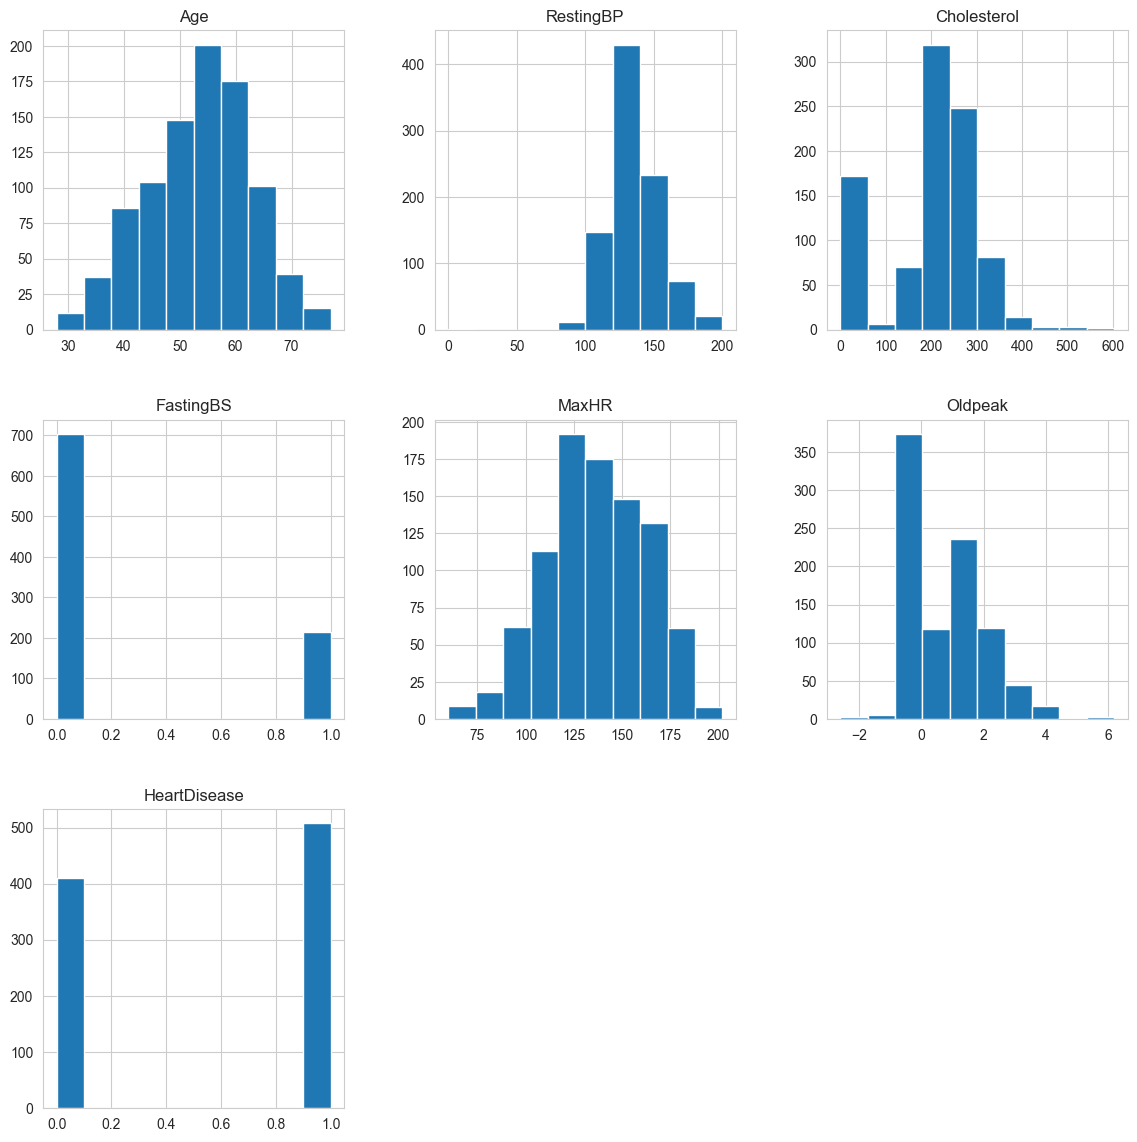

In [169]:
heart_failure_column_visualization = heart_failure_df.iloc[:,:]
heart_failure_column_visualization.hist(figsize=(14,14))

Here's a summary of the numeric features and their histograms:

1. `Age`: Most individuals are between 40 and 60 years old.
2. `RestingBP` (Resting Blood Pressure): A peak distribution around 120–140 mmHg is observed.
3. `Cholesterol`: The values range widely, with a concentration around 200–300 mg/dL.
4. `FastingBS` (Fasting Blood Sugar): It is binary (0 or 1), indicating whether fasting blood sugar >120 mg/dL, with a majority of values being 0.
5. `MaxHR` (Maximum Heart Rate Achieved): Distributed mostly between 100 and 170 bpm, indicating a healthy range for most individuals.
6. `Oldpeak`: Represents ST depression induced by exercise, mostly concentrated around 0–2.
7. `HeartDisease`: Binary target variable (0 for no heart disease, 1 for presence), with slightly more cases of 1 than 0.


### 3.4 ◆ Plotting Kdenisty Graphs for the data :

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>]], dtype=object)

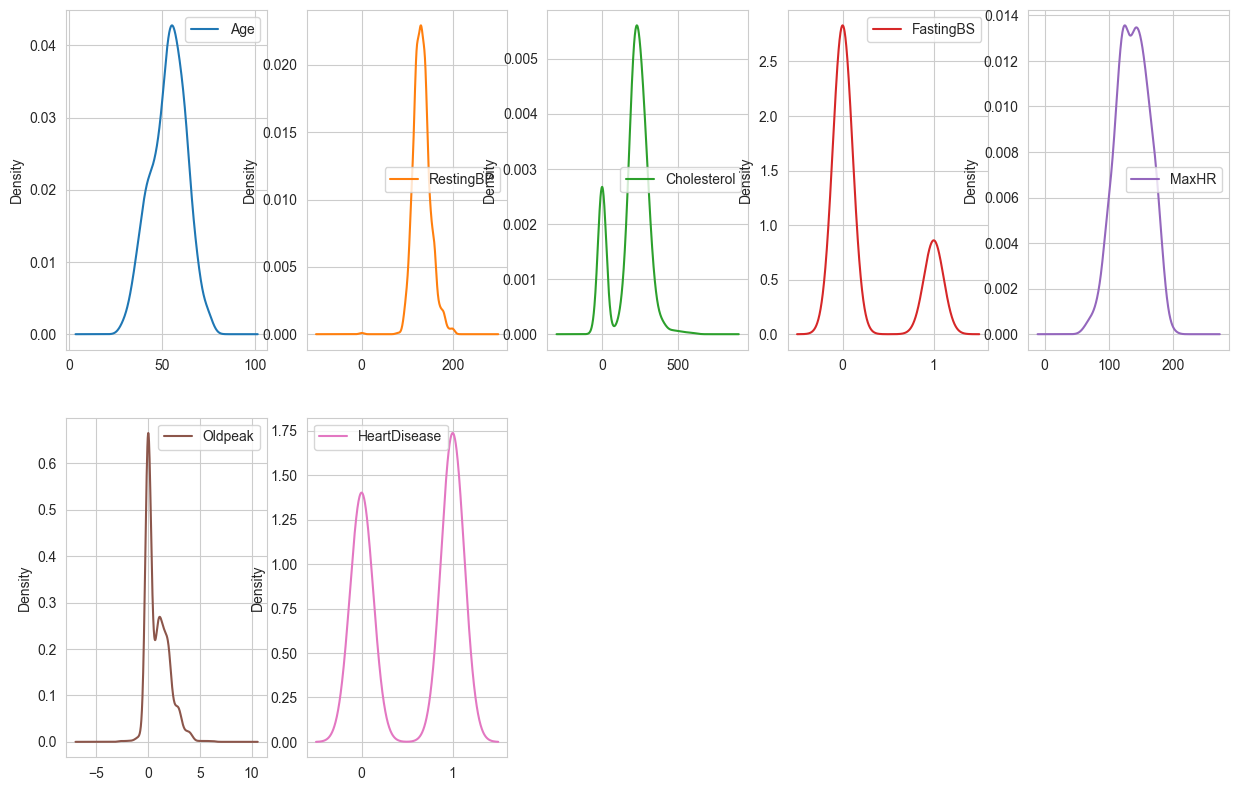

In [170]:
heart_failure_kDenisty = heart_failure_df.loc[:,['Age','RestingBP','Cholesterol','FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']]
heart_failure_kDenisty.plot(kind='density', subplots=True, layout=(3,5), sharex=False,figsize=(15,15))



1. `Age`: Shows a normal distribution centered around middle-aged individuals, with fewer younger and older participants.
2. `RestingBP`: Concentrated in a narrow range, peaking around 120–140 mmHg, representing typical resting blood pressure levels.
3. `Cholesterol`: Skewed distribution with most values between 150 and 300 mg/dL, indicating typical cholesterol levels.
4. `FastingBS`: A binary feature with two peaks at 0 and 1, indicating fasting blood sugar levels below and above 120 mg/dL.
5. `MaxHR`: Normally distributed with values centered around 130–150 bpm, reflecting the typical maximum heart rate during exercise.
6. `Oldpeak`: Highly concentrated near 0, representing minimal ST depression, with some outliers.
7. `HeartDisease`: Bimodal distribution, showing the balance between individuals with (1) and without (0) heart disease.

These plots help understand the central tendencies and spread of the features, aiding in further data exploration and preprocessing.

#### 3.5 ◆ Probability density function (PDF) plots for numeric features in the dataset display their distributions along with statistical markers (mean, median, mode)

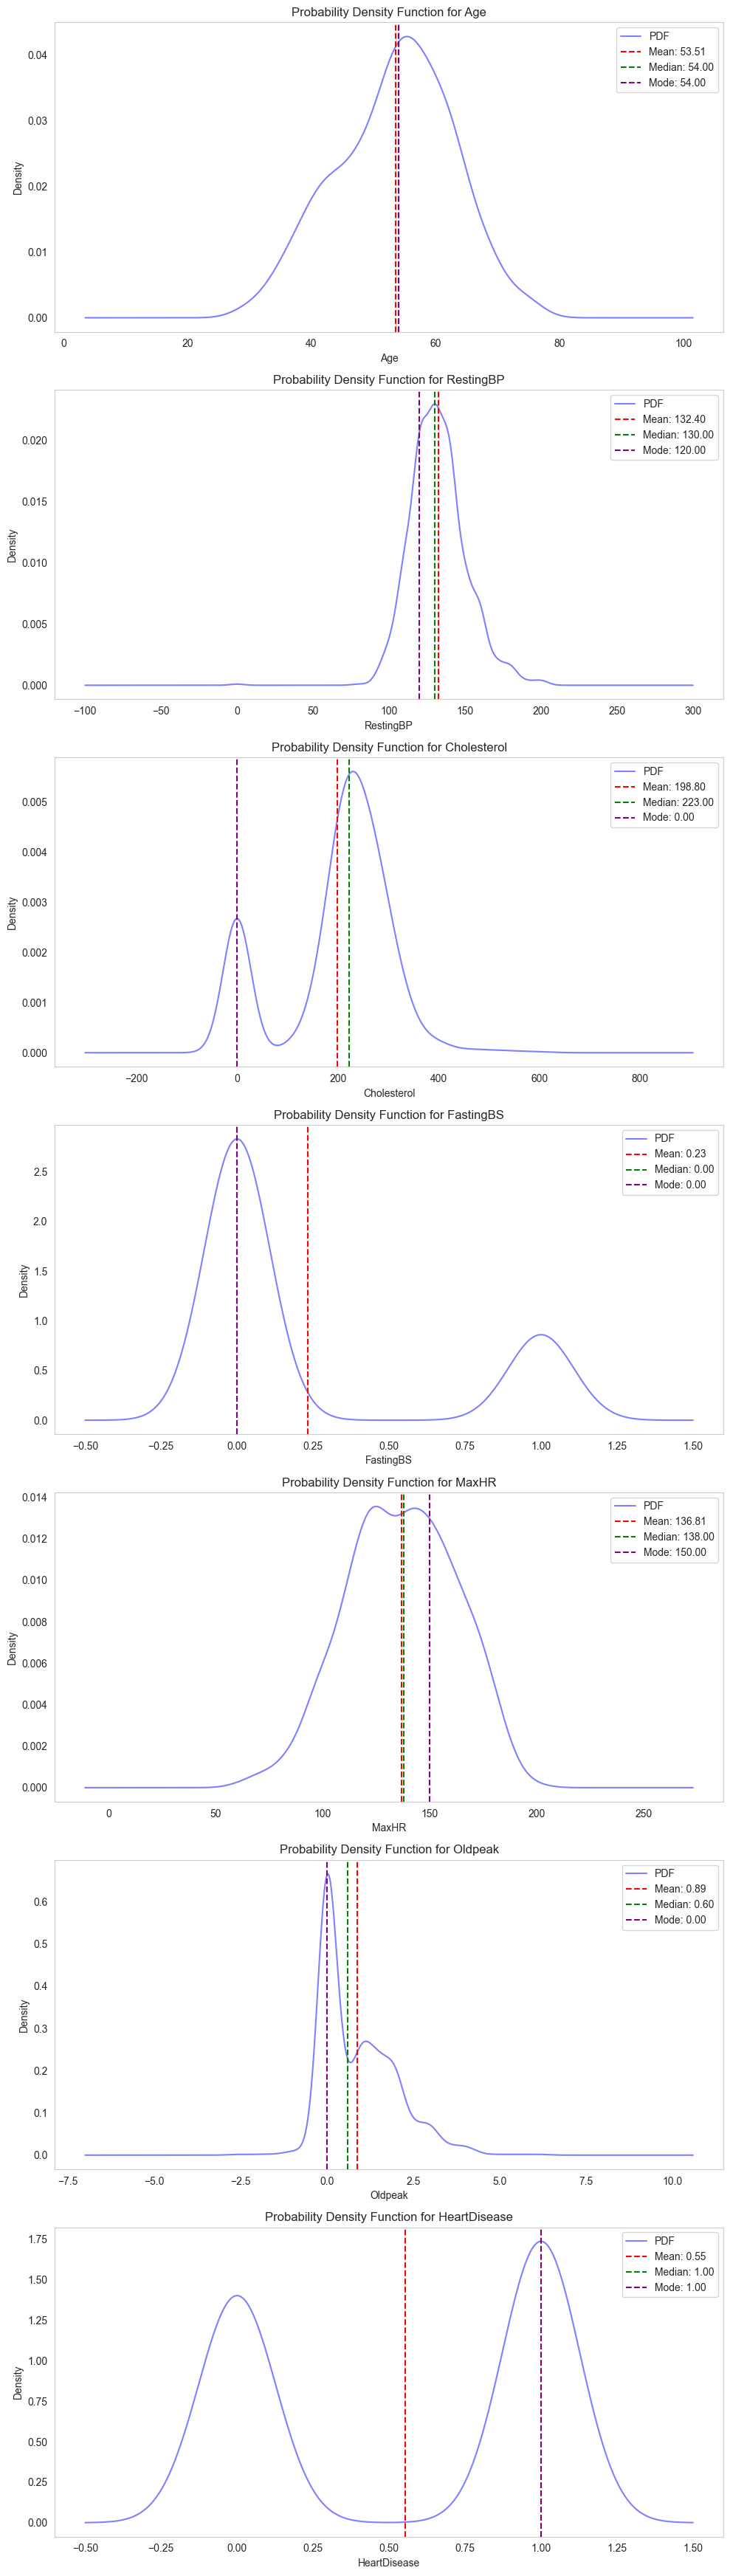

In [171]:
# Setting up the plot
num_features = 7
fig, axes = plt.subplots(nrows=num_features, ncols=1, figsize=(10, 5 * num_features))

# Loop through each feature to create a PDF plot
for i, column in enumerate(heart_failure_kDenisty):
    # Plotting the density
    heart_failure_df[column].plot(kind='density', ax=axes[i], color='blue', alpha=0.5, label='PDF')

    # Calculate mean, median, and mode
    mean = heart_failure_df[column].mean()
    median = heart_failure_df[column].median()
    mode = heart_failure_df[column].mode()[0]

    # Marking mean, median, and mode with horizontal lines
    axes[i].axvline(x=mean, color='red', linestyle='--', label=f'Mean: {mean:.2f}')
    axes[i].axvline(x=median ,color='green', linestyle='--', label=f'Median: {median:.2f}') 
    axes[i].axvline(x=mode, color='purple', linestyle='--', label=f'Mode: {mode:.2f}')  

    # Adding titles and labels
    axes[i].set_title(f'Probability Density Function for {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Density')
    axes[i].legend()
    axes[i].grid()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

1. `Age`: Displays a normal distribution, centered around 53.5 years (mean), with the median and mode close to each other at 54.
2. `RestingBP` (Resting Blood Pressure): Normally distributed around a mean of 132.4, with the median at 130 and mode at 120, indicating slightly skewed data.
3. `Cholesterol`: Skewed distribution with a mean of 198.8, median at 223, and mode at 0, suggesting outliers or invalid values at 0.
4. `FastingBS` (Fasting Blood Sugar): Binary distribution peaking at 0, with the mean value of 0.23 and most data clustered at 0.
5. `MaxHR` (Maximum Heart Rate Achieved): Bell-shaped curve with a mean of 136.8, median at 138, and mode at 150, showing slight symmetry.
6. `Oldpeak`: Skewed towards 0, with a mean of 0.89 and the majority of values around 0, indicating minimal ST depression in most cases.
7. `HeartDisease`: Bimodal distribution representing the target variable, with a mean of 0.55 and higher density at 1, showing more individuals with heart disease.

These visualizations help in understanding the central tendencies, spread, and outliers for each feature, essential for further analysis and preprocessing.

### 3.6 ◆ Displaying skewness of the Numeric Features 

In [172]:
numerical_features = heart_failure_df.select_dtypes(include=np.number).columns
heart_failure_df[numerical_features].skew()

Age            -0.195933
RestingBP       0.179839
Cholesterol    -0.610086
FastingBS       1.264484
MaxHR          -0.144359
Oldpeak         1.022872
HeartDisease   -0.215086
dtype: float64


1. `Age` (-0.195933): Slightly negatively skewed, meaning the tail on the left side (younger ages) is slightly longer, but the distribution is nearly symmetric.

2. `RestingBP` (0.179839): Slightly positively skewed, indicating a small tail on the right side (higher blood pressure values).

3. `Cholesterol` (-0.610086): Moderately negatively skewed, suggesting more data points on the higher side, with a longer tail on the lower end (some outliers or extreme low values).

4. `FastingBS` (1.264484): Highly positively skewed, indicating a significant tail on the right side (more extreme higher values for fasting blood sugar).

5. `MaxHR` (-0.144359): Slightly negatively skewed, with the distribution fairly symmetric and a minor left-side tail (lower maximum heart rate values).

6. `Oldpeak` (1.022872): Strongly positively skewed, meaning more data is clustered near zero, and there’s a longer tail on the higher side (ST depression values).

7. `HeartDisease` (-0.215086): Slightly negatively skewed, but since it is binary, the skewness value here reflects the imbalance between the two classes (more individuals with heart disease).

   Key Insights:
- Features like **FastingBS** and **Oldpeak** have significant positive skewness, suggesting potential transformations may be needed to normalize the data.
- Other features are only slightly skewed, meaning they are relatively symmetric and may not require transformations.

### 3. 7 ◆ Show the Correlation between Numeric Features and `HeartDisease`

In [173]:
correlation_matrix=heart_failure_df.corr(numeric_only=True)
correlation_matrix

Age  RestingBP  Cholesterol  FastingBS     MaxHR   Oldpeak  \
Age           1.000000   0.254399    -0.095282   0.198039 -0.382045  0.258612   
RestingBP     0.254399   1.000000     0.100893   0.070193 -0.112135  0.164803   
Cholesterol  -0.095282   0.100893     1.000000  -0.260974  0.235792  0.050148   
FastingBS     0.198039   0.070193    -0.260974   1.000000 -0.131438  0.052698   
MaxHR        -0.382045  -0.112135     0.235792  -0.131438  1.000000 -0.160691   
Oldpeak       0.258612   0.164803     0.050148   0.052698 -0.160691  1.000000   
HeartDisease  0.282039   0.107589    -0.232741   0.267291 -0.400421  0.403951   

              HeartDisease  
Age               0.282039  
RestingBP         0.107589  
Cholesterol      -0.232741  
FastingBS         0.267291  
MaxHR            -0.400421  
Oldpeak           0.403951  
HeartDisease      1.000000

In [174]:
def plot_correlation_heatmap(corr_matrix, figsize=(16, 12), annot=False, cmap="coolwarm"):
    plt.figure(figsize=figsize)

    # Create the heatmap
    sns.heatmap(corr_matrix,cmap='Reds', annot=True, fmt='.2f',cbar_kws={'shrink': 0.8})# Shrink color bar for better fit

    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=10)
    plt.title('Correlation Matrix', fontsize=16, pad=20)

    plt.tight_layout()

    plt.show()

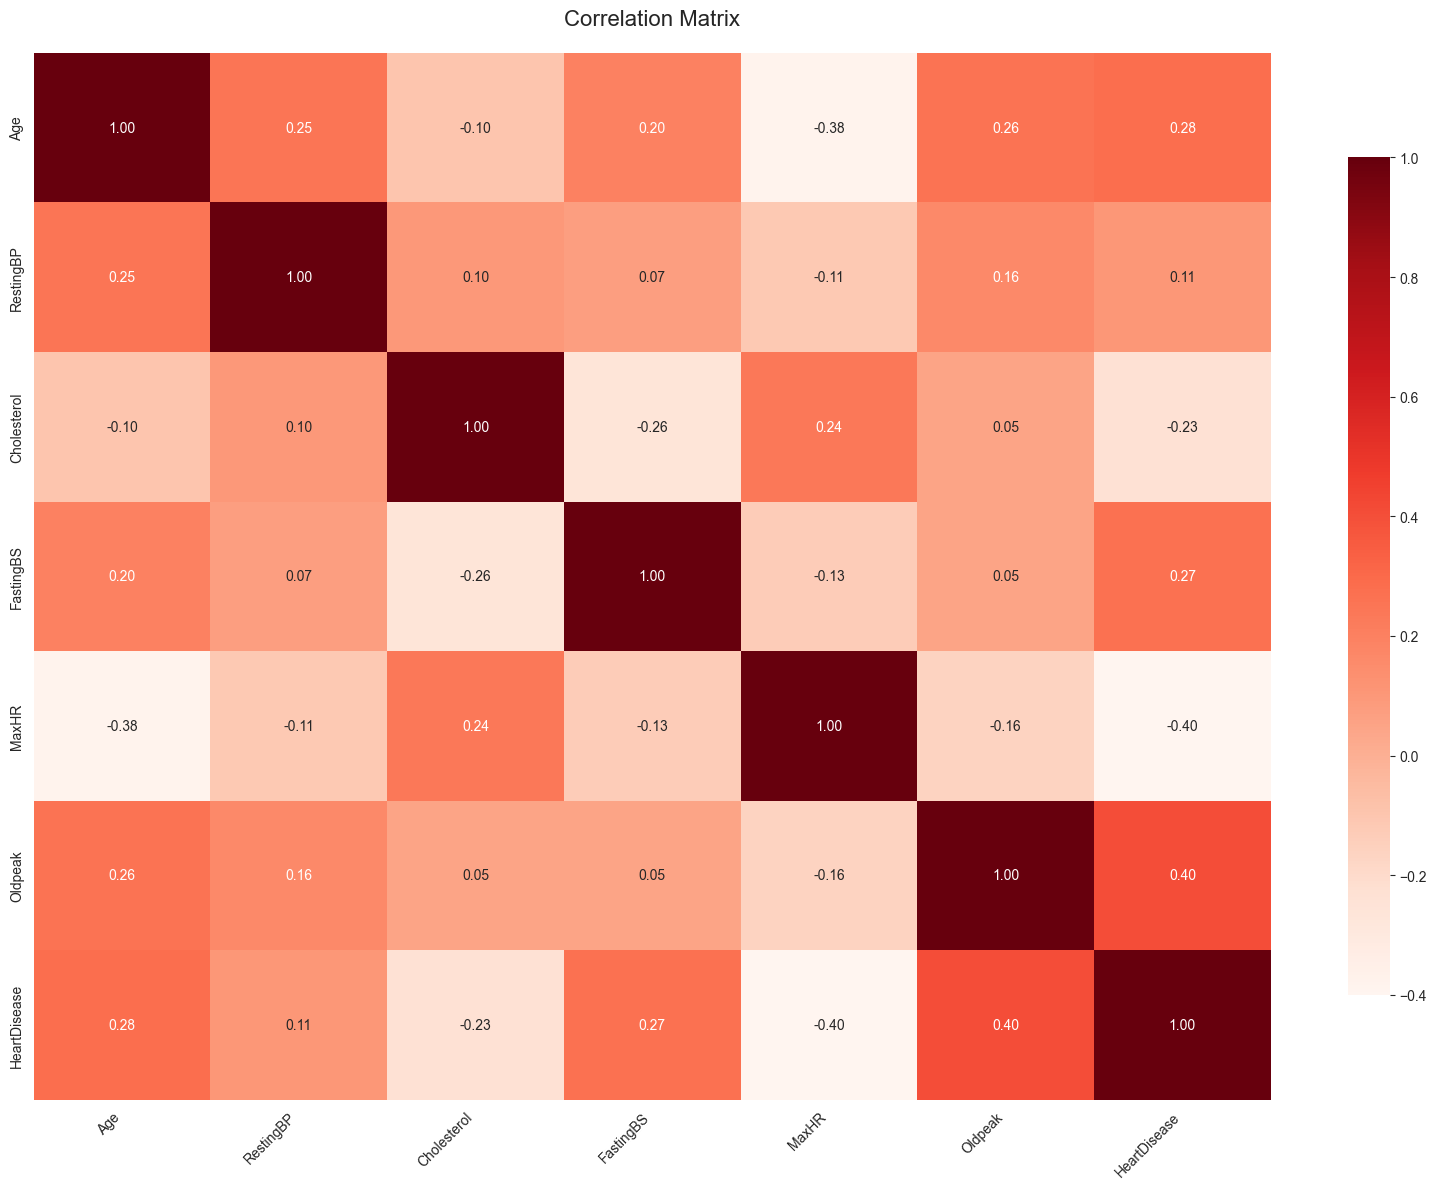

In [175]:
plot_correlation_heatmap(correlation_matrix)

The correlation matrix indicates that none of the features have a very high correlation (>0.8 or < -0.8), suggesting that multicollinearity is not a major concern.

- `Age`: Positively correlated with `RestingBP` (0.25) and `HeartDisease` (0.28); negatively with `MaxHR` (-0.38).
- `RestingBP`: Weak correlations with other features.
- `Cholesterol`: Weakly Negatively correlated with `HeartDisease` (-0.23).
- `FastingBS`: Moderately Positively correlated with `HeartDisease` (0.27).
- `MaxHR`: Moderately negatively correlated with `HeartDisease` (-0.40).
- `Oldpeak`: Moderately positively correlated with `HeartDisease` (0.40).

### Conclusion:
- `Oldpeak`, `MaxHR`, `FastingBS`, and `Age` ,These features seem to have a direct impact on heart disease, making them valuable for prediction.

### 3. 8 ◆ Histograms of numerical features from a dataset plotted against the `HeartDisease` classification label

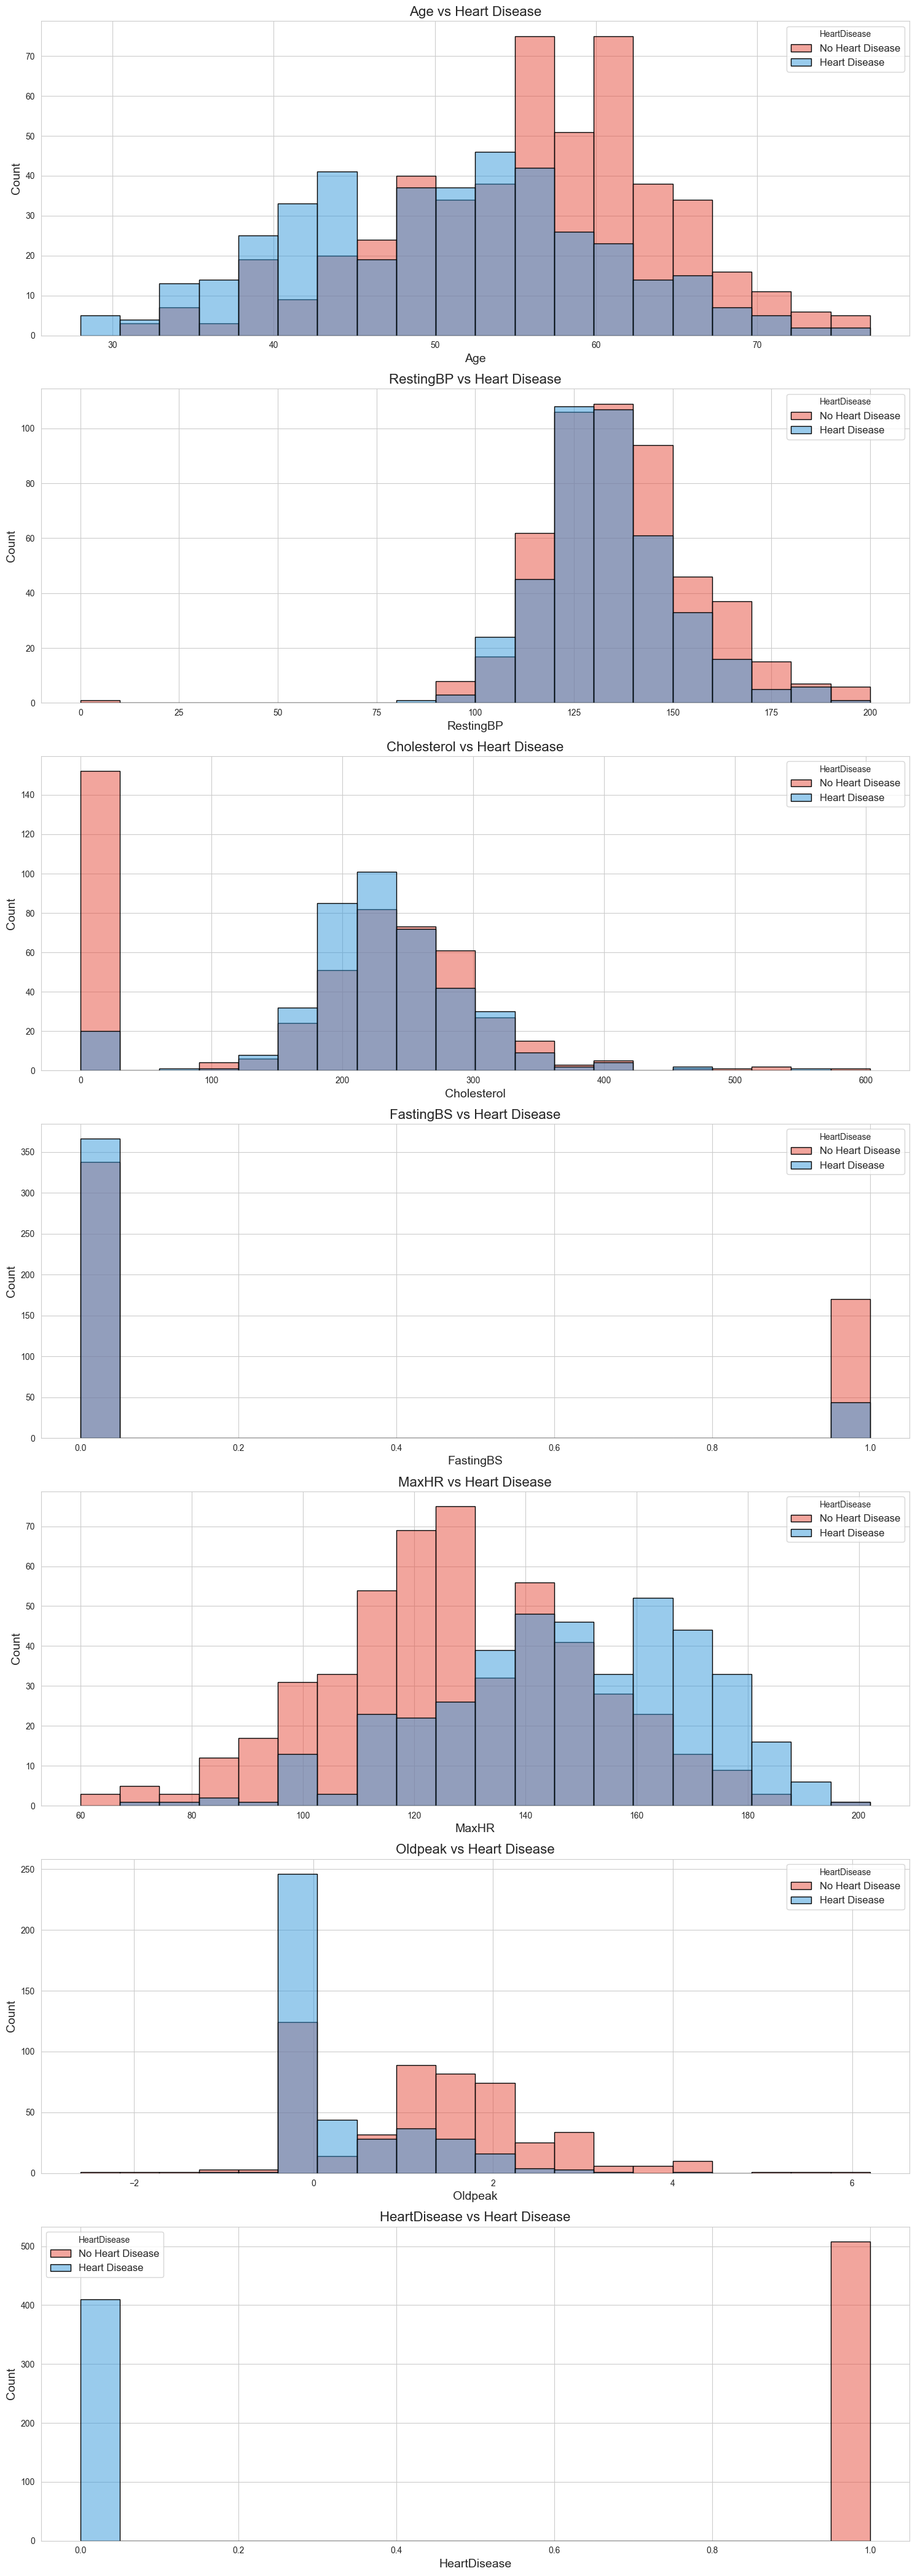

In [176]:

# Numeric and Categorical Feature Separation
numeric_features = heart_failure_df.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_features = heart_failure_df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()
colors = ['#3498db', '#e74c3c'] 

fig, ax = plt.subplots(nrows=len(numerical_features), ncols=1, figsize=(15, 6 * len(numerical_features)))

# Loop through numerical features and create count plots
for i, feature in enumerate(numerical_features):
    sns.histplot(
        data=heart_failure_df,
        x=feature,
        hue='HeartDisease',
        kde=False,
        palette=colors,
        edgecolor='black',
        ax=ax[i],
        bins=20
    )
    ax[i].set_title(f'{feature} vs Heart Disease', fontsize=16)
    ax[i].set_xlabel(feature, fontsize=14)
    ax[i].set_ylabel('Count', fontsize=14)
    ax[i].legend(['No Heart Disease', 'Heart Disease'], title='HeartDisease', fontsize=12)

plt.tight_layout()
plt.show()

The histograms have overlapping bars, making it hard to interpret finer details for certain features.
So we need better visualization to see the relationships between the features

### 3. 9 ◆ Scatter plots for all variations of two numerical features, with points color-coded by the `HeartDisease` column

In [177]:

def scatter_plots_with_color_coding(data, numerical_features, target_column):
    num_features = len(numerical_features)
    combinations = [(numerical_features[i], numerical_features[j]) 
                    for i in range(num_features) for j in range(i + 1, num_features)]
    
    # Create subplots
    num_combinations = len(combinations)
    fig, axes = plt.subplots(nrows=(num_combinations + 2) // 3, ncols=3, figsize=(18, 6 * ((num_combinations + 2) // 3)))
    axes = axes.flatten() if num_combinations > 1 else [axes]
    for idx, (feature_x, feature_y) in enumerate(combinations):
        ax = axes[idx]
        sns.scatterplot( data=data,x=feature_x,y=feature_y,hue=target_column,palette={0: "blue", 1: "red"}, ax=ax, alpha=0.7, edgecolor=None )
        ax.set_title(f"{feature_x} vs {feature_y}", fontsize=14)
        ax.legend(title=target_column, loc="upper right")
    # Hide any unused subplots
    for ax in axes[num_combinations:]:
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()



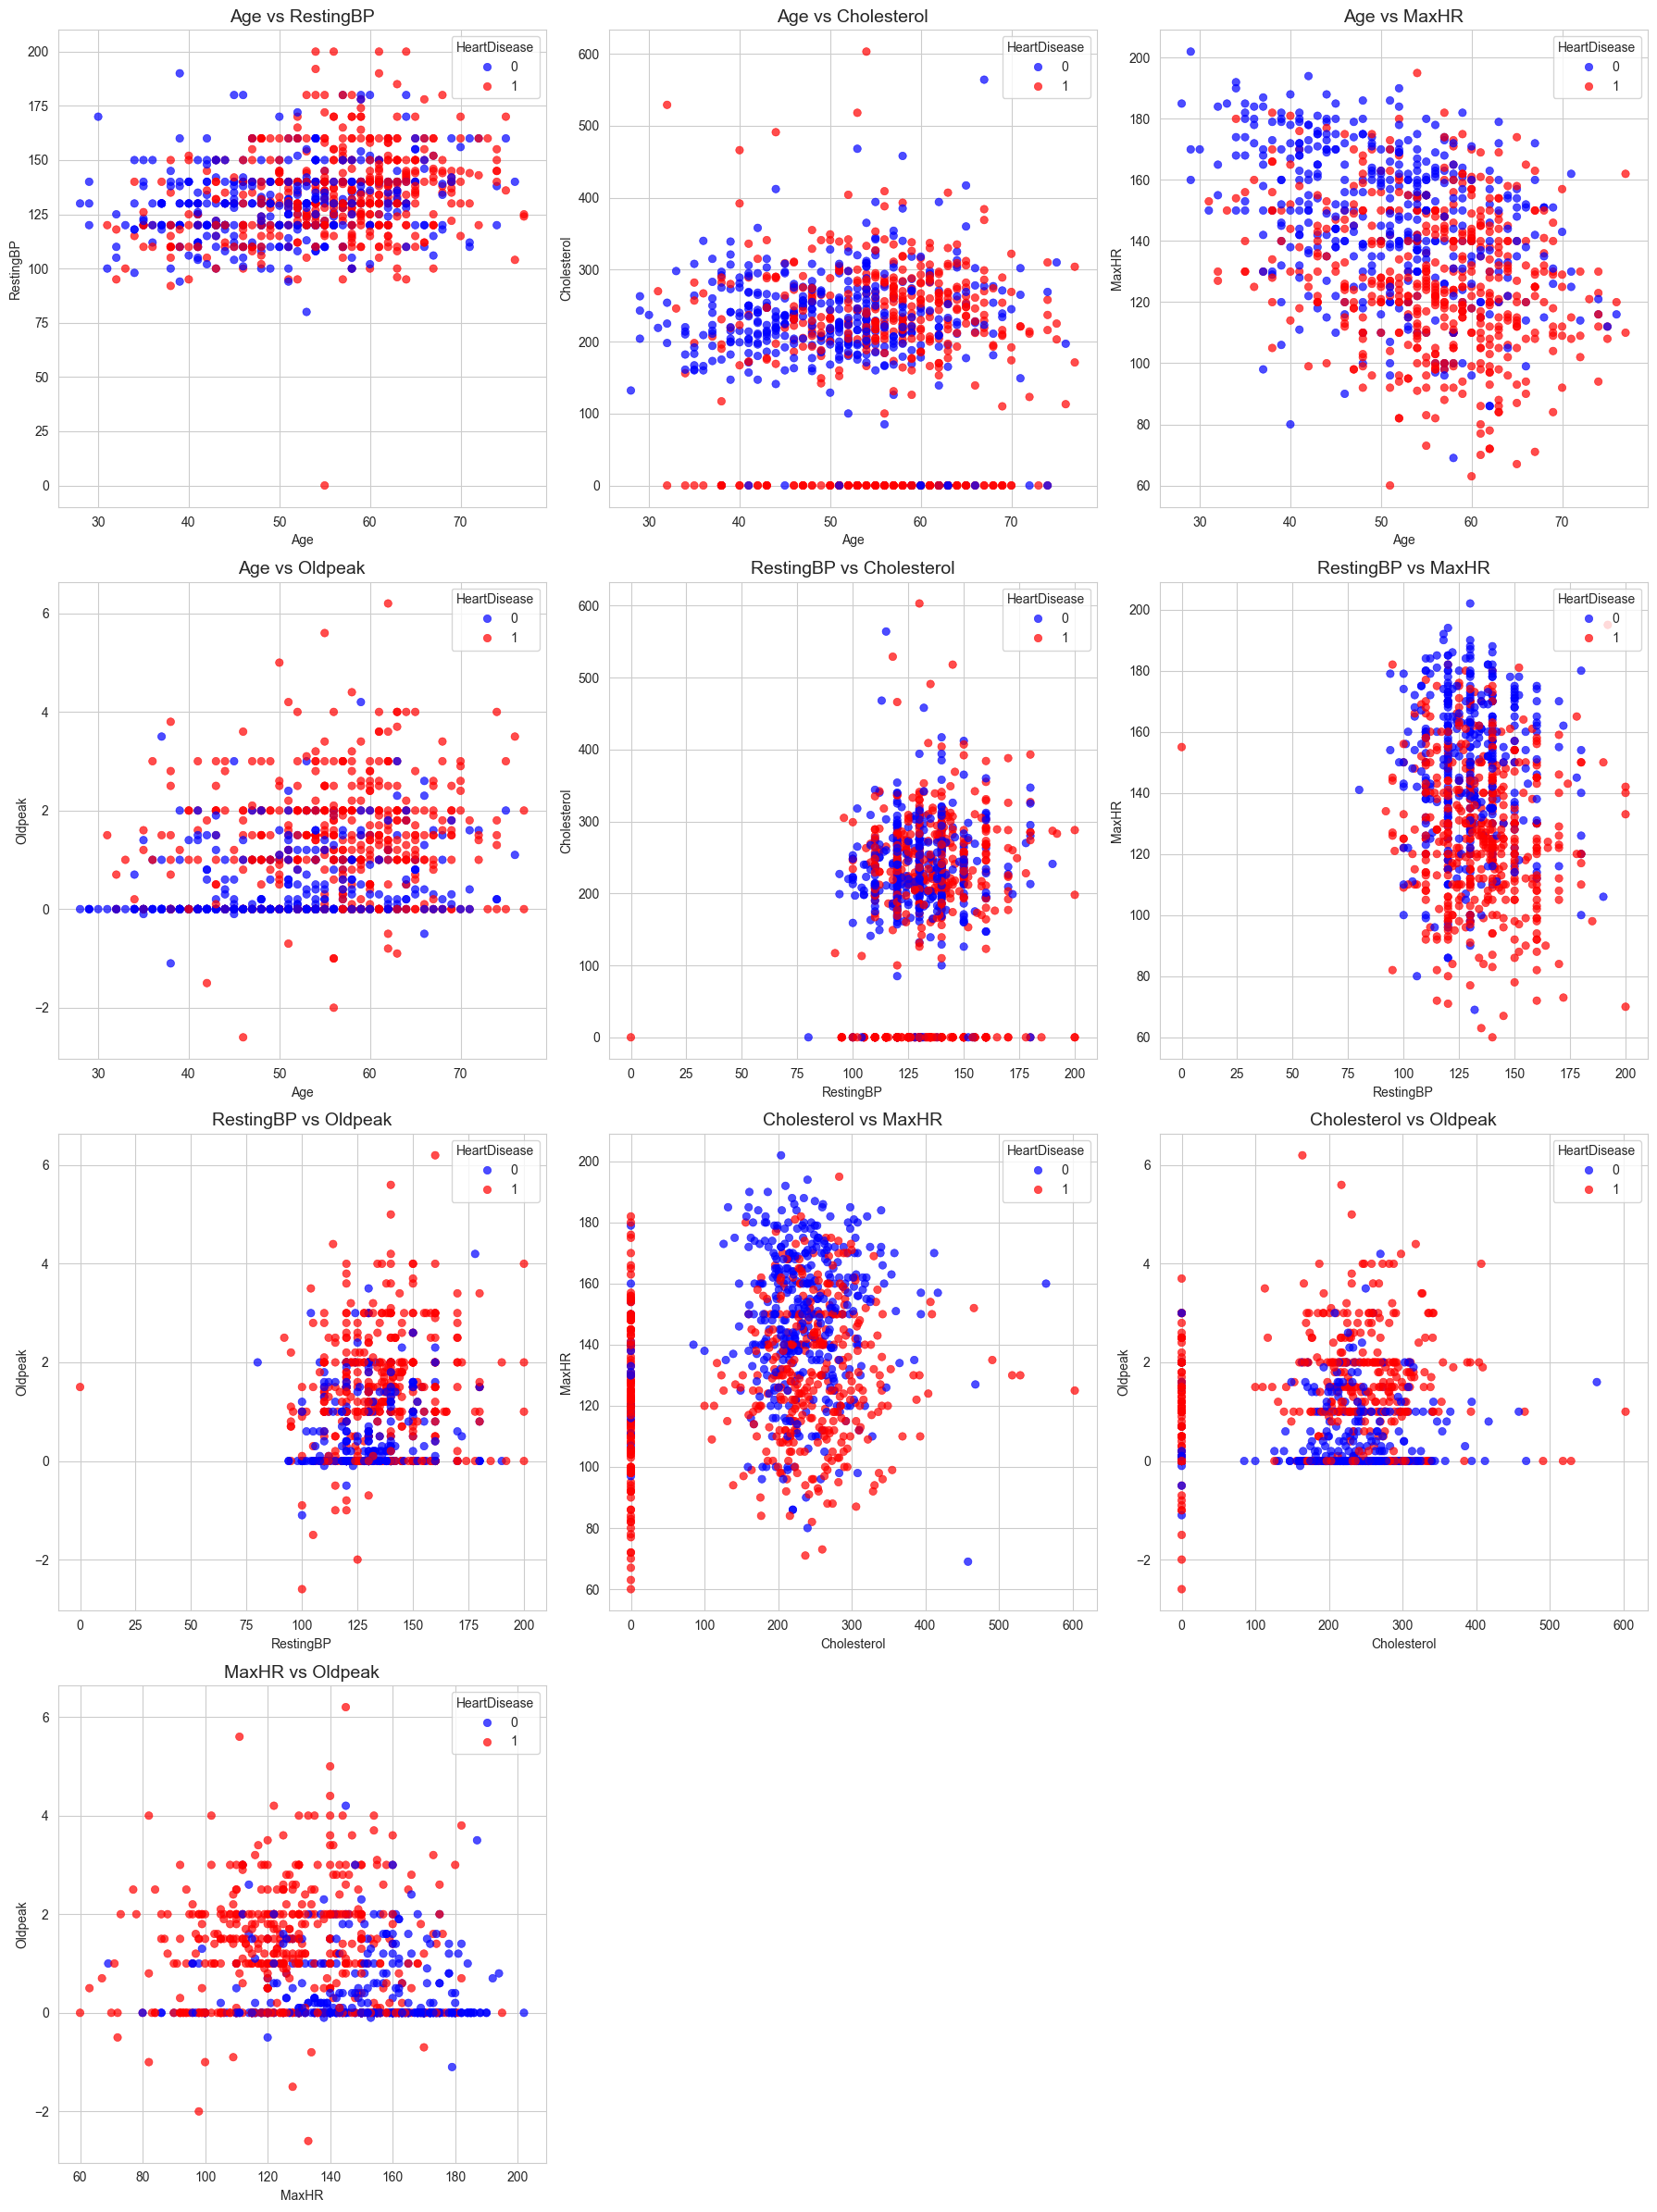

In [178]:
numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
scatter_plots_with_color_coding(heart_failure_df, numerical_features, target_column="HeartDisease")

1. `MaxHR` and `Oldpeak`: Clear difference between people with and without heart disease.
2. `Cholesterol` and `Age`: Some separation, might help in predicting heart disease.
3. `RestingBP`: Looks similar for both groups, not very useful.
Distributions: Some features affect heart disease more than others.


### 3. 10 ◆ Pair plots for numerical feature with `HeartDisease` column

In [179]:

def plot_pairplot(data, numerical_features, target_feature):
    palette = {0: "blue", 1: "red"}
    
    # Create the pairplot
    pairplot = sns.pairplot(
        data=data,
        vars=numerical_features,
        hue=target_feature,
        palette=palette,
        diag_kind="kde",
        plot_kws={'alpha': 0.7},
        height=3
    )
    
    # Set the plot title and customize layout
    pairplot.fig.suptitle('Pairplot of Numerical Features with Blue vs Red Color Coding', y=1.02, fontsize=16)
    pairplot.fig.tight_layout()
    plt.show()


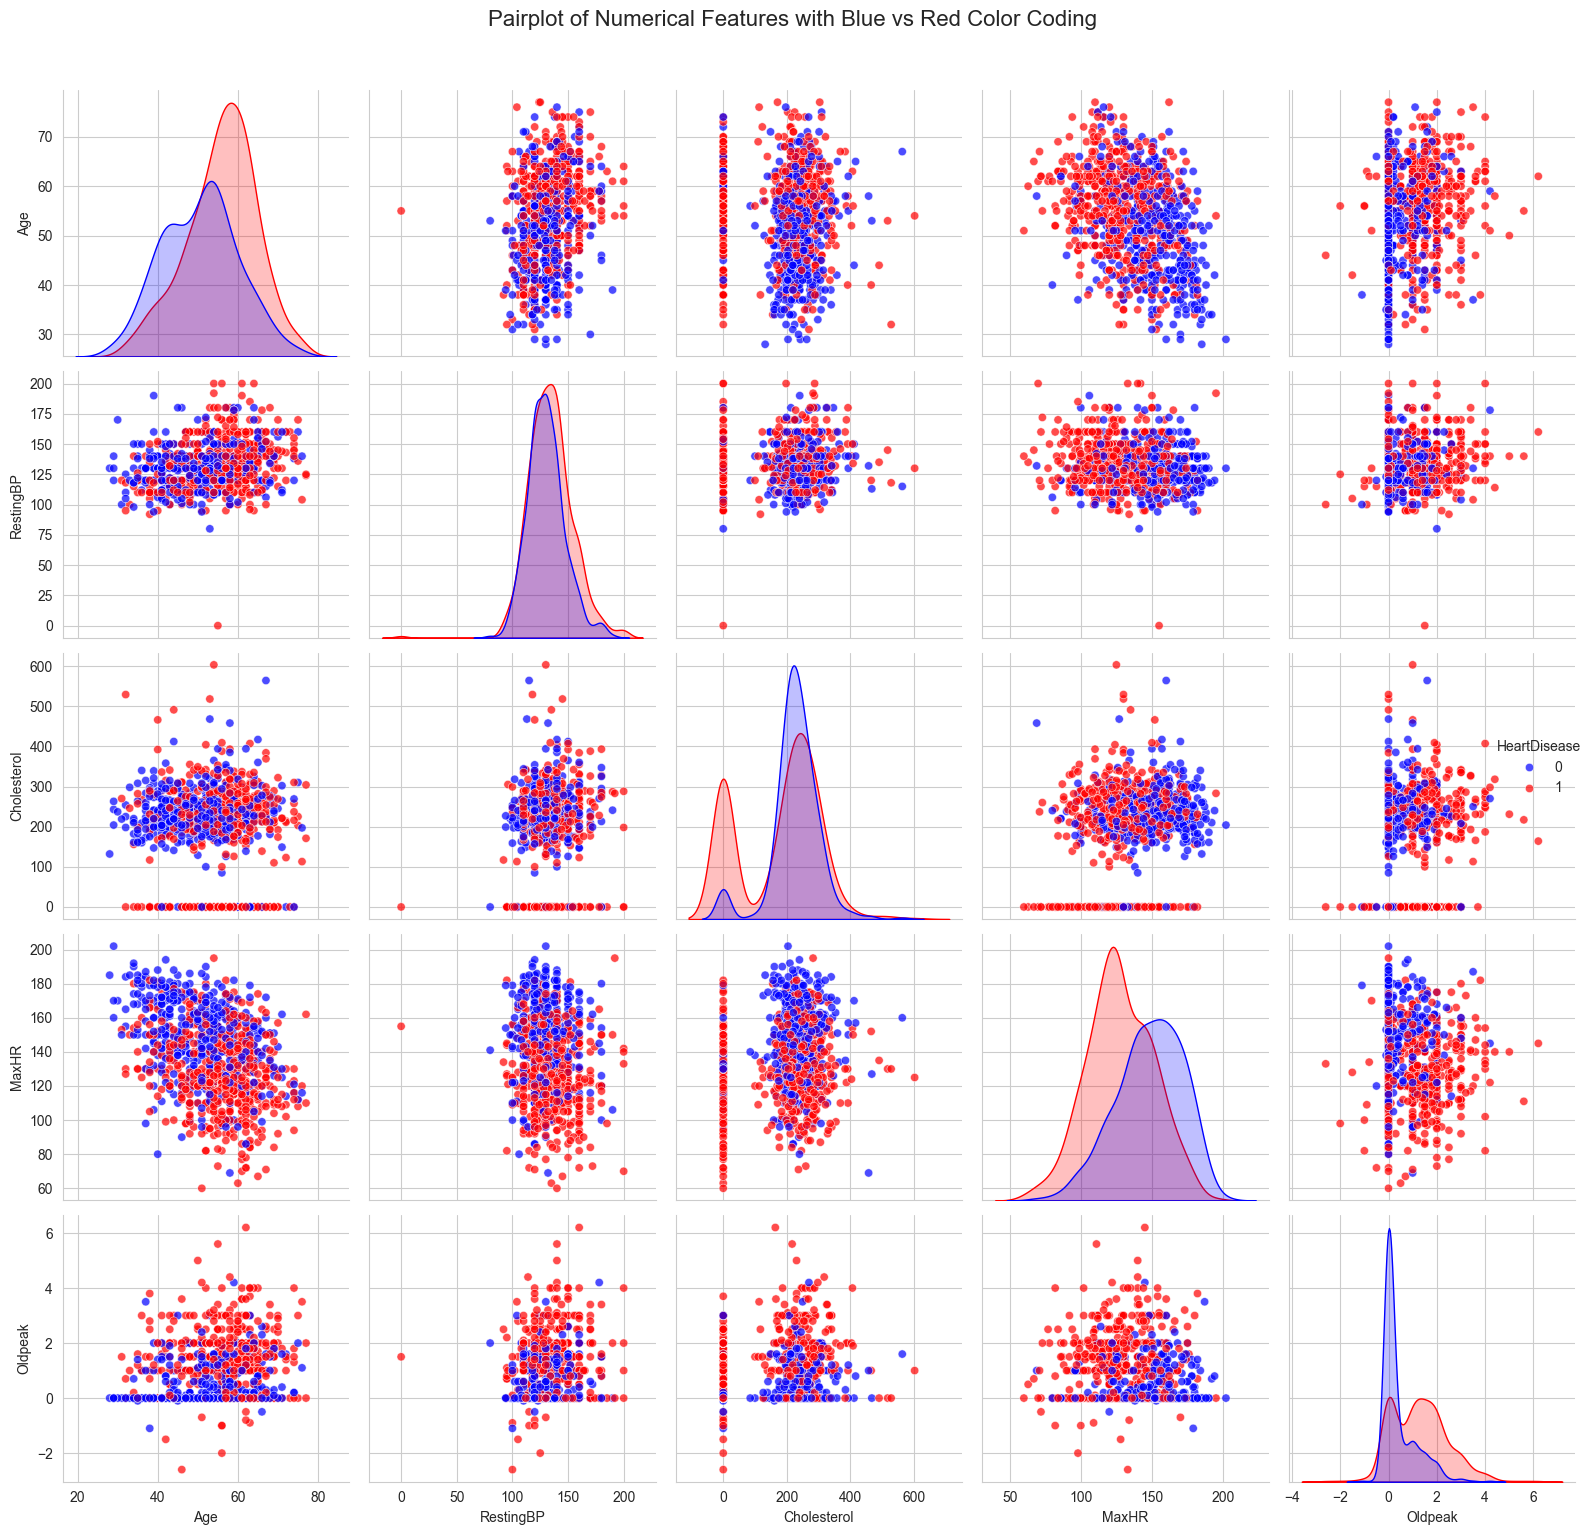

In [180]:

numerical_features = ["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak"]
target_feature = "HeartDisease"
plot_pairplot(heart_failure_df, numerical_features, target_feature)


1. `Age`and `MaxHR`: Strong patterns; older age and lower MaxHR linked to heart disease.
2. `Cholesterol`: Overlapping values, less separation between groups.
3. `RestingBP`: No clear difference for heart disease detection.
4. `Oldpeak`: Higher values common in heart disease cases.


### 3. 11 ◆ Bar plots for categorical data distribution  with `HeartDisease` column

In [181]:
def plot_categorical_distributions(data, target_col):
    # List of categorical features
    categorical_features = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
    
    # Set up the subplot grid
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
    axes = axes.flatten()
    
    for i, feature in enumerate(categorical_features):
        # Calculate percentages
        feature_counts = (data[data[target_col] == 1][feature].value_counts(normalize=True) * 100)
        
        # Bar plot
        sns.barplot(
            x=feature_counts.index,
            y=feature_counts.values,
            ax=axes[i],
            edgecolor='black'
        )
        axes[i].set_title(f'{feature} Distribution for {target_col} = 1', fontsize=14)
        axes[i].set_xlabel(feature, fontsize=12)
        axes[i].set_ylabel('Percentage (%)', fontsize=12)
        axes[i].set_ylim(0, 100)
        axes[i].bar_label(axes[i].containers[0], fmt='%.1f%%')
    
    # Adjust layout
    plt.tight_layout()
    plt.show()



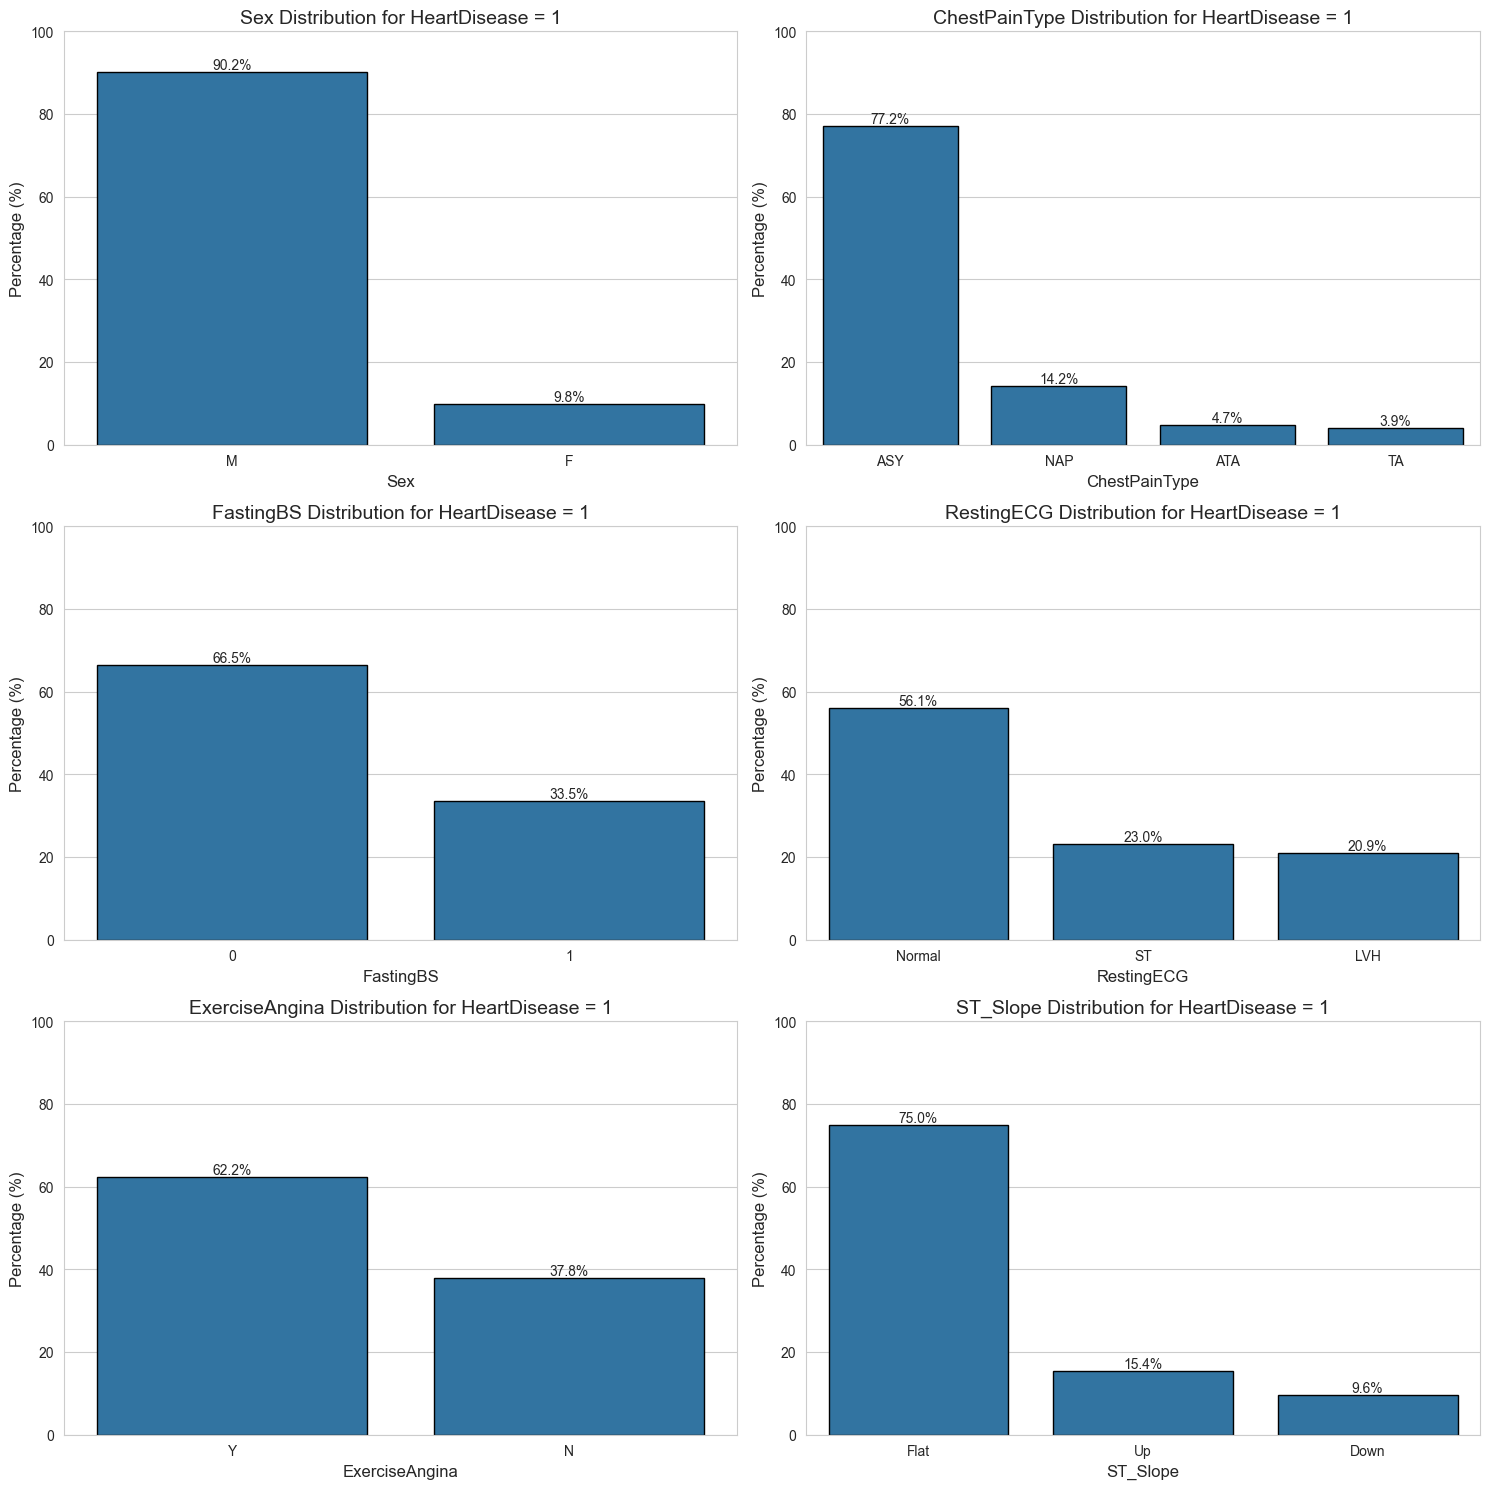

In [182]:
plot_categorical_distributions(heart_failure_df, target_col='HeartDisease')


The bar plots show the distribution of categorical features for heart disease cases:

1. `Sex`: Most cases are male (90.2%).
2. `ChestPainType`:ASY (77.2%).
3. `FastingBS`: Majority have FBS < 120 mg/dl (66.5%).
4. `RestingECG`: Normal ECG is most common (56.1%).
5. `ExerciseAngina`: 62.2% report angina during exercise.
6. `ST_Slope`: Flat slope is most frequent (75%).

### 3. 12◆ Summary of Data Visualization and EDA

### 1. Correlation Matrix Observations:

The correlation matrix indicates that none of the features have a very high correlation (>0.8 or < -0.8), suggesting that multicollinearity is not a major concern.

- `Age`: Positively correlated with `RestingBP` (0.25) and `HeartDisease` (0.28); negatively with `MaxHR` (-0.38).
- `RestingBP`: Weak correlations with other features.
- `Cholesterol`: Weakly Negatively correlated with `HeartDisease` (-0.23).
- `FastingBS`: Moderately Positively correlated with `HeartDisease` (0.27).
- `MaxHR`: Moderately negatively correlated with `HeartDisease` (-0.40).
- `Oldpeak`: Moderately positively correlated with `HeartDisease` (0.40).

### Conclusion:
- `Oldpeak`, `MaxHR`, `FastingBS`, and `Age` ,These features seem to have a direct impact on heart disease, making them valuable for prediction.

### 2. Pairplot Insights:

1. Clear separation observed in `MaxHR` and `Oldpeak` for heart disease cases.
2. Features like `Cholesterol` and `Age` show partial separation and may be predictive.
3. `RestingBP` shows little variation across heart disease categories, making it less impactful.

### 3. Distribution of Categorical Features:

1. `Sex`: 90.2% of heart disease cases are male.
2. `ChestPainType`: ASY type is dominant in heart disease cases (77.2%).
3. `FastingBS`: 66.5% of cases have FBS < 120 mg/dl.
4. `RestingECG`: Normal ECG is most common (56.1%).
5. `ExerciseAngina`: 62.2% of cases report angina during exercise.
6. `ST_Slope`: Flat slope is observed in 75% of heart disease cases.


### Key Takeaways for Prediction:

#### 1.Features to Consider:

1. Numerical Features: `Oldpeak` ,`Age` ,`FastingBS` and  `MaxHR` are highly significant and will be prioritized for prediction.
2. Categorical Features: `Sex`, `ChestPainType`, `ExerciseAngina`,`FastingBS` and  `ST_Slope` show distinct patterns in the distribution of values for patients with and without heart disease. These features likely contribute significantly to prediction.

#### 2.Features with weak relevance:

`RestingBP` and `Cholesterol` show weak relevance .



### 3. 13◆ Feature Selection (Before Data cleaning and processing)

In [183]:
# Method to visualize specific mask of the correlation matrix using heatmap
def visualize_mask_correlation_heatmap(correlation_matrix, mask):

    plt.figure(figsize=(12, 8))
    sns.heatmap(
        correlation_matrix,
        annot=True,
        cmap='coolwarm',
        fmt=".2f",
        linewidths=0.5,
        mask=mask.isnull()  # Mask out unwanted cells
    )
    plt.title('Heatmap of Highly Correlated Pairs (Threshold > 0.8)', fontsize=16)
    plt.show()


#### 3.13.1 For Strong Positive Correlations (>= 0.8 & < 1):



In [184]:
# Create a mask for strong positive correlations
positive_threshold = 0.8
mask = correlation_matrix.where((correlation_matrix >= positive_threshold) & (correlation_matrix < 1))

# Visualize the heatmap for strongly positive correlations
if mask.isnull().all().all():
    print("No correlations meet the specified threshold.")
else:
    visualize_mask_correlation_heatmap(correlation_matrix, mask)



No correlations meet the specified threshold.


#### 3.13.2 For Strong Negative Correlations (<= -0.8 & >= -1):


In [185]:
# Create a mask for strong negative correlations
negative_threshold = -0.8
mask = correlation_matrix.where((correlation_matrix <= negative_threshold) & (correlation_matrix >= -1))

# Visualize the heatmap for strongly positive correlations
if mask.isnull().all().all():
    print("No correlations meet the specified threshold.")
else:
    visualize_mask_correlation_heatmap(correlation_matrix, mask)


No correlations meet the specified threshold.


#### Conclusion for feature selection (Before Data cleaning and processing)
- No Strong Correlations:

1. There are no pairs of features with a strong positive correlation (>= 0.8) or strong negative correlation (<= -0.8).
2. This suggests that:
    1. The features in the dataset are relatively independent of each other.
    2. Multicollinearity is not a significant concern in this dataset.
3. Since there is no significant correlation between features, we can proceed with the original features without the need to drop or combine them due to redundancy , and check again later after Data Cleaning and Processing on the correlation of the features 

## 4. ◆ Data cleaning and processing:


### 4.1 ◆ Analyzing Features

In [186]:
def analyze_feature(df, feature_name):
    print(f"Values Counts of feautre {feature_name} :")
    print(df[feature_name].value_counts().sort_index())
    print(f"Unique Values of feautre{feature_name} :")
    print(df[feature_name].unique().tolist())
    null_entries = df[feature_name].isnull().sum()
    non_null_entries = df[feature_name].value_counts().sort_index().sum()
    print(f"Sum of the non-null entries for '{feature_name}': {non_null_entries}")
    print(f"Sum of the null entries for '{feature_name}': {null_entries}")
    print(f"Sum of the non-null entries and null entries for '{feature_name}': {non_null_entries + null_entries}") 
    print(f"Data type for '{feature_name}': {df[feature_name].dtype}")



In [187]:
analyze_feature(heart_failure_df,'Age')

Values Counts of feautre Age :
Age
28     1
29     3
30     1
31     2
32     5
33     2
34     7
35    11
36     6
37    11
38    16
39    15
40    13
41    24
42    18
43    24
44    19
45    18
46    24
47    19
48    31
49    21
50    25
51    35
52    36
53    33
54    51
55    41
56    38
57    38
58    42
59    35
60    32
61    31
62    35
63    30
64    22
65    21
66    13
67    15
68    10
69    13
70     7
71     5
72     4
73     1
74     7
75     3
76     2
77     2
Name: count, dtype: int64
Unique Values of feautreAge :
[40, 49, 37, 48, 54, 39, 45, 58, 42, 38, 43, 60, 36, 44, 53, 52, 51, 56, 41, 32, 65, 35, 59, 50, 47, 31, 46, 57, 55, 63, 66, 34, 33, 61, 29, 62, 28, 30, 74, 68, 72, 64, 69, 67, 73, 70, 77, 75, 76, 71]
Sum of the non-null entries for 'Age': 918
Sum of the null entries for 'Age': 0
Sum of the non-null entries and null entries for 'Age': 918
Data type for 'Age': int64


In [188]:
analyze_feature(heart_failure_df,'Sex')

Values Counts of feautre Sex :
Sex
F    193
M    725
Name: count, dtype: int64
Unique Values of feautreSex :
['M', 'F']
Sum of the non-null entries for 'Sex': 918
Sum of the null entries for 'Sex': 0
Sum of the non-null entries and null entries for 'Sex': 918
Data type for 'Sex': object


In [189]:
analyze_feature(heart_failure_df,'ChestPainType')

Values Counts of feautre ChestPainType :
ChestPainType
ASY    496
ATA    173
NAP    203
TA      46
Name: count, dtype: int64
Unique Values of feautreChestPainType :
['ATA', 'NAP', 'ASY', 'TA']
Sum of the non-null entries for 'ChestPainType': 918
Sum of the null entries for 'ChestPainType': 0
Sum of the non-null entries and null entries for 'ChestPainType': 918
Data type for 'ChestPainType': object


In [190]:
analyze_feature(heart_failure_df,'RestingBP')

Values Counts of feautre RestingBP :
RestingBP
0       1
80      1
92      1
94      2
95      6
       ..
180    12
185     1
190     2
192     1
200     4
Name: count, Length: 67, dtype: int64
Unique Values of feautreRestingBP :
[140, 160, 130, 138, 150, 120, 110, 136, 115, 100, 124, 113, 125, 145, 112, 132, 118, 170, 142, 190, 135, 180, 108, 155, 128, 106, 92, 200, 122, 98, 105, 133, 95, 80, 137, 185, 165, 126, 152, 116, 0, 144, 154, 134, 104, 139, 131, 141, 178, 146, 158, 123, 102, 96, 143, 172, 156, 114, 127, 101, 174, 94, 148, 117, 192, 129, 164]
Sum of the non-null entries for 'RestingBP': 918
Sum of the null entries for 'RestingBP': 0
Sum of the non-null entries and null entries for 'RestingBP': 918
Data type for 'RestingBP': int64


In [191]:
zero_restingBP_count = heart_failure_df[heart_failure_df['RestingBP']== 0].shape[0]
print("Total number of Zero 'RestingBP' values:", zero_restingBP_count)


Total number of Zero 'RestingBP' values: 1


In [192]:
analyze_feature(heart_failure_df,'Cholesterol')

Values Counts of feautre Cholesterol :
Cholesterol
0      172
85       1
100      2
110      1
113      1
      ... 
491      1
518      1
529      1
564      1
603      1
Name: count, Length: 222, dtype: int64
Unique Values of feautreCholesterol :
[289, 180, 283, 214, 195, 339, 237, 208, 207, 284, 211, 164, 204, 234, 273, 196, 201, 248, 267, 223, 184, 288, 215, 209, 260, 468, 188, 518, 167, 224, 172, 186, 254, 306, 250, 177, 227, 230, 294, 264, 259, 175, 318, 216, 340, 233, 205, 245, 194, 270, 213, 365, 342, 253, 277, 202, 297, 225, 246, 412, 265, 182, 218, 268, 163, 529, 100, 206, 238, 139, 263, 291, 229, 307, 210, 329, 147, 85, 269, 275, 179, 392, 466, 129, 241, 255, 276, 282, 338, 160, 156, 272, 240, 393, 161, 228, 292, 388, 166, 247, 331, 341, 243, 279, 198, 249, 168, 603, 159, 190, 185, 290, 212, 231, 222, 235, 320, 187, 266, 287, 404, 312, 251, 328, 285, 280, 192, 193, 308, 219, 257, 132, 226, 217, 303, 298, 256, 117, 295, 173, 315, 281, 309, 200, 336, 355, 326, 171, 491, 271, 2

In [193]:
zero_cholesterol_count = heart_failure_df[heart_failure_df['Cholesterol']== 0].shape[0]
print("Total number of Zero 'Cholesterol' values:", zero_cholesterol_count)


Total number of Zero 'Cholesterol' values: 172


In [194]:
analyze_feature(heart_failure_df,'FastingBS')

Values Counts of feautre FastingBS :
FastingBS
0    704
1    214
Name: count, dtype: int64
Unique Values of feautreFastingBS :
[0, 1]
Sum of the non-null entries for 'FastingBS': 918
Sum of the null entries for 'FastingBS': 0
Sum of the non-null entries and null entries for 'FastingBS': 918
Data type for 'FastingBS': int64


In [195]:
analyze_feature(heart_failure_df,'RestingECG')

Values Counts of feautre RestingECG :
RestingECG
LVH       188
Normal    552
ST        178
Name: count, dtype: int64
Unique Values of feautreRestingECG :
['Normal', 'ST', 'LVH']
Sum of the non-null entries for 'RestingECG': 918
Sum of the null entries for 'RestingECG': 0
Sum of the non-null entries and null entries for 'RestingECG': 918
Data type for 'RestingECG': object


In [196]:
analyze_feature(heart_failure_df,'MaxHR')

Values Counts of feautre MaxHR :
MaxHR
60     1
63     1
67     1
69     1
70     1
      ..
190    2
192    1
194    1
195    1
202    1
Name: count, Length: 119, dtype: int64
Unique Values of feautreMaxHR :
[172, 156, 98, 108, 122, 170, 142, 130, 120, 99, 145, 140, 137, 150, 166, 165, 125, 160, 164, 138, 178, 112, 118, 127, 114, 154, 155, 87, 148, 100, 168, 184, 121, 153, 134, 96, 174, 175, 144, 82, 135, 115, 128, 116, 94, 110, 92, 180, 152, 124, 106, 185, 139, 190, 146, 158, 132, 176, 119, 188, 162, 105, 90, 136, 167, 129, 102, 143, 103, 91, 126, 93, 131, 149, 123, 182, 141, 77, 109, 133, 179, 113, 104, 95, 72, 97, 117, 86, 63, 157, 83, 60, 70, 163, 67, 78, 84, 111, 80, 107, 161, 69, 88, 73, 159, 151, 181, 186, 177, 173, 169, 171, 147, 71, 192, 195, 194, 187, 202]
Sum of the non-null entries for 'MaxHR': 918
Sum of the null entries for 'MaxHR': 0
Sum of the non-null entries and null entries for 'MaxHR': 918
Data type for 'MaxHR': int64


In [197]:
analyze_feature(heart_failure_df,'ExerciseAngina')

Values Counts of feautre ExerciseAngina :
ExerciseAngina
N    547
Y    371
Name: count, dtype: int64
Unique Values of feautreExerciseAngina :
['N', 'Y']
Sum of the non-null entries for 'ExerciseAngina': 918
Sum of the null entries for 'ExerciseAngina': 0
Sum of the non-null entries and null entries for 'ExerciseAngina': 918
Data type for 'ExerciseAngina': object


In [198]:
analyze_feature(heart_failure_df,'Oldpeak')

Values Counts of feautre Oldpeak :
Oldpeak
-2.6      1
-2.0      1
-1.5      1
-1.1      1
-1.0      2
-0.9      1
-0.8      1
-0.7      1
-0.5      2
-0.1      2
 0.0    368
 0.1     14
 0.2     22
 0.3     11
 0.4     11
 0.5     19
 0.6     14
 0.7      7
 0.8     16
 0.9      4
 1.0     86
 1.1      7
 1.2     26
 1.3      7
 1.4     18
 1.5     53
 1.6     16
 1.7      6
 1.8     17
 1.9      7
 2.0     76
 2.1      2
 2.2      5
 2.3      2
 2.4      4
 2.5     16
 2.6      7
 2.8      7
 2.9      1
 3.0     28
 3.1      1
 3.2      2
 3.4      3
 3.5      2
 3.6      4
 3.7      1
 3.8      1
 4.0      8
 4.2      2
 4.4      1
 5.0      1
 5.6      1
 6.2      1
Name: count, dtype: int64
Unique Values of feautreOldpeak :
[0.0, 1.0, 1.5, 2.0, 3.0, 4.0, 0.5, 2.5, 5.0, 0.8, 0.7, 1.4, 2.1, 0.4, 0.2, 1.7, 2.2, 0.1, 1.6, 1.3, 0.3, 1.8, 2.6, -0.9, 2.8, -2.6, -1.5, -0.1, 0.9, 1.1, 2.4, -1.0, -1.1, -0.7, -0.8, 3.7, 1.2, -0.5, -2.0, 1.9, 3.5, 0.6, 3.1, 2.3, 3.4, 3.6, 4.2, 3.2, 5.6, 3.8, 

In [199]:
negative_oldpeak_count = heart_failure_df[heart_failure_df['Oldpeak'] < 0].shape[0]
print("Total number of negative 'Oldpeak' values:", negative_oldpeak_count)


Total number of negative 'Oldpeak' values: 13


In [200]:
analyze_feature(heart_failure_df,'ST_Slope')

Values Counts of feautre ST_Slope :
ST_Slope
Down     63
Flat    460
Up      395
Name: count, dtype: int64
Unique Values of feautreST_Slope :
['Up', 'Flat', 'Down']
Sum of the non-null entries for 'ST_Slope': 918
Sum of the null entries for 'ST_Slope': 0
Sum of the non-null entries and null entries for 'ST_Slope': 918
Data type for 'ST_Slope': object


In [201]:
analyze_feature(heart_failure_df,'HeartDisease')

Values Counts of feautre HeartDisease :
HeartDisease
0    410
1    508
Name: count, dtype: int64
Unique Values of feautreHeartDisease :
[0, 1]
Sum of the non-null entries for 'HeartDisease': 918
Sum of the null entries for 'HeartDisease': 0
Sum of the non-null entries and null entries for 'HeartDisease': 918
Data type for 'HeartDisease': int64


### 4.2 ◆ Handling missing values


#### 4.2.1 Observe number of null entries and percentage - isunll()

In [202]:
heart_failure_df.isnull().mean()*100


Age               0.0
Sex               0.0
ChestPainType     0.0
RestingBP         0.0
Cholesterol       0.0
FastingBS         0.0
RestingECG        0.0
MaxHR             0.0
ExerciseAngina    0.0
Oldpeak           0.0
ST_Slope          0.0
HeartDisease      0.0
dtype: float64

##### Here we can see that all features do not have any missing values , No need for imputations

##### But for `Cholesterol` , `Oldpeak` and `RestingBP`
- after analyzing the features , we have found that :
1.  `Cholesterol` has 172 records with `0` values .
2.  `Oldpeak` has 13 records with negative values .
3.  `RestingBP` has 1 record with `0` value .

##### Medical Context for `Cholesterol` `Oldpeak` and `RestingBP` Values:
1. `Cholesterol` records values of `0`:
- Medically, cholesterol cannot be zero in a living person. Total cholesterol levels typically range from 125 to 200 mg/dL. A value of 0 likely indicates missing or incorrectly recorded data.
- Action Needed: These should be treated as missing values and imputed using `Median` of the feature, as it is robust to outliers , and Suitable for skewed data like `cholesterol`.

2. `Oldpeak` records with negative values :

- Negative Oldpeak values are rare but not impossible , a negative value could indicate elevated ST segments during exercise (an anomaly, but sometimes associated with conditions like pericarditis). 
- No action needed for imputation as we couldn't reach the medical background of the dataset enviroment which the records are collected.


3. `RestingBP` record value of `0` :
- Resting blood pressure (RestingBP) cannot be 0 for a living person—it’s a physiological impossibility. This is clearly a data entry error.
-Action Needed : Impute with `Median` of the feature , as it is robust against the outliers .


#### 4.2.3 Handling Zero Values for `RestingBP` 

In [203]:
# Replace RestingBP = 0 with median of non-zero RestingBP

heart_failure_df['RestingBP'] = heart_failure_df['RestingBP'].replace(0, heart_failure_df[heart_failure_df['RestingBP'] > 0]['RestingBP'].median())


In [204]:
zero_restingBP_count = heart_failure_df[heart_failure_df['RestingBP']== 0].shape[0]
print("Total number of Zero 'RestingBP' values:", zero_restingBP_count)


Total number of Zero 'RestingBP' values: 0


### 4.3 ◆ Handling Duplicates



#### 4.3.1 Detecting Duplicates

In [205]:
duplicates_df = heart_failure_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates_df}")

Number of duplicate rows: 0


We can see that there are no duplicated rows in the dataset ,
No need to Handle the Duplicates

### 4.4 ◆ Deal with Outliers




#### 4.4.1 Detecting Outliers

Plotting Histograms and KDE for Numeric Features 

In [206]:
numeric_columns = heart_failure_df.loc[:,['Age','RestingBP','Cholesterol', 'MaxHR', 'Oldpeak']]



In [207]:

def plot_histogram_kde_distirbution(df, numeric_features, figsize=(24, 24), bins=30, title="Histograms and KDE for Numeric Features"):

    sns.set_style('whitegrid') 
    plt.figure(figsize=figsize)  
    for i, col in enumerate(numeric_features.columns, 1):
        plt.subplot(4, 3, i)  
        sns.histplot(df[col], kde=True, color='blue', edgecolor='black', bins=bins)
        plt.title(f'Distribution of {col}', fontsize=14)
        plt.xlabel(col, fontsize=12)
        plt.ylabel('Frequency', fontsize=12)
        plt.xticks(fontsize=10)
        plt.yticks(fontsize=10)
    plt.tight_layout(pad=3.0)
    plt.suptitle(title, fontsize=20, y=1.02)
    plt.show()


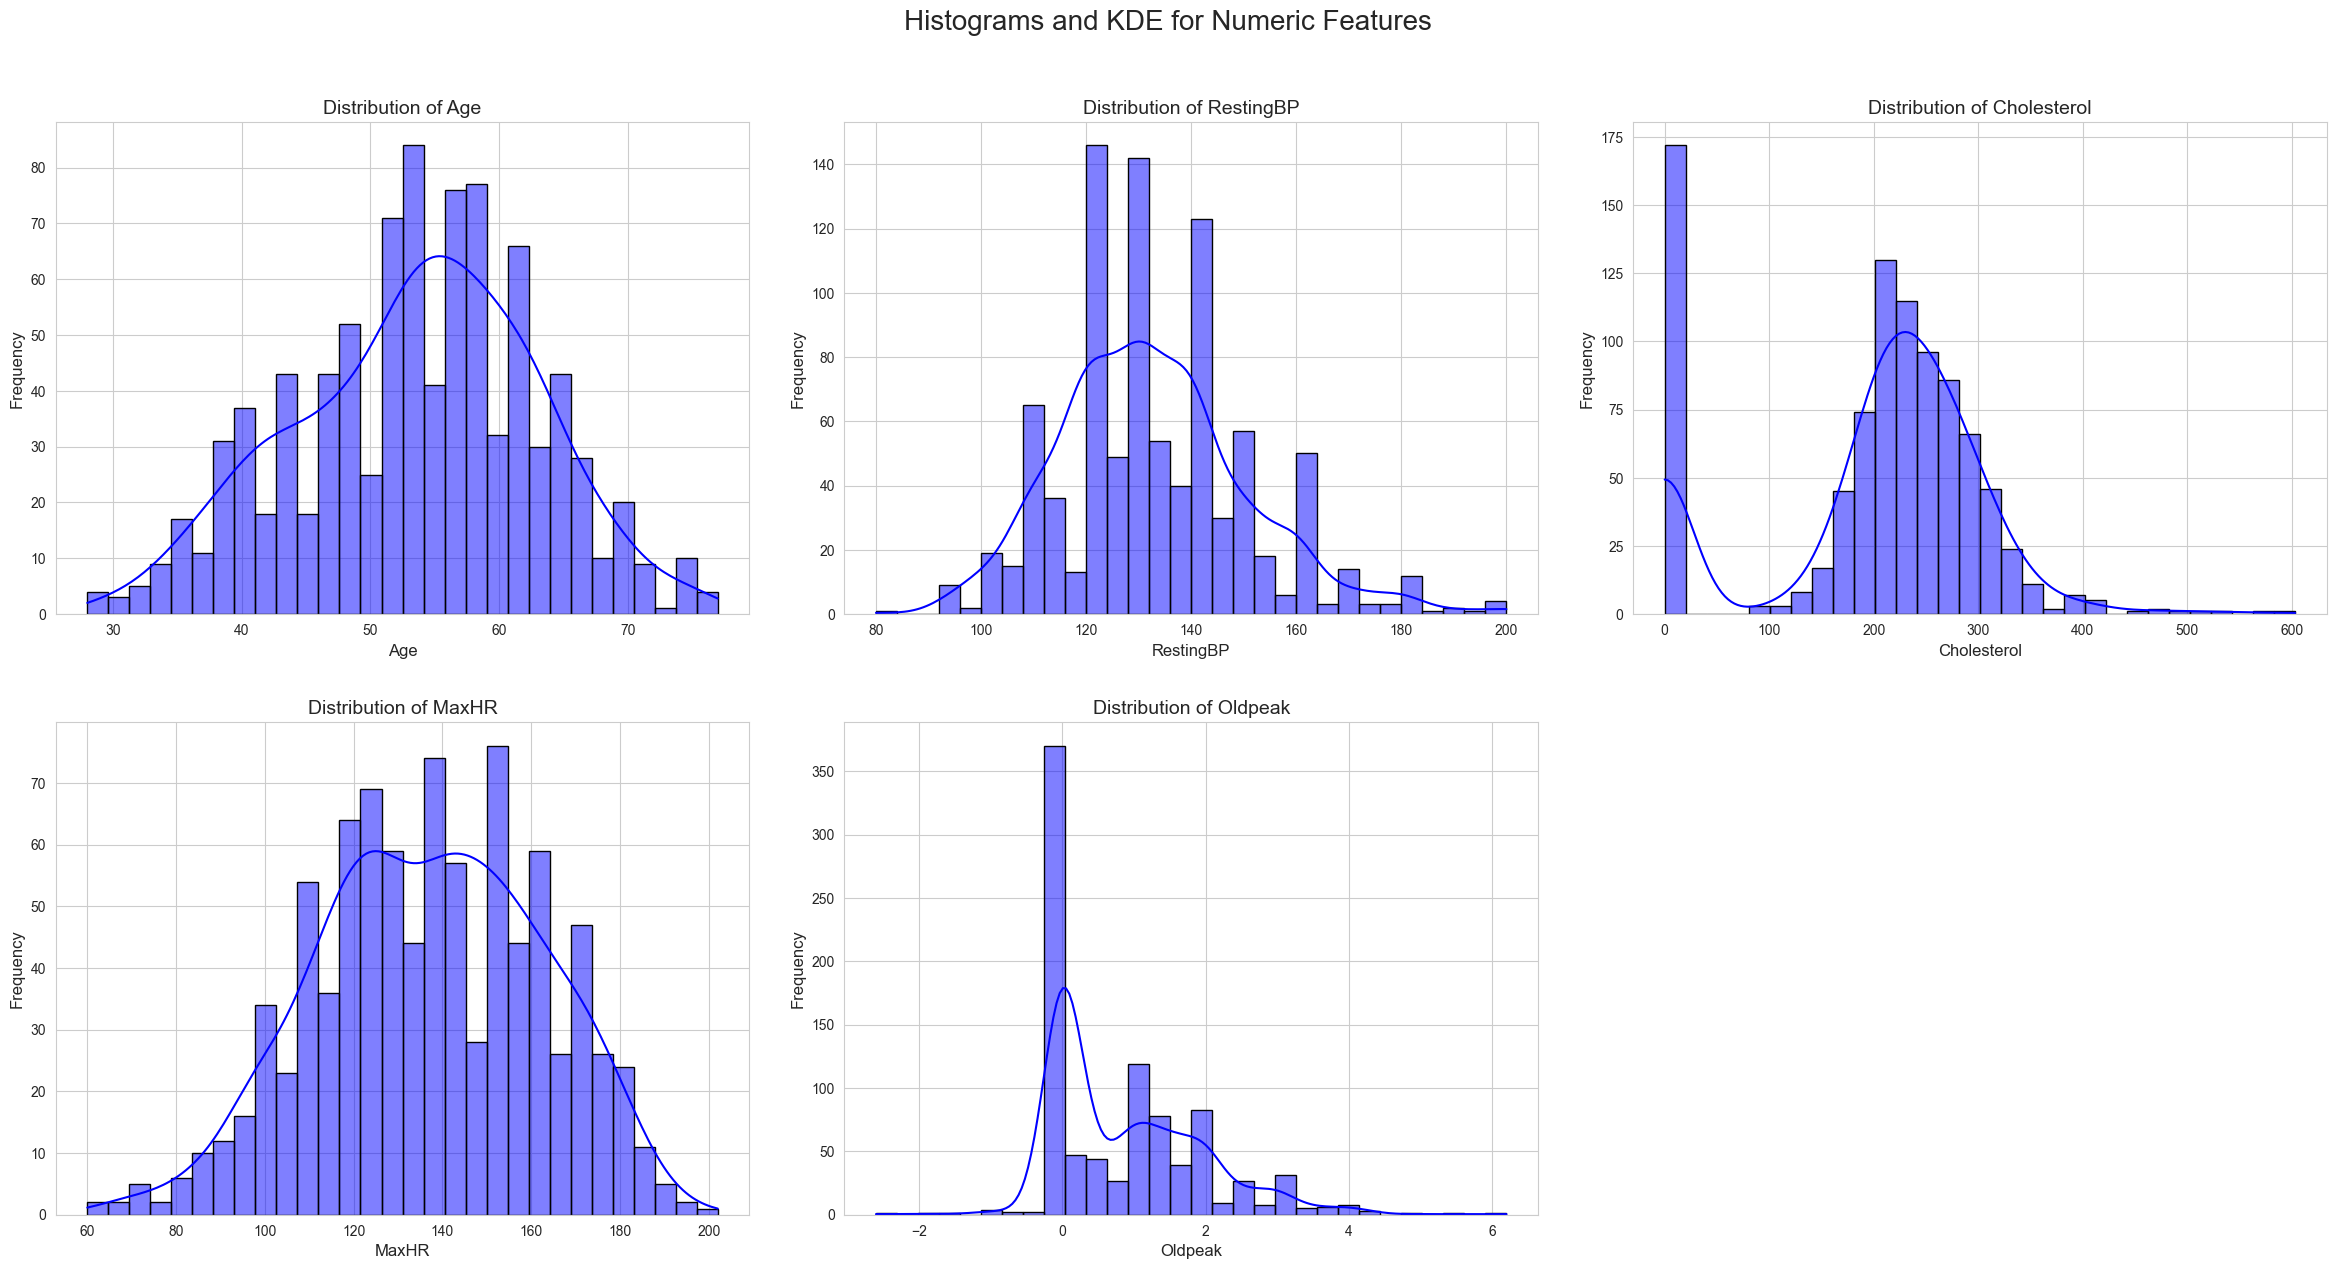

In [208]:
plot_histogram_kde_distirbution(heart_failure_df,numeric_columns)

In [209]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 -1.5*IQR
    upper_bound = Q3 + 1.5 *IQR
    outlier_mask = (df[column] <lower_bound)|(df[column]>upper_bound)
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column])
    plt.axvline(lower_bound, color='r', linestyle='--', label=f'Lower Bound:{lower_bound:.2f}')
    plt.axvline(upper_bound, color='g', linestyle='--', label=f'Upper Bound:{upper_bound:.2f}')
    plt.title(f'Box Plot for {column} with Outlier Bounds')
    plt.legend()
    plt.show()
    print(f'Outlier detection for {column}:')
    print(f'Lower bound: {lower_bound}, Upper bound: {upper_bound}')
    print(f'Number of outliers detected: {len(outlier_mask[outlier_mask])} ({len(outlier_mask[outlier_mask]) / len(df) * 100:.3f}%)')

    return lower_bound, upper_bound, outlier_mask

Outlier detection depends on the distribution and characteristics of each feature. 
### 1. `Age`:
   - Method: Z-Score or IQR (Interquartile Range) Method
   - Reason: The distribution is approximately normal. Z-Score is effective for identifying values beyond a specific standard deviation, while IQR works well for robust detection.

### 2. `RestingBP`:
   - Method: IQR Method
   - Reason: Slightly skewed but not heavily; the IQR method will effectively detect values outside the typical range.

### 3. `Cholesterol`:
   - Method: IQR Method
   - Reason: Positively skewed with some extreme outliers. IQR can handle skewness better than Z-Score.


### 4. `MaxHR` :
   - Method: Z-Score or IQR Method
   - Reason: Approximately normal distribution. Both Z-Score and IQR are suitable for detecting outliers in heart rate.

### 5. `Oldpeak`:
   - Method: IQR Method
   - Reason: Positively skewed with clear outliers. IQR is more robust to skewness and is effective here.



### Detecting Outliers using IQR Method

In [210]:
outlier_numeric_features  = heart_failure_df.loc[:,['Age','RestingBP','Cholesterol', 'MaxHR', 'Oldpeak']]


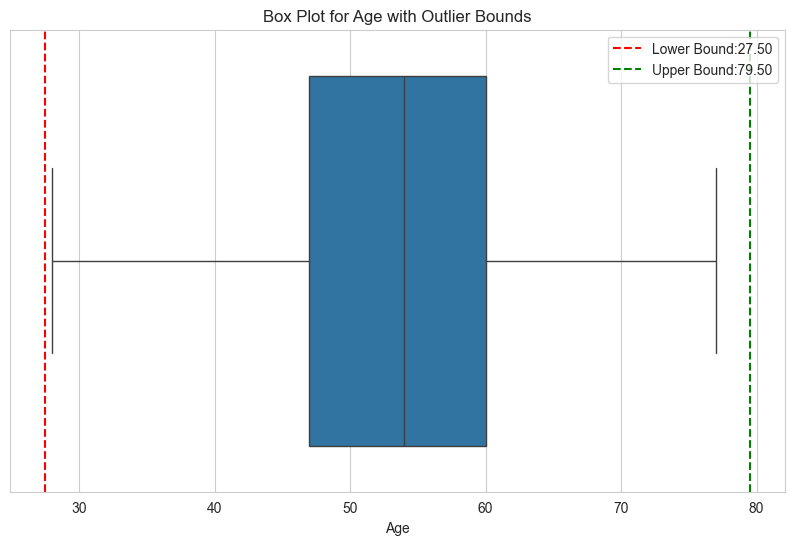

Outlier detection for Age:
Lower bound: 27.5, Upper bound: 79.5
Number of outliers detected: 0 (0.000%)


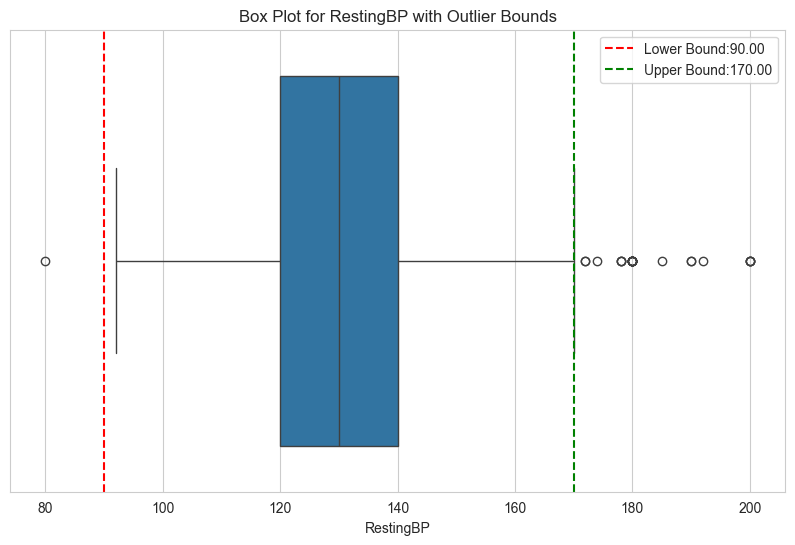

Outlier detection for RestingBP:
Lower bound: 90.0, Upper bound: 170.0
Number of outliers detected: 27 (2.941%)


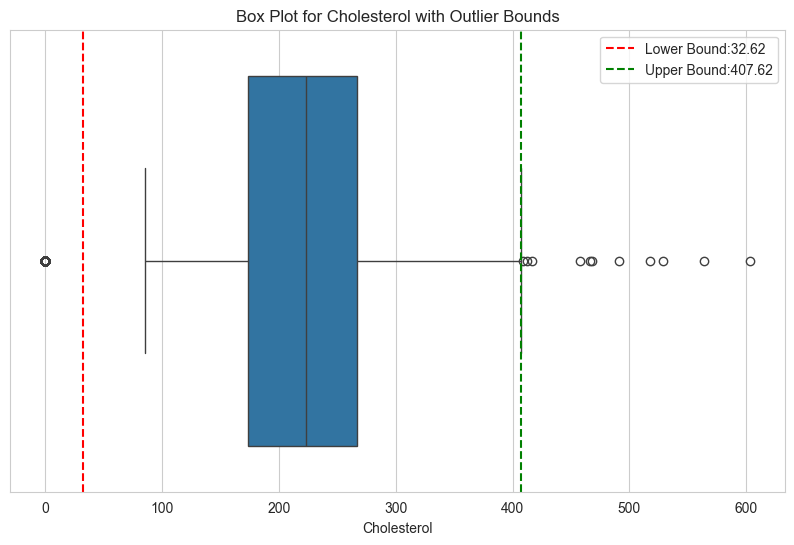

Outlier detection for Cholesterol:
Lower bound: 32.625, Upper bound: 407.625
Number of outliers detected: 183 (19.935%)


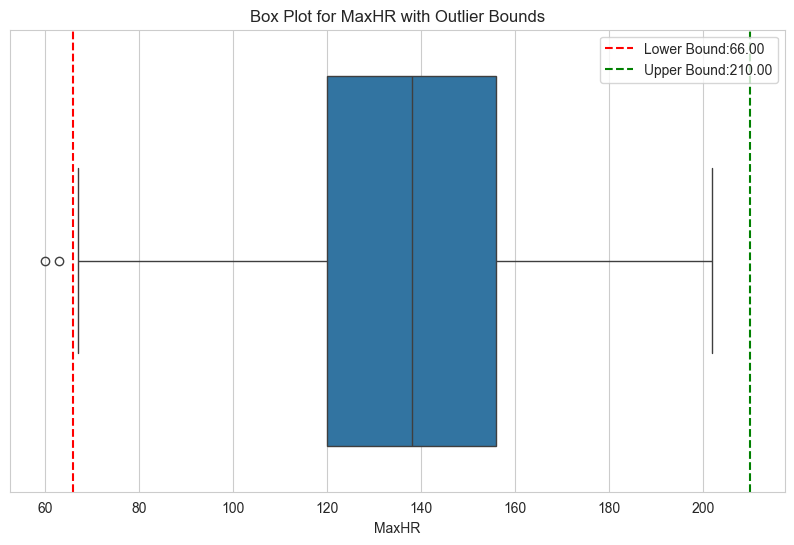

Outlier detection for MaxHR:
Lower bound: 66.0, Upper bound: 210.0
Number of outliers detected: 2 (0.218%)


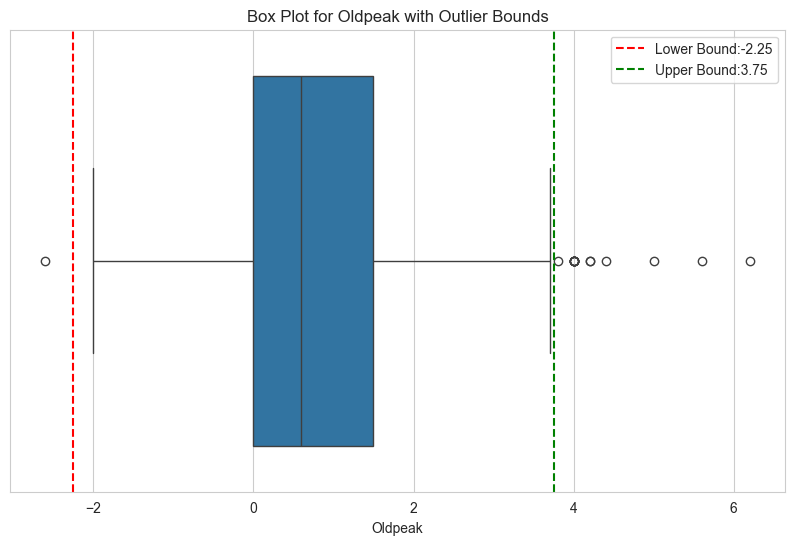

Outlier detection for Oldpeak:
Lower bound: -2.25, Upper bound: 3.75
Number of outliers detected: 16 (1.743%)


In [211]:
for col in outlier_numeric_features :
    detect_outliers_iqr(heart_failure_df,col)

Age               Axes(0.125,0.747241;0.227941x0.132759)
RestingBP      Axes(0.398529,0.747241;0.227941x0.132759)
Cholesterol    Axes(0.672059,0.747241;0.227941x0.132759)
MaxHR             Axes(0.125,0.587931;0.227941x0.132759)
Oldpeak        Axes(0.398529,0.587931;0.227941x0.132759)
dtype: object

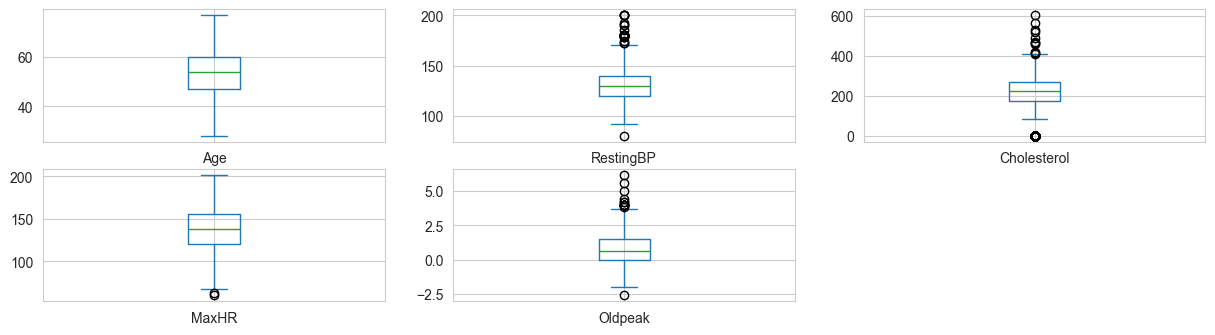

In [212]:
outlier_numeric_features.plot(kind='box', subplots=True, sharex=False, sharey=False, layout=(5,3), figsize=(15,10)) 

Detecting Outliers for `Age` and `MaxHR` using z-score

In [213]:
def detect_outliers_zscore(df, column, threshold=3):
    z_scores = (df[column] - df[column].mean()) / df[column].std()
    outlier_mask = np.abs(z_scores) > threshold
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f'Z-Score Distribution for {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()
    print(f'Outlier detection for {column}:')
    print(f'Number of outliers detected: {outlier_mask.sum()} ({outlier_mask.sum() / len(df) * 100:.3f}%)')

    return outlier_mask

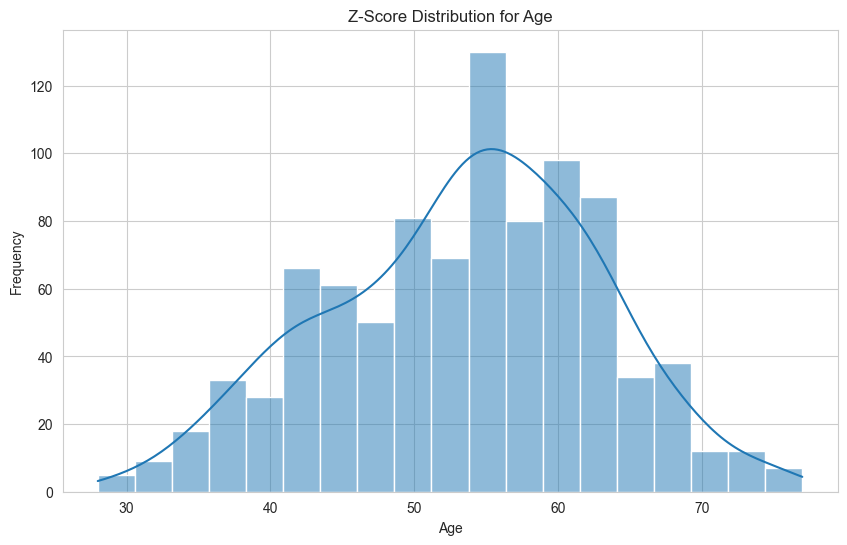

Outlier detection for Age:
Number of outliers detected: 0 (0.000%)


In [214]:
outlier_mask_age = detect_outliers_zscore(heart_failure_df, 'Age')

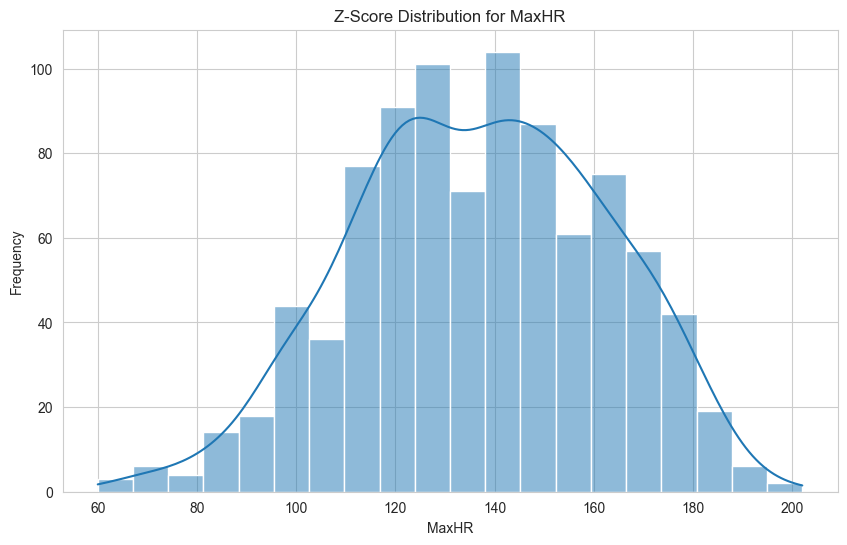

Outlier detection for MaxHR:
Number of outliers detected: 1 (0.109%)


In [215]:
zscore_outlier_mask_maxHR = detect_outliers_zscore(heart_failure_df, 'MaxHR')

### After Detecting the Outliers :
1. `Age` : Has no outliers .
2. `MaxHR` : Has two outliers detected using IQR method but only one outlier using z-score method 
3. Outlier detection for `RestingBP `:
Lower bound: 90.0, Upper bound: 170.0
Number of outliers detected: 28 (3.050%)
4. Outlier detection for `Cholesterol`:
Lower bound: 32.625, Upper bound: 407.625
Number of outliers detected: 183 (19.935%)
5. Outlier detection for `Oldpeak`:
Lower bound: -2.25, Upper bound: 3.75
Number of outliers detected: 16 (1.743%)



#### 4.4.2 Handling Outliers

Function for plotting IQR :

In [216]:
def plot_iqr_boxplot(df, original_column, capped_column):
    Q1 = df[original_column].quantile(0.25)
    Q3 = df[original_column].quantile(0.75)
    IQR = Q3 - Q1
    upper_threshold = Q3 + 1.5 * IQR
    lower_threshold = Q1 - 1.5 * IQR
    original_outliers = ((df[original_column] > upper_threshold) | (df[original_column] < lower_threshold)).sum()
    original_outlier_percent = (original_outliers / len(df)) * 100

    capped_outliers = ((df[capped_column] > upper_threshold) | (df[capped_column] < lower_threshold)).sum()
    capped_outlier_percent = (capped_outliers / len(df)) * 100

    print(f'Original outliers in {original_column}: {original_outliers} ({original_outlier_percent:.2f}%)')
    print(f'Outliers after capping in {capped_column}: {capped_outliers} ({capped_outlier_percent:.2f}%)')
    fig, ax = plt.subplots(1, 2, figsize=(14, 6))
    sns.boxplot(y=df[original_column], ax=ax[0])
    ax[0].set_title(f'IQR Box Plot for {original_column} Before Capping')
    ax[0].set_ylabel(original_column)

    sns.boxplot(y=df[capped_column], ax=ax[1])
    ax[1].set_title(f'IQR Box Plot for {capped_column} After Capping')
    ax[1].set_ylabel(capped_column)

    plt.tight_layout()
    plt.show()


Function to detect the outliers after using Log Transformation :

In [217]:
def detect_outliers_with_log(df, original_column):
    # Apply log transformation to the column
    transformed_column = f"{original_column}_log_transformation"
    df[transformed_column] = np.log(df[original_column] + 1)  # Adding 1 to avoid log(0)
    
    Q1_orig = df[original_column].quantile(0.25)
    Q3_orig = df[original_column].quantile(0.75)
    IQR_orig = Q3_orig - Q1_orig
    upper_orig = Q3_orig + 1.5 * IQR_orig
    lower_orig = Q1_orig - 1.5 * IQR_orig
    orig_outliers = ((df[original_column] > upper_orig) | (df[original_column] < lower_orig)).sum()
    
    Q1_trans = df[transformed_column].quantile(0.25)
    Q3_trans = df[transformed_column].quantile(0.75)
    IQR_trans = Q3_trans - Q1_trans
    upper_trans = Q3_trans + 1.5 * IQR_trans
    lower_trans = Q1_trans - 1.5 * IQR_trans
    trans_outliers = ((df[transformed_column] > upper_trans) | (df[transformed_column] < lower_trans)).sum()
    
    print(f"Original outliers in '{original_column}': {orig_outliers} ({orig_outliers / len(df) * 100:.2f}%)")
    print(f"Outliers in '{transformed_column}' after log transformation: {trans_outliers} ({trans_outliers / len(df) * 100:.2f}%)")
    
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    
    sns.boxplot(y=df[original_column], ax=axes[0])
    axes[0].set_title(f"Box Plot for {original_column} Before Log Transformation")
    axes[0].set_ylabel(original_column)
    
    sns.boxplot(y=df[transformed_column], ax=axes[1])
    axes[1].set_title(f"Box Plot for {original_column} After Log Transformation")
    axes[1].set_ylabel(transformed_column)
    
    plt.tight_layout()
    plt.show()




Function to Plot the outliers before and after perfroming power transformation

In [218]:


def detect_outliers_with_power_transform(df, original_column):
    # Apply Power Transformation (Yeo-Johnson)
    transformer = PowerTransformer(method='yeo-johnson')
    transformed_column = f"{original_column}_Transformed"
    df[transformed_column] = transformer.fit_transform(df[[original_column]])
    
    # Calculate IQR for original data
    Q1_orig = df[original_column].quantile(0.25)
    Q3_orig = df[original_column].quantile(0.75)
    IQR_orig = Q3_orig - Q1_orig
    upper_orig = Q3_orig + 1.5 * IQR_orig
    lower_orig = Q1_orig - 1.5 * IQR_orig
    orig_outliers = ((df[original_column] > upper_orig) | (df[original_column] < lower_orig)).sum()
    
    # Calculate IQR for power-transformed data
    Q1_trans = df[transformed_column].quantile(0.25)
    Q3_trans = df[transformed_column].quantile(0.75)
    IQR_trans = Q3_trans - Q1_trans
    upper_trans = Q3_trans + 1.5 * IQR_trans
    lower_trans = Q1_trans - 1.5 * IQR_trans
    trans_outliers = ((df[transformed_column] > upper_trans) | (df[transformed_column] < lower_trans)).sum()
    
    # Print summary
    print(f"Original outliers in '{original_column}': {orig_outliers} ({orig_outliers / len(df) * 100:.2f}%)")
    print(f"Outliers in '{transformed_column}' after Power Transformation: {trans_outliers} ({trans_outliers / len(df) * 100:.2f}%)")
    
    # Plot boxplots to visualize
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    
    sns.boxplot(y=df[original_column], ax=axes[0])
    axes[0].set_title(f"Box Plot for {original_column} Before Power Transformation")
    axes[0].set_ylabel(original_column)
    
    sns.boxplot(y=df[transformed_column], ax=axes[1])
    axes[1].set_title(f"Box Plot for {original_column} After Power Transformation")
    axes[1].set_ylabel(transformed_column)
    
    plt.tight_layout()
    plt.show()


Function for Plotting Original Vs Transformed KDE Histogram for each feature :

In [219]:
def plot_original_vs_transformed_kde_hist(df, column_name, transformed_column_name):

    fig, ax = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

    sns.histplot(df[column_name], ax=ax[0], kde=True, color='skyblue', bins=30, edgecolor='black', alpha=0.7)
    ax[0].set_title(f'Original {column_name} Distribution', fontsize=14, weight='bold')
    ax[0].set_xlabel(column_name, fontsize=12)
    ax[0].set_ylabel('Frequency', fontsize=12)
    ax[0].tick_params(axis='both', which='major', labelsize=10)
    ax[0].grid(axis='y', linestyle='--', alpha=0.7)

    sns.histplot(df[transformed_column_name], ax=ax[1], kde=True, color='coral', bins=30, edgecolor='black', alpha=0.7)
    ax[1].set_title(f'Transformed {column_name} Distribution', fontsize=14, weight='bold')
    ax[1].set_xlabel(transformed_column_name, fontsize=12)
    ax[1].set_ylabel('Frequency', fontsize=12)
    ax[1].tick_params(axis='both', which='major', labelsize=10)
    ax[1].grid(axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()



Function for applying SQRT Transformation :

In [220]:

def handling_outliers_sqrt_transformation(df, column_name):
    new_column_name = f"{column_name}_sqrt_transformation"
    df[new_column_name] = np.sqrt(df[column_name])
    return df

Function for applying Log Transformation :

In [221]:
def handling_outliers_log_transformation(df, column_name):
    new_column_name = f"{column_name}_log_transformation"
    df[new_column_name] = np.log1p(df[column_name])

    return df

Function for Capping Outliers IQR :

In [222]:
def cap_outliers_iqr(df, column, new_column_name, iqr_factor=1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    upper_threshold = Q3 + iqr_factor * IQR
    lower_threshold = Q1 - iqr_factor * IQR
    df[new_column_name] = np.where(df[column] > upper_threshold, upper_threshold, df[column])
    df[new_column_name] = np.where(df[new_column_name] < lower_threshold, lower_threshold, df[new_column_name])
    return df

1. `MaxHR` Capping

In [223]:
heart_failure_df = cap_outliers_iqr(heart_failure_df, 'MaxHR', 'MaxHR_Capped')

Original outliers in MaxHR: 2 (0.22%)
Outliers after capping in MaxHR_Capped: 0 (0.00%)


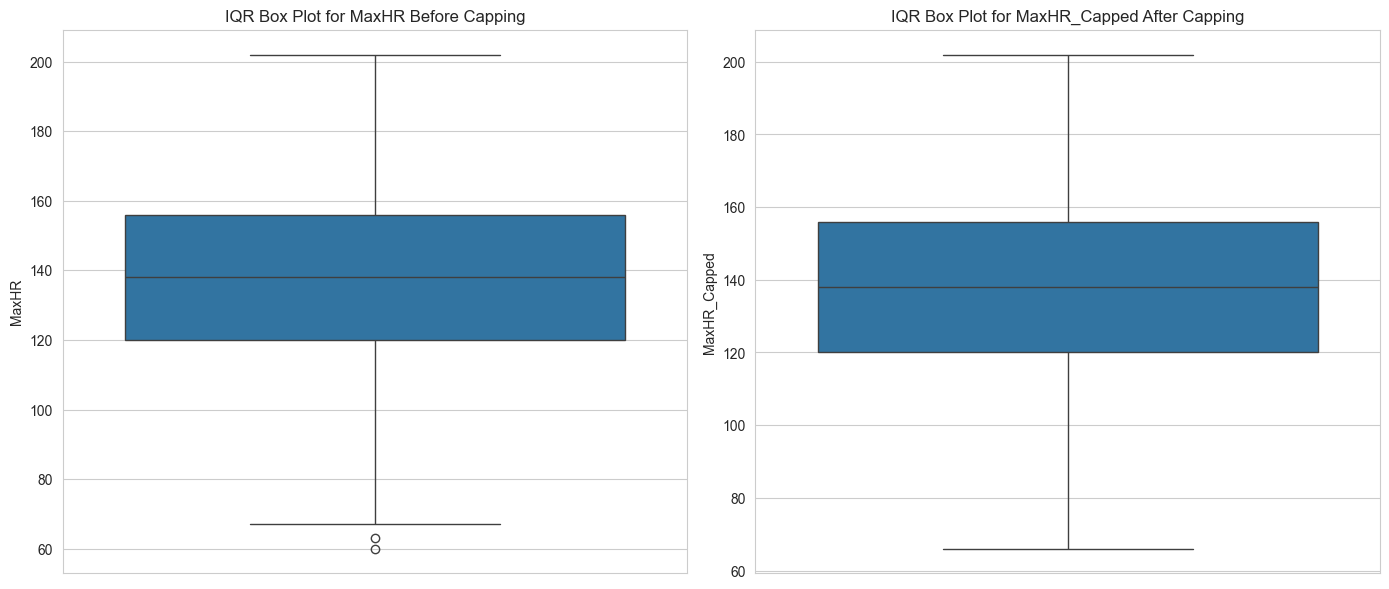

In [224]:
plot_iqr_boxplot(heart_failure_df,'MaxHR','MaxHR_Capped')

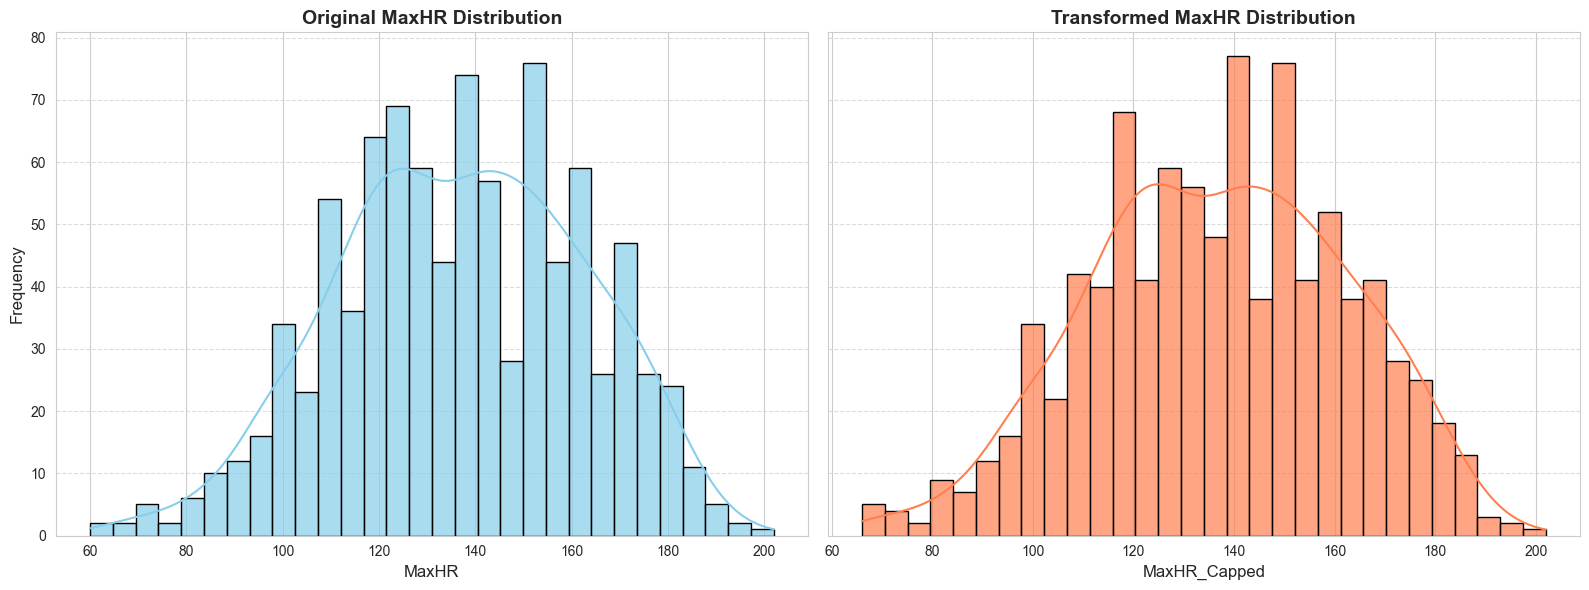

In [225]:
plot_original_vs_transformed_kde_hist(heart_failure_df,'MaxHR', 'MaxHR_Capped')

2. `RestingBP` Capping

In [226]:
heart_failure_df = cap_outliers_iqr(heart_failure_df, 'RestingBP', 'RestingBP_Capped')

Original outliers in RestingBP: 27 (2.94%)
Outliers after capping in RestingBP_Capped: 0 (0.00%)


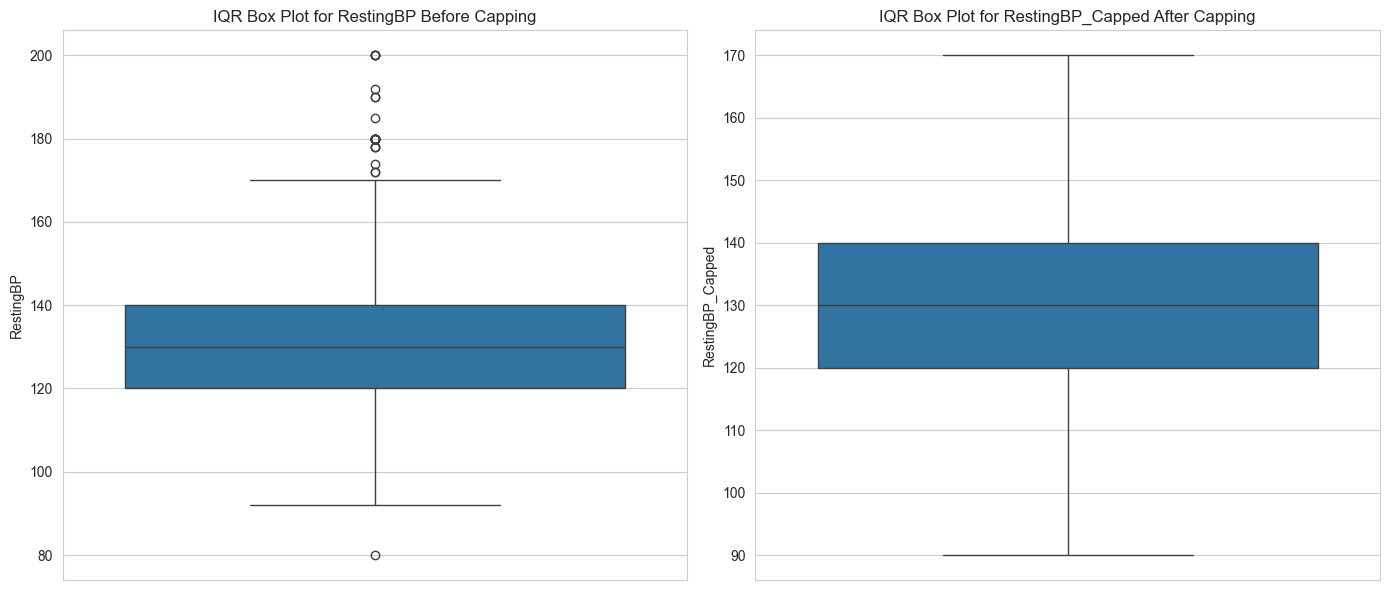

In [227]:
plot_iqr_boxplot(heart_failure_df,'RestingBP', 'RestingBP_Capped')

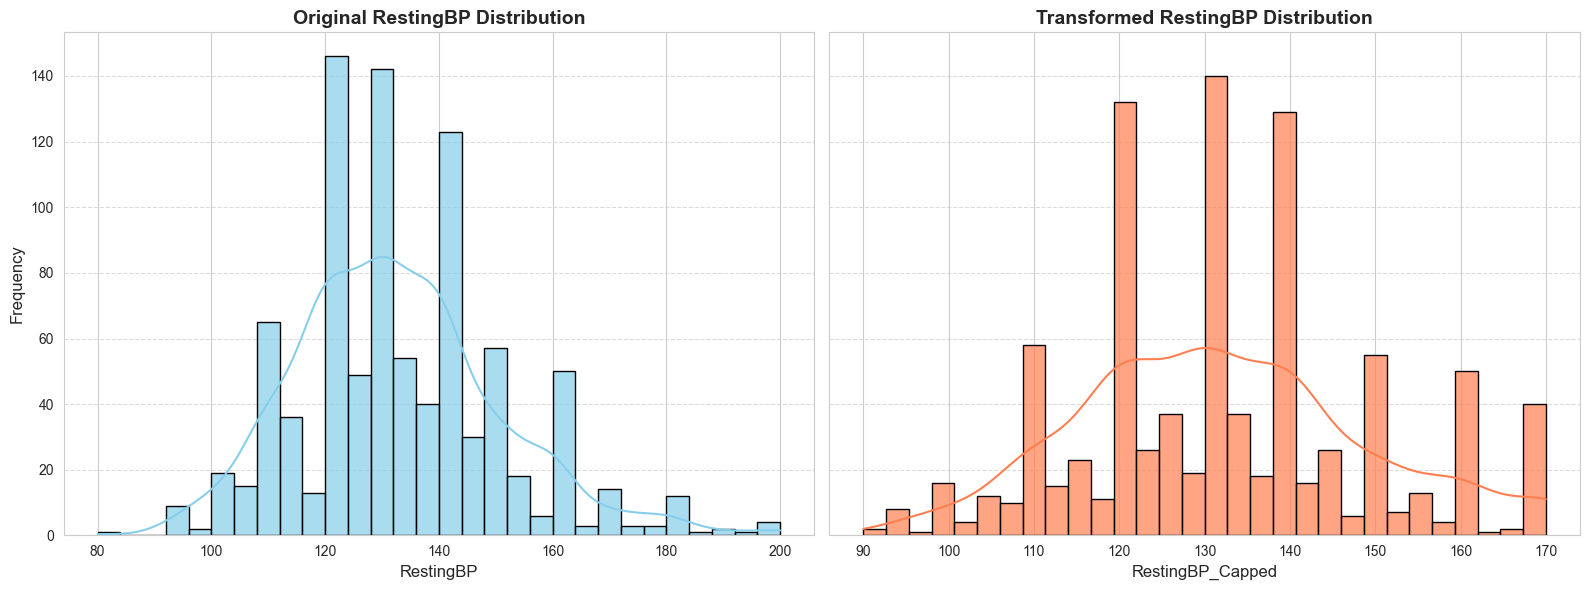

In [228]:
plot_original_vs_transformed_kde_hist(heart_failure_df,'RestingBP', 'RestingBP_Capped')

2. `RestingBP` Log Transformation

In [229]:
heart_failure_df = handling_outliers_log_transformation(heart_failure_df,'RestingBP')

Original outliers in 'RestingBP': 27 (2.94%)
Outliers in 'RestingBP_log_transformation' after log transformation: 33 (3.59%)


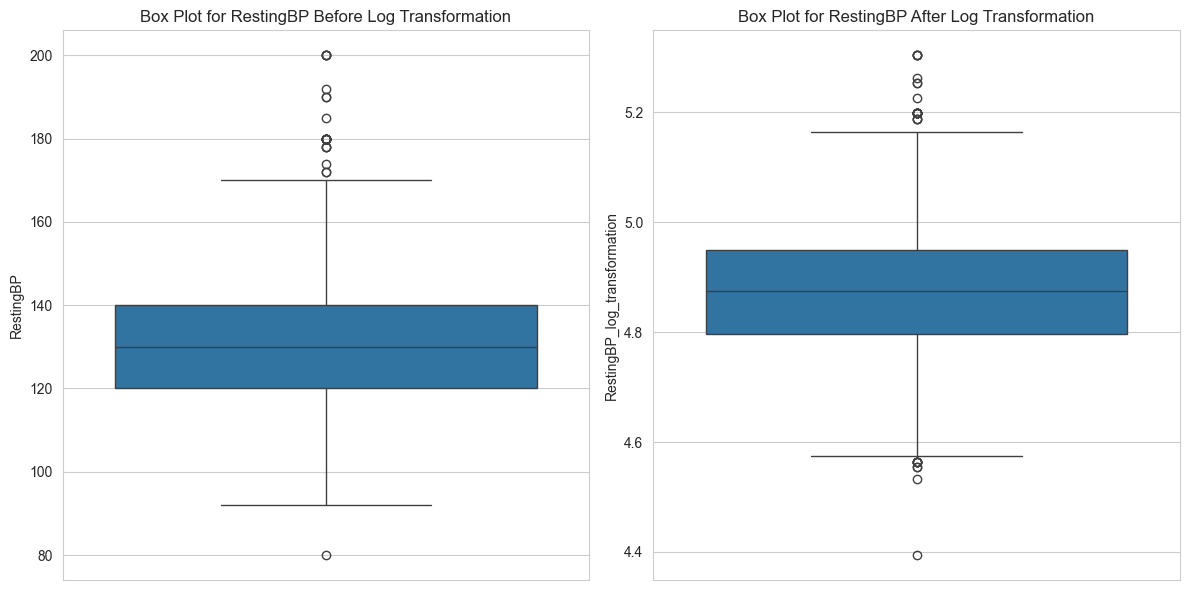

In [230]:
detect_outliers_with_log(heart_failure_df,'RestingBP')

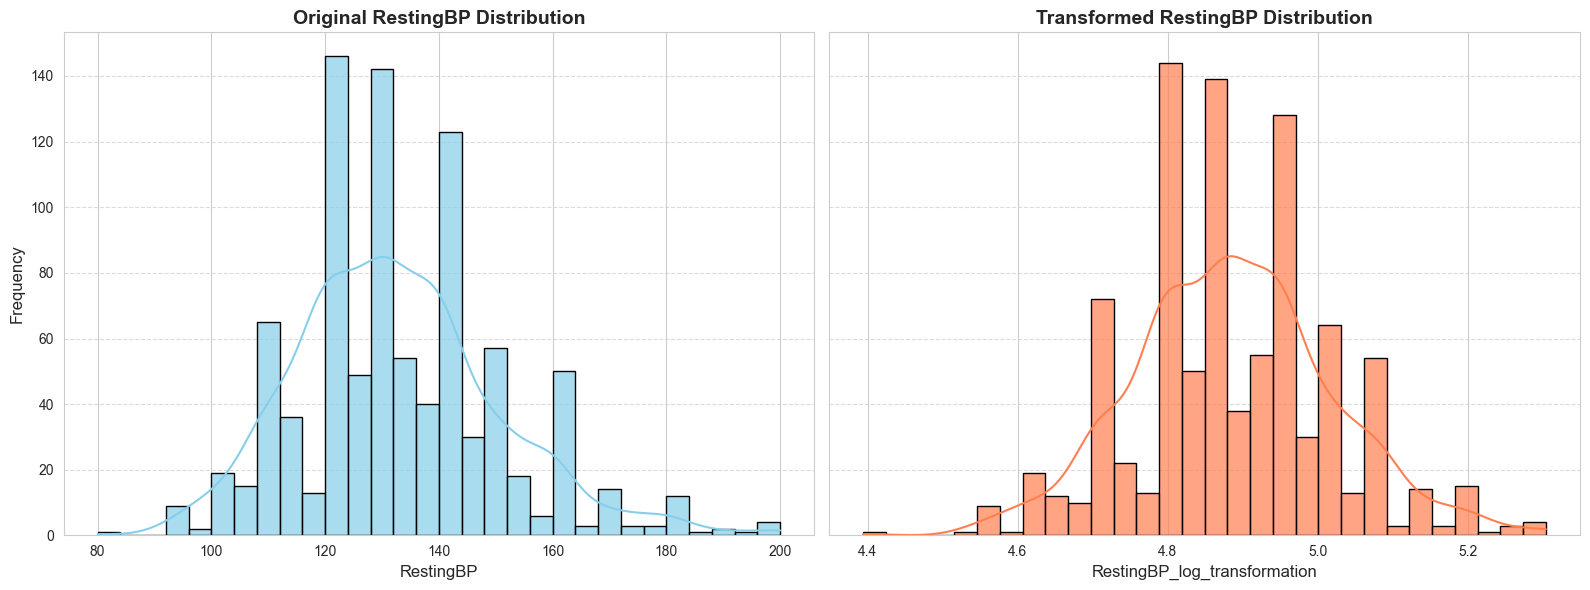

In [231]:
plot_original_vs_transformed_kde_hist(heart_failure_df,'RestingBP', 'RestingBP_log_transformation')

3. `Oldpeak` Capping

In [232]:
heart_failure_df = cap_outliers_iqr(heart_failure_df, 'Oldpeak', 'Oldpeak_Capped')

Original outliers in Oldpeak: 16 (1.74%)
Outliers after capping in Oldpeak_Capped: 0 (0.00%)


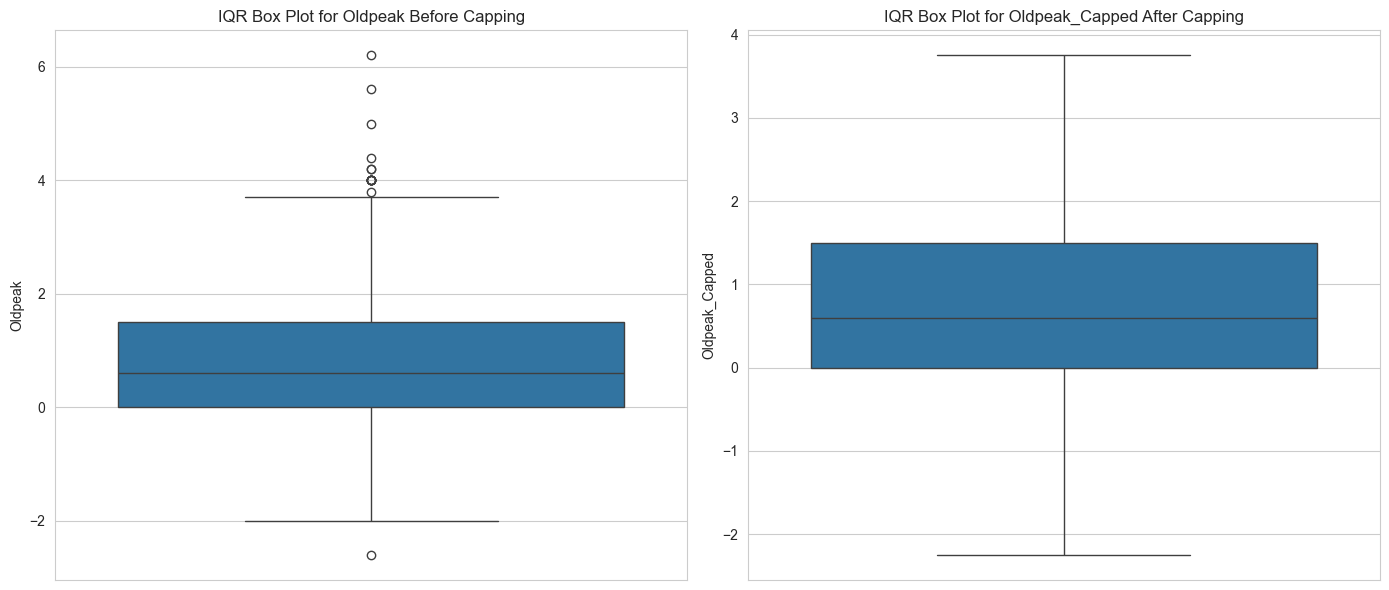

In [233]:
plot_iqr_boxplot(heart_failure_df,'Oldpeak', 'Oldpeak_Capped')

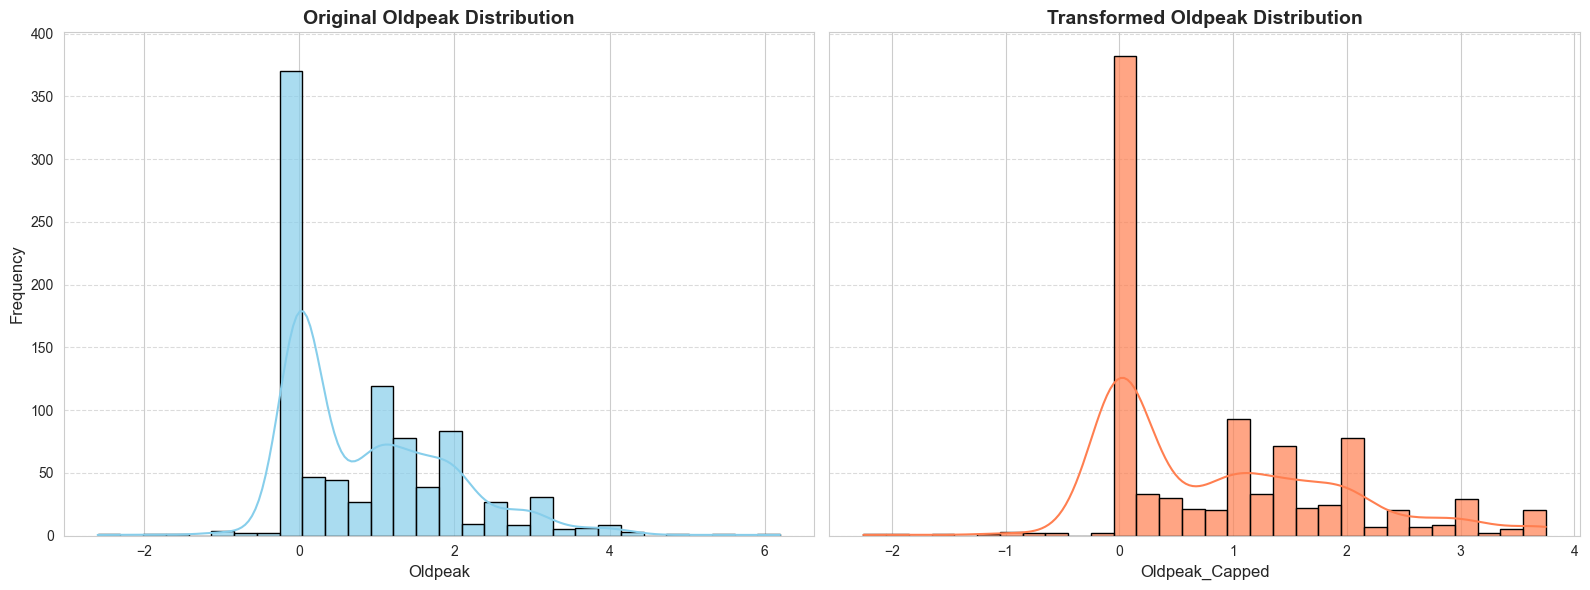

In [234]:
plot_original_vs_transformed_kde_hist(heart_failure_df,'Oldpeak', 'Oldpeak_Capped')

3. `Oldpeak` using power Transformation

In [235]:
transformer = PowerTransformer(method='yeo-johnson')
heart_failure_df['Oldpeak_Transformed'] = transformer.fit_transform(heart_failure_df[['Oldpeak']])

Original outliers in 'Oldpeak': 16 (1.74%)
Outliers in 'Oldpeak_Transformed' after Power Transformation: 4 (0.44%)


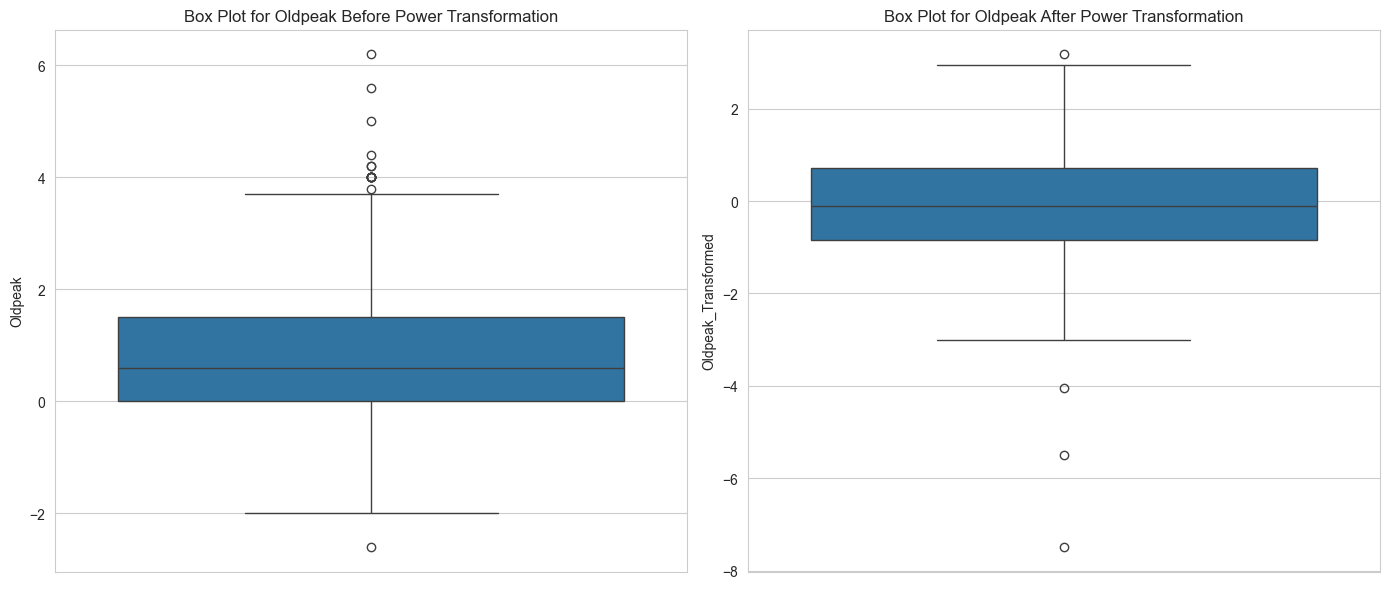

In [236]:
detect_outliers_with_power_transform(heart_failure_df,'Oldpeak')

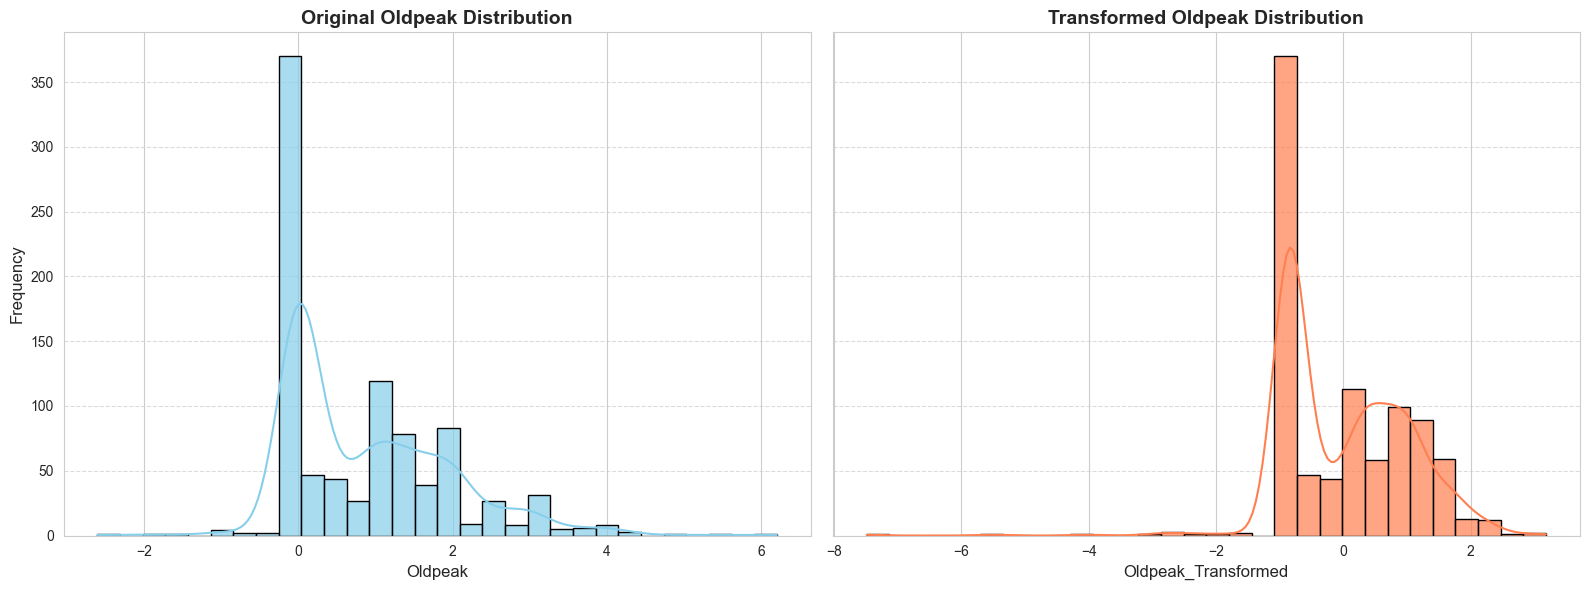

In [237]:
plot_original_vs_transformed_kde_hist(heart_failure_df,'Oldpeak','Oldpeak_Transformed')

4.`Cholesterol`:
Since Number of outliers detected: 183 (19.935%) ,so using capping direclty will effect on the feature values disturbution , so need for standardization or transformation in order to adjust the values

In [238]:
heart_failure_df = cap_outliers_iqr(heart_failure_df, 'Cholesterol', 'Cholesterol_Capped')

Original outliers in Cholesterol: 183 (19.93%)
Outliers after capping in Cholesterol_Capped: 0 (0.00%)


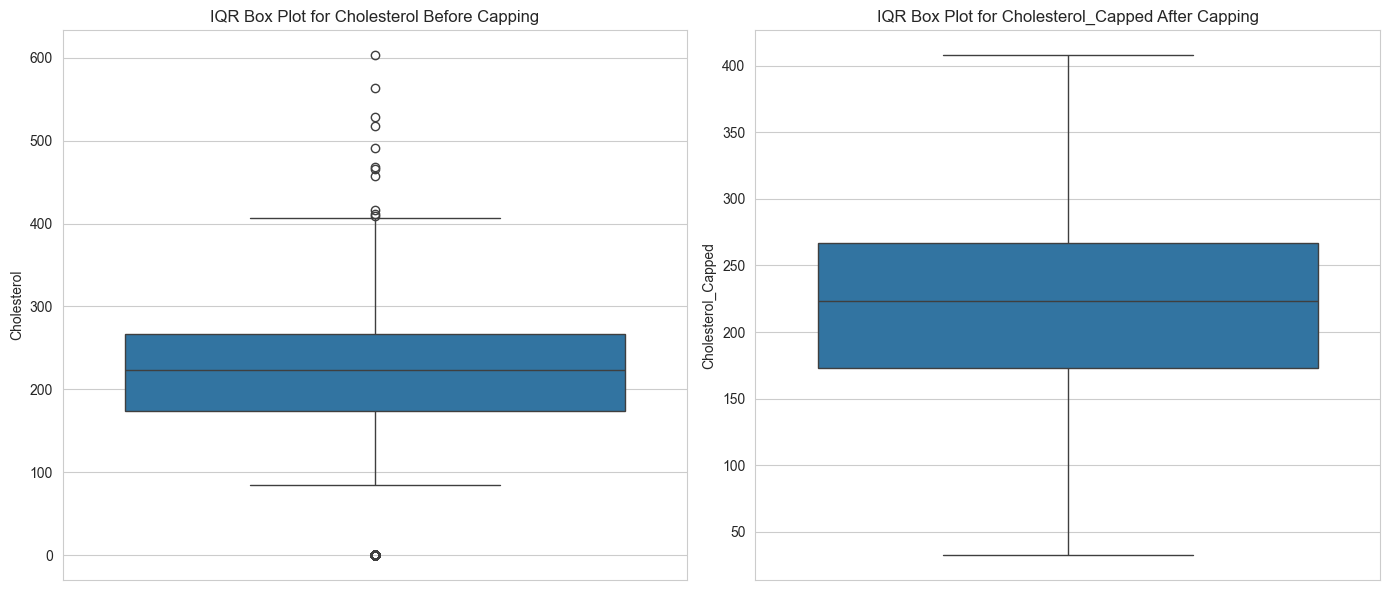

In [239]:
plot_iqr_boxplot(heart_failure_df,'Cholesterol', 'Cholesterol_Capped')

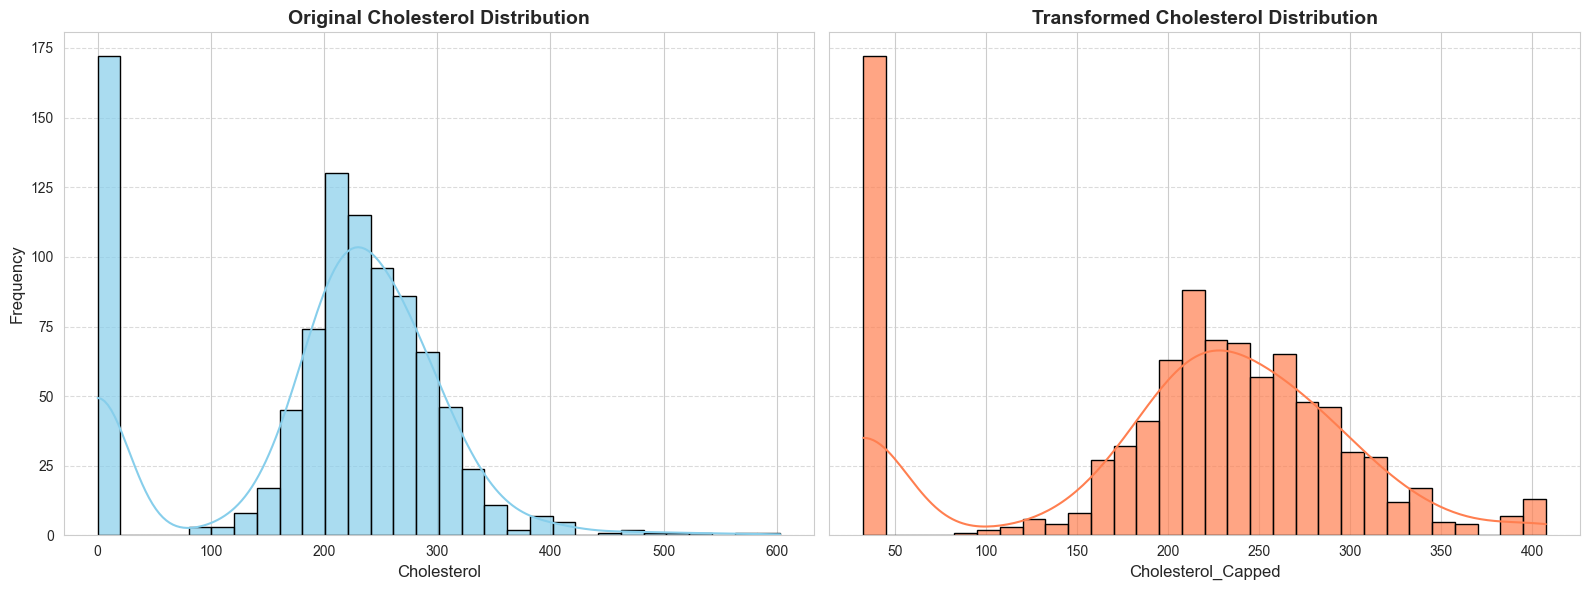

In [240]:
plot_original_vs_transformed_kde_hist(heart_failure_df,'Cholesterol', 'Cholesterol_Capped')

In [241]:
heart_failure_df = handling_outliers_log_transformation(heart_failure_df,'Cholesterol')

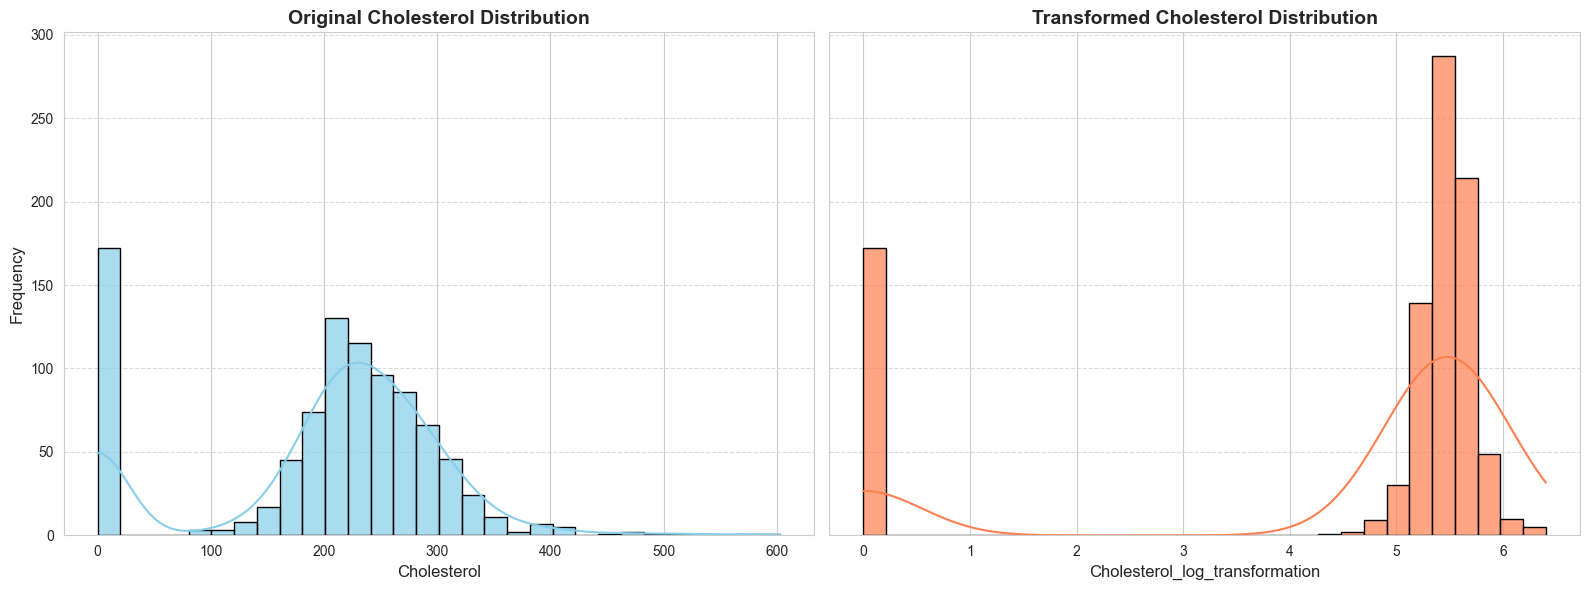

In [242]:
plot_original_vs_transformed_kde_hist(heart_failure_df,'Cholesterol','Cholesterol_log_transformation')

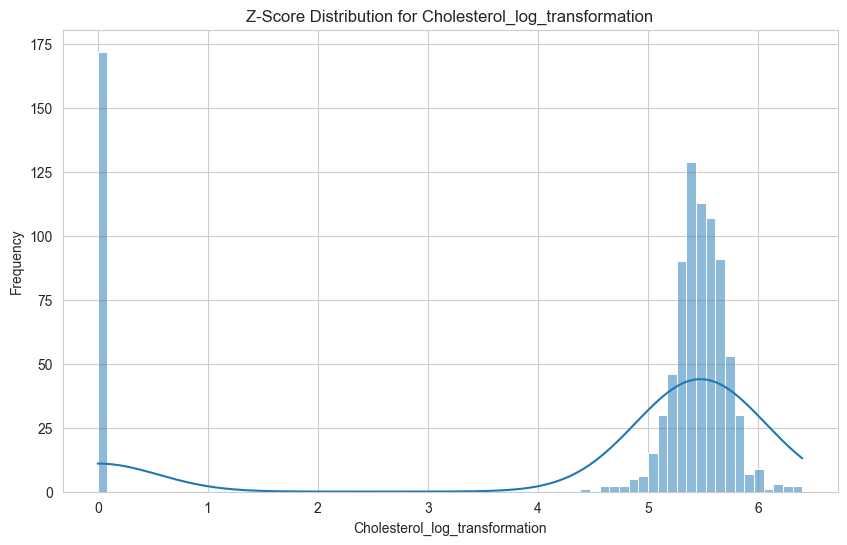

Outlier detection for Cholesterol_log_transformation:
Number of outliers detected: 0 (0.000%)


0      False
1      False
2      False
3      False
4      False
       ...  
913    False
914    False
915    False
916    False
917    False
Name: Cholesterol_log_transformation, Length: 918, dtype: bool

In [243]:
detect_outliers_zscore(heart_failure_df,'Cholesterol_log_transformation')

##### After using Capping and Log transformation , We Discovered that capping is more effective in Handling the Outliers, as log transformation shift and skew the distirbution and shows more Outliers .

In [244]:
heart_failure_df

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  MaxHR_Capped  \
0      172              N      0.0       Up             0         172.0   
1      156              N      1.0     Flat             1         156.0   
2       98              N      0.0       Up             0          98.0   
3      108              Y      1.5     Flat             1         108.0   
4      122              N      0.0       Up             0         122.0   
..     ...            ...      ...      ...           ...           ...   
913    132              N      1.2     Flat             1         132.0   
914    141              N      3.4     Flat             1         141.0   
915    115              Y      1.2     Flat             1         115.0   
916    174              N      0.0     Flat             1         174.0   
917    173              N      0.0       Up             0         173.0   

     RestingBP_Capped  RestingBP_log_transformation  Oldpeak_Capped  \
0               140.0                      4.948760             0.0   
1               160.0                      5.081404             1.0   
2               130.0                      4.875197             0.0   
3               138.0                      4.934474             1.5   
4               150.0                      5.017280             0.0   
..                ...                           ...             ...   
913             110.0                      4.709530             1.2   
914             144.0                      4.976734             3.4   
915             130.0                      4.875197             1.2   
916             130.0                      4.875197             0.0   
917             138.0                      4.934474             0.0   

     Oldpeak_Transformed  Cholesterol_Capped  Cholesterol_log_transformation  
0              -0.851394               289.0                        5.669881  
1               0.286444               180.0                        5.198497  
2              -0.851394               283.0                        5.648974  
3               0.709738               214.0                        5.370638  
4              -0.851394               195.0                        5.278115  
..                   ...                 ...                             ...  
913             0.463557               264.0                        5.579730  
914             1.927524               193.0                        5.267858  
915             0.463557               131.0                        4.882802  
916            -0.851394               236.0                        5.468060  
917            -0.851394               175.0                        5.170484  

[918 rows x 19 columns]

##### Replacing the Capped Columns with each feature and Dropping the Capped

In [245]:
def drop_columns(df, columns_to_drop):
    df = df.drop(columns=columns_to_drop, errors='ignore') 
    return df

In [246]:
heart_failure_df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease', 'MaxHR_Capped', 'RestingBP_Capped',
       'RestingBP_log_transformation', 'Oldpeak_Capped', 'Oldpeak_Transformed',
       'Cholesterol_Capped', 'Cholesterol_log_transformation'],
      dtype='object')

In [247]:
heart_failure_df['MaxHR'] = heart_failure_df['MaxHR_Capped']
heart_failure_df['Oldpeak'] = heart_failure_df['Oldpeak_Capped']
heart_failure_df['RestingBP'] = heart_failure_df['RestingBP_Capped']
heart_failure_df['Cholesterol'] = heart_failure_df['Cholesterol_Capped']
# heart_failure_df['Cholesterol'] = heart_failure_df['Cholesterol_log_transformation']

columns_to_drop = [
    'MaxHR_Capped', 'Oldpeak_Capped', 'RestingBP_Capped',
    'Cholesterol_Capped', 'Cholesterol_log_transformation',
    'RestingBP_log_transformation', 'Oldpeak_Transformed'
]
heart_failure_df = drop_columns(heart_failure_df, columns_to_drop)

In [248]:
handled_outlier_feature = heart_failure_df.loc[:,['Age','RestingBP','Cholesterol', 'MaxHR', 'Oldpeak']]


#### 4.4.3 Show Histogram KDE Distirbution after Handling Outliers for `MaxHR` , `RestingBP` & `Oldpeak`

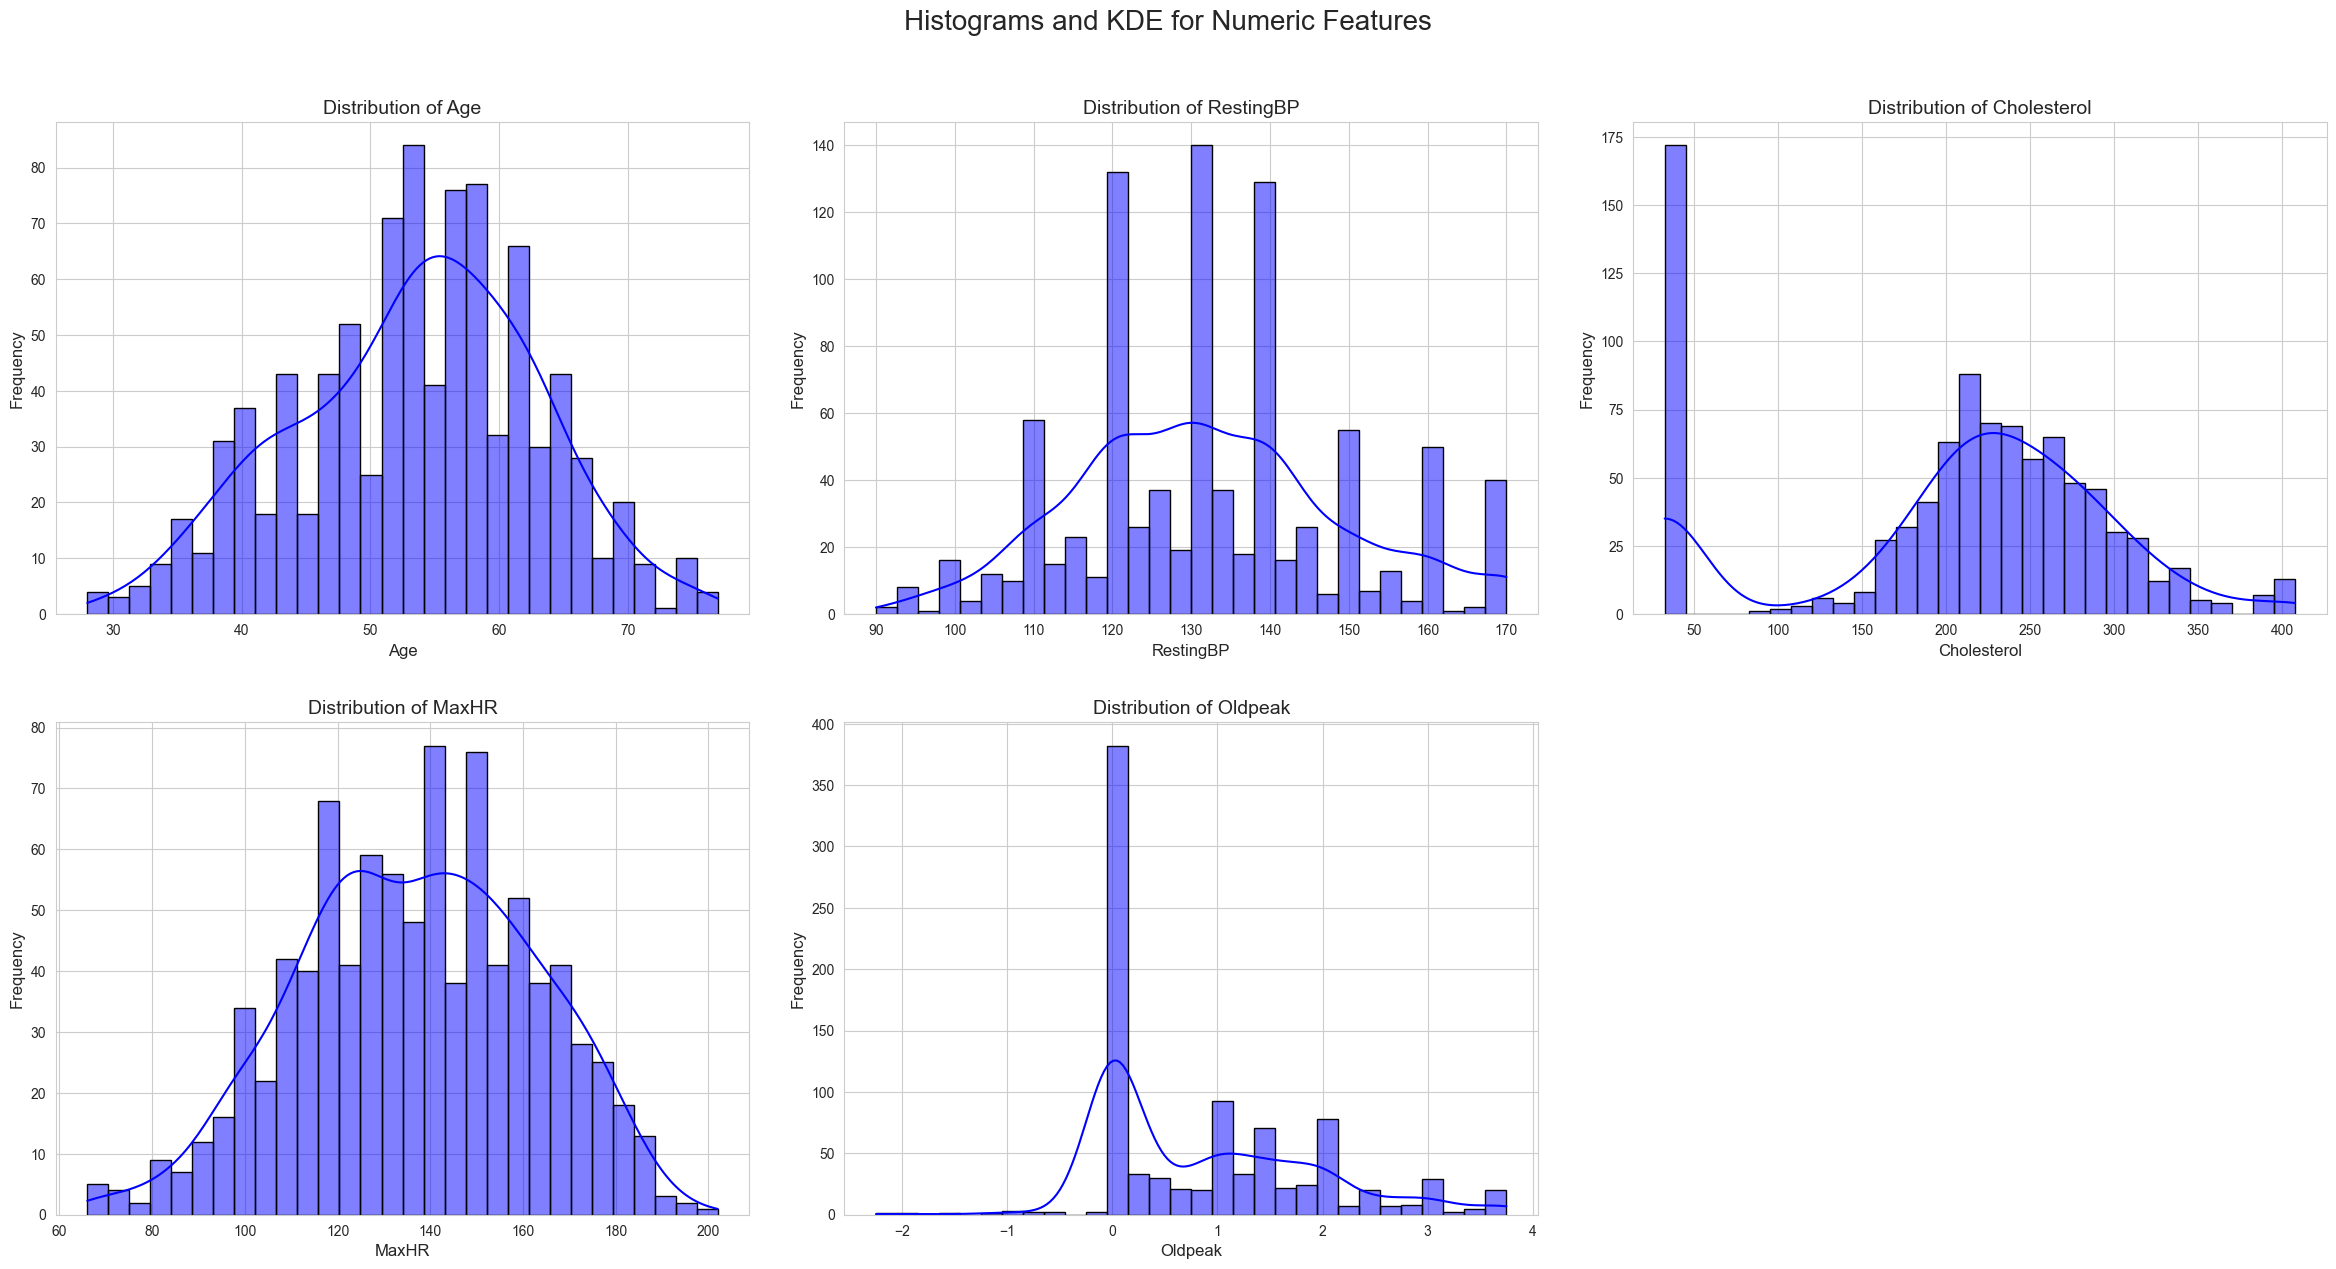

In [249]:
plot_histogram_kde_distirbution(heart_failure_df,handled_outlier_feature)

### 4.5 ◆ Binning & Smoothing




#### Numeric feature binning is a technique used to transform continuous numerical features into categorical features, which can be beneficial for classification models. This process involves dividing the range of values in a continuous feature into discrete bins or intervals, and then assigning a categorical label to each bin.

- Why Binning?
1. Reducing dimensionality: Binning can help reduce the number of features in a dataset, making it more manageable for classification models.
2. Capturing non-linear relationships: Binning can capture non-linear relationships between the feature and the target variable, which may not be apparent with linear transformations.
3. Handling outliers: Binning can help mitigate the impact of outliers by grouping them into a separate category.

In [250]:
heart_failure_df_binning = heart_failure_df.copy()

In [251]:
def plot_binned_distribution(df, column, title, xlabel, ylabel, color='skyblue'):

    plt.figure(figsize=(10, 6))
    sns.barplot(
        x=df[column].value_counts().index, 
        y=df[column].value_counts().values, 
        palette='coolwarm', 
        edgecolor='black'
    )
    plt.title(title, fontsize=16, weight='bold')
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.xticks(rotation=45, fontsize=12, weight='bold', ha='right')
    plt.yticks(fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()




### 4.5.1 Apply Binning for `Oldpeak`

Binning: Based on Medical domain knowledge base:

1. `ST Elevation`: For Oldpeak values < 0.
2. `Normal`: For Oldpeak = 0. (no depression, healthy heart)
3. `Mild Depression`: For Oldpeak values >0 and <=1.0. (slight depression, possible risk).
4. `Moderate Depression`: For Oldpeak values  >1.0 and <=2.0. (moderate depression, likely risk).
5. `Severe Depression`: For Oldpeak values greater than 2.0. (high depression, severe heart condition risk).


In [252]:
print(heart_failure_df_binning['Oldpeak'].describe())


count    918.000000
mean       0.877778
std        1.031693
min       -2.250000
25%        0.000000
50%        0.600000
75%        1.500000
max        3.750000
Name: Oldpeak, dtype: float64


In [253]:
heart_failure_df_binning.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [254]:
bins = [-float('inf'), -0.01, 0.0, 1.0, 2.0, float('inf')]  
labels = ['ST Elevation','Normal','Mild Depression','Moderate Depression','Severe Depression'  ]

heart_failure_df['Oldpeak'] = pd.cut(
    heart_failure_df['Oldpeak'], 
    bins= [-np.inf, -0.01, 0.0, 1.0, 2.0, np.inf],
    labels=['ST Elevation','Normal','Mild Depression','Moderate Depression','Severe Depression'  ]
)



In [255]:
print(heart_failure_df['Oldpeak'].value_counts())


Oldpeak
Normal                 368
Moderate Depression    233
Mild Depression        204
Severe Depression      100
ST Elevation            13
Name: count, dtype: int64


C:\Users\ALLAM\AppData\Local\Temp\ipykernel_17212\3561397813.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


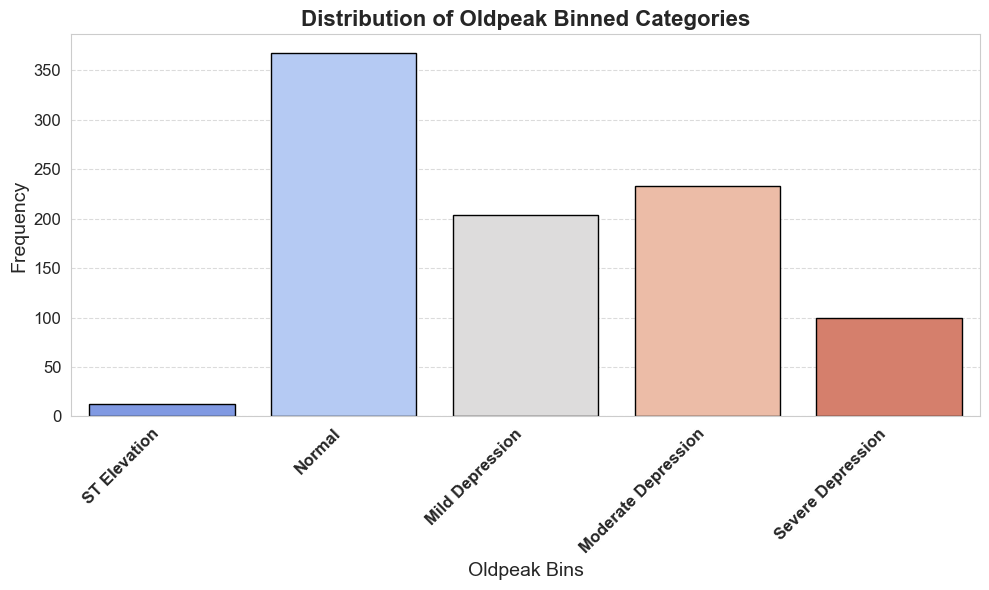

In [256]:
plot_binned_distribution(df=heart_failure_df, column='Oldpeak', title='Distribution of Oldpeak Binned Categories', 
                         xlabel='Oldpeak Bins', 
                         ylabel='Frequency')


### 4.5.2 Apply Binning for `Cholesterol`

Binning Based on cholesterol levels and medical guidelines:

1. Normal: Cholesterol levels < 200 mg/dL.
2. Borderline : Cholesterol levels 200–239 mg/dL.
3. High: Cholesterol levels ≥ 240 mg/dL

In [257]:
print(heart_failure_df['Cholesterol'].describe())


count    918.000000
mean     203.985158
std       95.922341
min       32.625000
25%      173.250000
50%      223.000000
75%      267.000000
max      407.625000
Name: Cholesterol, dtype: float64


In [258]:
heart_failure_df['Cholesterol'] = pd.cut(heart_failure_df['Cholesterol'], bins=[-np.inf, 200, 240, np.inf], labels=['Normal', 'Borderline', 'High'])

In [259]:
print(heart_failure_df['Cholesterol'].value_counts())


Cholesterol
High          355
Normal        322
Borderline    241
Name: count, dtype: int64


C:\Users\ALLAM\AppData\Local\Temp\ipykernel_17212\3561397813.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


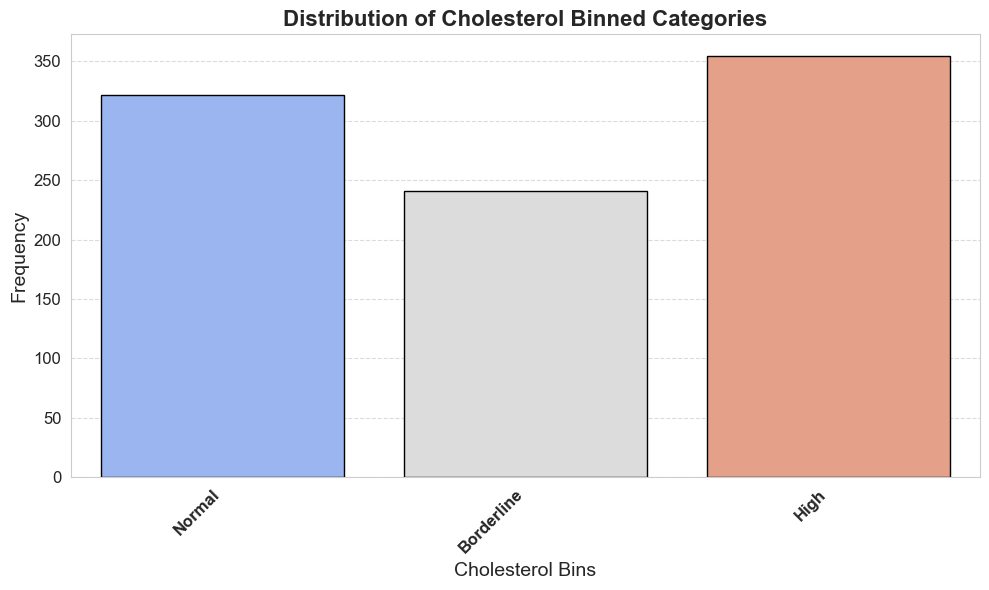

In [260]:
plot_binned_distribution(df=heart_failure_df, column='Cholesterol', title='Distribution of Cholesterol Binned Categories', xlabel='Cholesterol Bins', ylabel='Frequency')

## 5. ◆Feature extraction and selection after cleaning 

#### 5.1 Identifying and selecting significant variables for the model 

In [261]:
correlation_cleaned_matrix=heart_failure_df.corr(numeric_only=True)


In [262]:
plot_correlation_heatmap(correlation_cleaned_matrix)

##### 5.1.1 Create a mask for strong positive correlations

In [263]:
# Create a mask for strong positive correlations
positive_threshold = 0.8
positive_mask = correlation_cleaned_matrix.where((correlation_cleaned_matrix >= positive_threshold) & (correlation_cleaned_matrix < 1))

# Visualize the heatmap for strongly positive correlations
if positive_mask.isnull().all().all():
    print("No Strong positive correlations above the threshold (>= 0.8).")
else:
    visualize_mask_correlation_heatmap(correlation_cleaned_matrix, positive_mask)

No Strong positive correlations above the threshold (>= 0.8).


##### 5.1.2 Create a mask for strong negative correlations

In [264]:
# Create a mask for strong positive correlations
negative_threshold = -0.8
negative_mask = correlation_cleaned_matrix.where((correlation_cleaned_matrix <= negative_threshold) )

# Visualize the heatmap for strongly positive correlations
if negative_mask.isnull().all().all():
    print("No correlations meet the specified threshold.")
else:
    visualize_mask_correlation_heatmap(correlation_cleaned_matrix, negative_mask)

No correlations meet the specified threshold.


In [265]:
heart_failure_df

Age Sex ChestPainType  RestingBP Cholesterol  FastingBS RestingECG  \
0     40   M           ATA      140.0        High          0     Normal   
1     49   F           NAP      160.0      Normal          0     Normal   
2     37   M           ATA      130.0        High          0         ST   
3     48   F           ASY      138.0  Borderline          0     Normal   
4     54   M           NAP      150.0      Normal          0     Normal   
..   ...  ..           ...        ...         ...        ...        ...   
913   45   M            TA      110.0        High          0     Normal   
914   68   M           ASY      144.0      Normal          1     Normal   
915   57   M           ASY      130.0      Normal          0     Normal   
916   57   F           ATA      130.0  Borderline          0        LVH   
917   38   M           NAP      138.0      Normal          0     Normal   

     MaxHR ExerciseAngina              Oldpeak ST_Slope  HeartDisease  
0    172.0              N               Normal       Up             0  
1    156.0              N      Mild Depression     Flat             1  
2     98.0              N               Normal       Up             0  
3    108.0              Y  Moderate Depression     Flat             1  
4    122.0              N               Normal       Up             0  
..     ...            ...                  ...      ...           ...  
913  132.0              N  Moderate Depression     Flat             1  
914  141.0              N    Severe Depression     Flat             1  
915  115.0              Y  Moderate Depression     Flat             1  
916  174.0              N               Normal     Flat             1  
917  173.0              N               Normal       Up             0  

[918 rows x 12 columns]

##### 5.1.3 Chi- Square Test for Categorical Features with `HeartDisease`

In [266]:
def chi_square_feature_selection(data, target_column):
    results = []
    for col in data.select_dtypes(include=['object', 'category']).columns:
        if col != target_column:
            contingency_table = pd.crosstab(data[col], data[target_column])
            
            chi2, p, dof, expected = chi2_contingency(contingency_table)
            
            results.append({'Feature': col,'Chi2 Score': chi2,'p-value': p })

    results_df = pd.DataFrame(results).sort_values(by='Chi2 Score', ascending=False)

    plt.figure(figsize=(10, 6))
    plt.barh(results_df['Feature'], results_df['Chi2 Score'], color='skyblue')
    plt.title('Chi-Square Test Results for Categorical Features', fontsize=14)
    plt.xlabel('Chi2 Score', fontsize=12)
    plt.ylabel('Features', fontsize=12)
    plt.gca().invert_yaxis()
    plt.grid(axis='x')
    plt.show()
    return results_df


In [267]:
categorical_feature_chi_sqr = chi_square_feature_selection(data=heart_failure_df, target_column='HeartDisease')
print(categorical_feature_chi_sqr)

          Feature  Chi2 Score       p-value
6        ST_Slope  355.918443  5.167638e-78
1   ChestPainType  268.067239  8.083728e-58
4  ExerciseAngina  222.259383  2.907808e-50
5         Oldpeak  164.956602  1.263871e-34
0             Sex   84.145101  4.597617e-20
2     Cholesterol   26.438478  1.815338e-06
3      RestingECG   10.931469  4.229233e-03


### Numerical Features and Medical Context with `HeartDisease` :

1. `Age` (0.28):

- Context: Risk of heart disease increases with age.
- Importance: A key factor for predicting heart disease.

2. `RestingBP` (Resting Blood Pressure) (0.12):

- Context: High blood pressure is a major cause of heart problems.
- Importance: Helps identify risk from hypertension.

3. `FastingBS` (Fasting Blood Sugar) (0.27) :

- Context: High blood sugar signals diabetes, which increases heart disease risk.
- Importance: A critical metabolic predictor.

4. `MaxHR` (Maximum Heart Rate) (-0.40) :

- Context: Lower maximum heart rate can show heart issues, especially during exercise.
- Importance: A strong indicator of heart function.


### Categorical Features and Medical Context with `HeartDisease`:

1. `ST_Slope` (ECG Slope) :

- Context: The slope of the ST segment helps detect heart problems like ischemia. Flat or downsloping ST segments are warning signs.
- Importance: Very important for diagnosing heart issues.

2. `ChestPainType` : 

- Context: Different chest pain types (e.g., angina, non-anginal) indicate various heart conditions.
- Importance: Critical for understanding symptoms.

3. `ExerciseAngina` :

- Context: Chest pain during exercise shows stress on the heart and possible coronary artery disease.
- Importance: Highly relevant for heart function tests.

4. `Oldpeak` (ST Depression)  :

- Context: Measures heart stress during exercise and indicates poor blood flow to the heart.
- Importance: Strong diagnostic tool for heart issues.

5. `Sex` :

- Context: Males often face higher heart disease risks earlier in life than females.
- Importance: Useful for gender-based risk analysis.

6. `Cholesterol`:

- Context: High cholesterol can block arteries, leading to heart disease.
- Importance: Key factor for metabolic risk.

7. `RestingECG` (Resting ECG Results) :

- Context: Shows the heart's electrical activity and helps spot irregularities.
- Importance: Helpful but less critical than ST_Slope or ExerciseAngina.



### Selected Features for Modeling:

- Categorical Features (Based on Chi-Square Scores and Medical Context):

1. `ST_Slope`
2. `ChestPainType`
3. `ExerciseAngina`
4. `Oldpeak`
5. `Sex`
6. `Cholesterol`

Numerical Features (Based on Correlation and Medical Context):

1. `Age`
2. `MaxHR`
3. `FastingBS`
4. `RestingBP`

### Features to exclude in Modeling : 

1. `RestingECG`


In [268]:
heart_failure_df = heart_failure_df.drop(columns=['RestingECG'])

### 6 ◆ Normalization and Standardization




#### 6.1 Plotting QQ plot for numeric features 

In [269]:
features_to_be_normalized = heart_failure_df.loc[:,['Age','RestingBP', 'MaxHR']]


In [270]:
# Function to plot QQ plot to determine the distirbution of the data if it normally distirbuted or skewed 
def QQ_plotting(df, feature_names, figsize=(8, 6)):
    
    for col in feature_names:
        fig = plt.figure(figsize=figsize)
        ax = fig.add_subplot(111)
        sm.qqplot(df[col], line='s', ax=ax)
        ax.set_title(f'QQ Plot for {col}', fontsize=14, fontweight='bold')
        ax.set_xlabel('Theoretical Quantiles', fontsize=12)
        ax.set_ylabel('Sample Quantiles', fontsize=12)
        ax.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
        ax.tick_params(axis='both', which='major', labelsize=10)
        plt.tight_layout()
        plt.show()



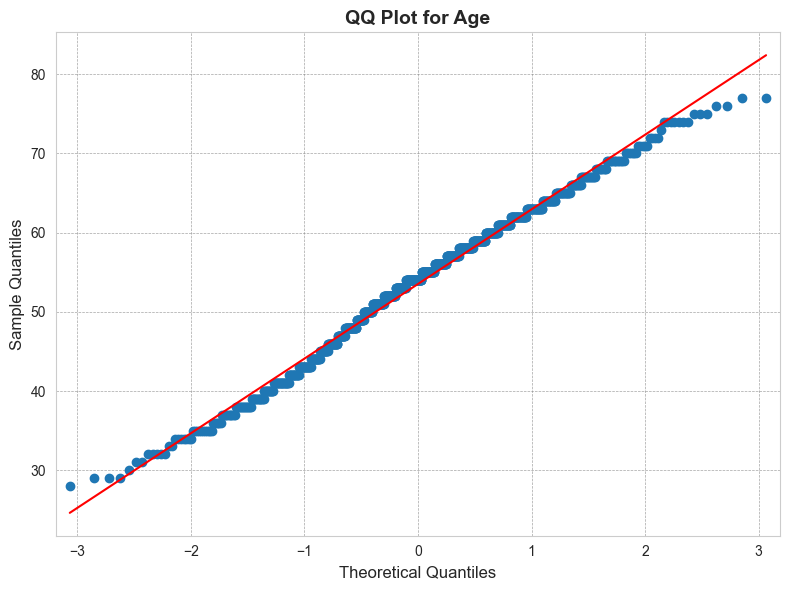

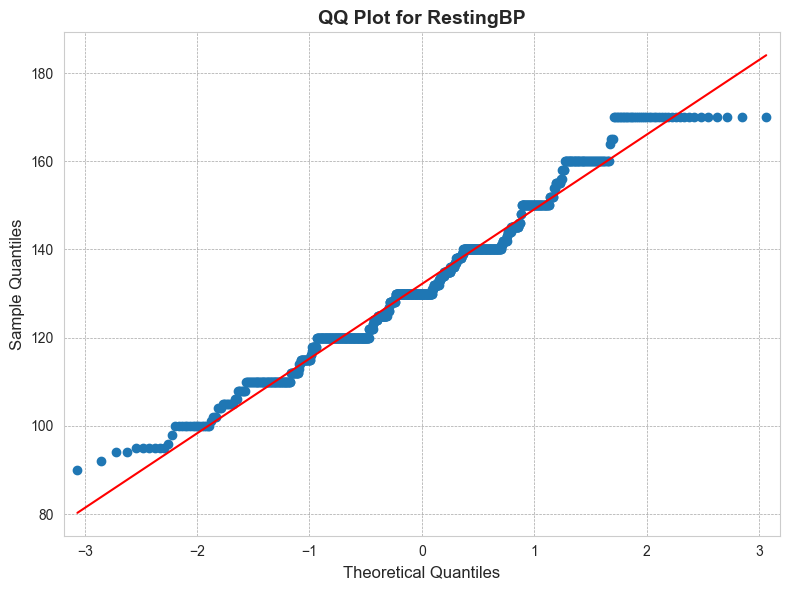

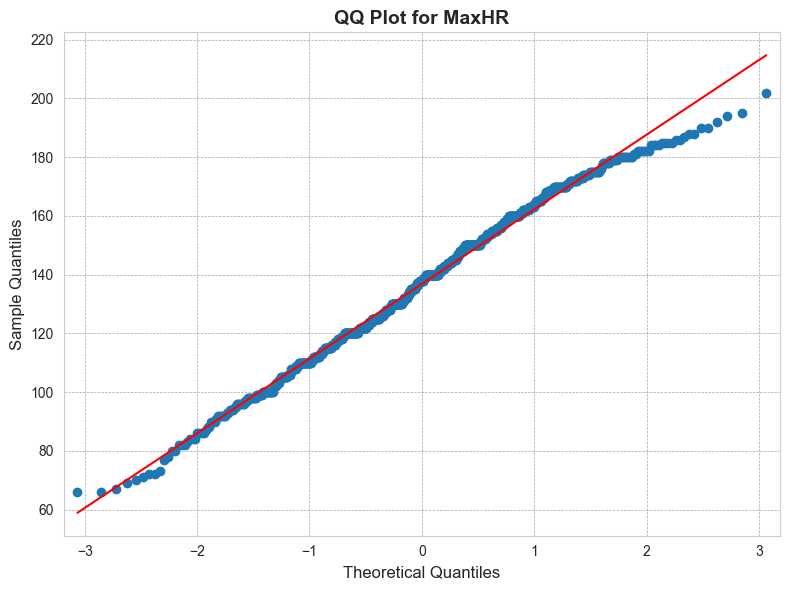

In [271]:
QQ_plotting(heart_failure_df,features_to_be_normalized)

### Choosing StandardScaler or MinMaxScaler for Each Feature

1. `Age` (QQ Plot 1):
   -  StandardScaler: Age is approximately normally distributed, as shown by the linear alignment with the QQ plot line. StandardScaler is ideal for features with normal or near-normal distributions.

2. `RestingBP` (QQ Plot 2):
   - StandardScaler: RestingBP shows a normal-like distribution with some deviations, making StandardScaler suitable to maintain its mean-centered properties.


3. `MaxHR` (QQ Plot 4):
   - StandardScaler: MaxHR has a nearly normal distribution. StandardScaler will effectively normalize it, centering it around zero with unit variance.


### Summary:
- StandardScaler: `Age`, `RestingBP`, `MaxHR` (approximately normal distributions) after Train Test Split to avoid data leakage .

### 7 ◆ Feature Encoding 


In [272]:
heart_failure_df.describe(include=['object','category'])

Sex ChestPainType Cholesterol ExerciseAngina Oldpeak ST_Slope
count   918           918         918            918     918      918
unique    2             4           3              2       5        3
top       M           ASY        High              N  Normal     Flat
freq    725           496         355            547     368      460

#### 7.1 Apply One Hot Encoding for Categrical Features 

In [273]:
def apply_one_hot_encoding(df, feature_name):
    one_hot_encoded = pd.get_dummies(df[feature_name], prefix=feature_name, drop_first=False).astype(int)
    df = pd.concat([df, one_hot_encoded], axis=1)
    df = df.drop(columns=[feature_name])
    
    return df

In [274]:
heart_failure_df = apply_one_hot_encoding(heart_failure_df,'Sex')

In [275]:
heart_failure_df = apply_one_hot_encoding(heart_failure_df,'ChestPainType')

In [276]:
heart_failure_df = apply_one_hot_encoding(heart_failure_df,'ExerciseAngina')

In [277]:
heart_failure_df = apply_one_hot_encoding(heart_failure_df,'ST_Slope')

#### 7.2 Apply One Hot Encoding for Binned Categorical Features `Oldpeak` & `Cholesterol`

In [278]:
heart_failure_df = apply_one_hot_encoding(heart_failure_df,'Oldpeak')

In [279]:
heart_failure_df = apply_one_hot_encoding(heart_failure_df,'Cholesterol')

In [280]:
heart_failure_df

Age  RestingBP  FastingBS  MaxHR  HeartDisease  Sex_F  Sex_M  \
0     40      140.0          0  172.0             0      0      1   
1     49      160.0          0  156.0             1      1      0   
2     37      130.0          0   98.0             0      0      1   
3     48      138.0          0  108.0             1      1      0   
4     54      150.0          0  122.0             0      0      1   
..   ...        ...        ...    ...           ...    ...    ...   
913   45      110.0          0  132.0             1      0      1   
914   68      144.0          1  141.0             1      0      1   
915   57      130.0          0  115.0             1      0      1   
916   57      130.0          0  174.0             1      1      0   
917   38      138.0          0  173.0             0      0      1   

     ChestPainType_ASY  ChestPainType_ATA  ChestPainType_NAP  ...  \
0                    0                  1                  0  ...   
1                    0                  0                  1  ...   
2                    0                  1                  0  ...   
3                    1                  0                  0  ...   
4                    0                  0                  1  ...   
..                 ...                ...                ...  ...   
913                  0                  0                  0  ...   
914                  1                  0                  0  ...   
915                  1                  0                  0  ...   
916                  0                  1                  0  ...   
917                  0                  0                  1  ...   

     ST_Slope_Flat  ST_Slope_Up  Oldpeak_ST Elevation  Oldpeak_Normal  \
0                0            1                     0               1   
1                1            0                     0               0   
2                0            1                     0               1   
3                1            0                     0               0   
4                0            1                     0               1   
..             ...          ...                   ...             ...   
913              1            0                     0               0   
914              1            0                     0               0   
915              1            0                     0               0   
916              1            0                     0               1   
917              0            1                     0               1   

     Oldpeak_Mild Depression  Oldpeak_Moderate Depression  \
0                          0                            0   
1                          1                            0   
2                          0                            0   
3                          0                            1   
4                          0                            0   
..                       ...                          ...   
913                        0                            1   
914                        0                            0   
915                        0                            1   
916                        0                            0   
917                        0                            0   

     Oldpeak_Severe Depression  Cholesterol_Normal  Cholesterol_Borderline  \
0                            0                   0                       0   
1                            0                   1                       0   
2                            0                   0                       0   
3                            0                   0                       1   
4                            0                   1                       0   
..                         ...                 ...                     ...   
913                          0                   0                       0   
914                          1                   1                       0   
915                          0     

### 8 ◆  Split the Data into training and testing sets and Scaling (Normalizing) Train and Test Data :


In [281]:
X = heart_failure_df.drop(columns=['HeartDisease'])
y = heart_failure_df['HeartDisease']


### 8.1 Check the distribution of the target variable `HeartDisease`


In [282]:
target_distribution = heart_failure_df['HeartDisease'].value_counts(normalize=True) * 100
print(target_distribution)

HeartDisease
1    55.337691
0    44.662309
Name: proportion, dtype: float64


- The class distribution is slightly imbalanced. While the imbalance is not extreme, maintaining this proportion in both training and testing sets ensures consistent evaluation.
- Without stratify=y, a random split might result in different proportions of 1s and 0s in the training and testing sets, potentially introducing bias into your model or evaluation metrics.

In [283]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42,stratify=y)

In [284]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

### 9 ◆ Applying Dimensionality Reduction (PCA for Classification)

#### 9.1 Justification for using PCA in Dimensionality Reduction :
PCA is a dimensionality reduction technique that transforms high-dimensional data into a lower-dimensional space while retaining as much variance as possible. For classification tasks, PCA can:

1. Reduce Overfitting: By removing noise and redundant features.
2. Improve Model Performance: By focusing on the most informative components.
3. Enhance Computational Efficiency: By reducing the number of features for faster training.

#### 9.2 Steps for PCA Analysis:


##### We will have two PCA , one wtih 2 components in order to use it in Clustering and other one which retain 0.95 vairance of data to be used in models 

##### 9.3 Dimensionality reduction with PCA (2 components):


In [380]:
pca_2d = PCA(n_components=2)
X_train_pca_2d = pca_2d.fit_transform(X_train_scaled)
X_test_pca_2d = pca_2d.fit_transform(X_test_scaled)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_train_pca_2d[:, 0], X_train_pca_2d[:, 1], c=y_train, cmap='viridis', edgecolor='k', s=50)
plt.title('2D PCA Visualization (Training Data)', fontsize=14)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.colorbar(scatter, label='Target ( HeartDisease)')
plt.grid()
plt.show()



##### 9.4 Dimensionality reduction with PCA retaining 95% variance


In [373]:
def plot_cumulative_variance(pca_model, threshold=0.95):

    explained_variance_ratio = pca_model.explained_variance_ratio_
    cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
    n_components = np.argmax(cumulative_variance_ratio >= threshold) + 1
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='-', label='Cumulative Explained Variance', color='blue')
    plt.axvline(x=n_components, color='red', linestyle='--', label=f'{n_components} Components')
    plt.axhline(y=threshold, color='green', linestyle='--', label=f'{threshold*100:.0f}% Variance Threshold')
    plt.xlabel('Number of Principal Components', fontsize=12)
    plt.ylabel('Cumulative Explained Variance', fontsize=12)
    plt.title('Cumulative Explained Variance by Principal Components', fontsize=14)
    plt.legend(loc='best')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    print(f"Number of components explaining {threshold*100:.0f}% variance: {n_components}")

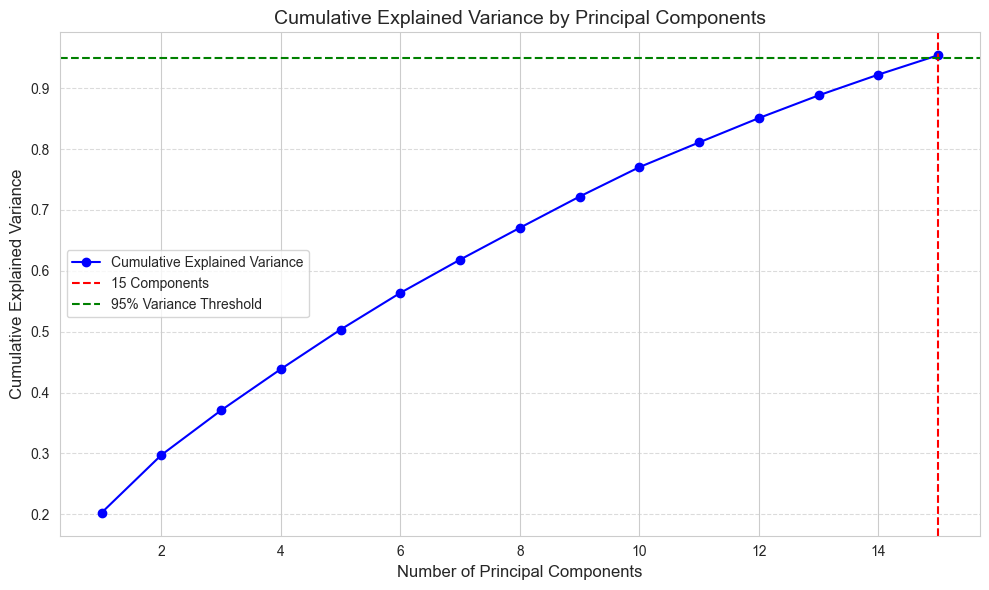

Number of components explaining 95% variance: 15


In [374]:
pca_full = PCA(n_components=0.95) 
X_train_pca_full = pca_full.fit_transform(X_train_scaled)

X_test_pca_full = pca_full.transform(X_test_scaled)


plot_cumulative_variance(pca_full)


## 10. ◆ Applying unsupervised learning (Clustering) .

### 10.1 Kmeans Clustering :

#### 10.1.1 Using the elbow method to find the optimal number of Clusters for Kmeans

In [375]:
def kmeans_elbow_eval(X) :
    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)
    plt.plot(range(1, 11), wcss)
    plt.title('The Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()

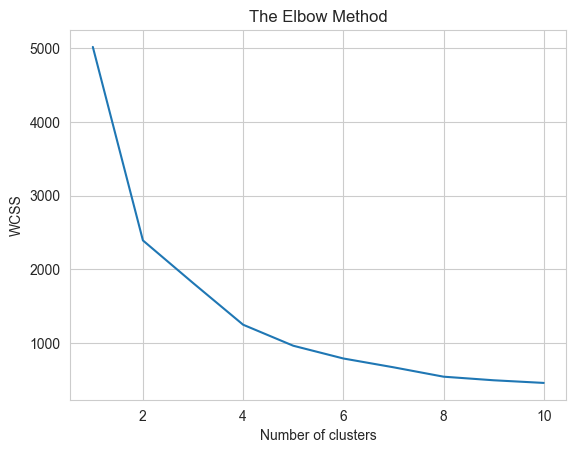

In [358]:
kmeans_elbow_eval(X_train_pca_2d)

According to Elbow Method , we found that 

#### 10.1.2 Defining Dunn_Index Function to be used to find the optimal number of Clusters for Kmeans

In [289]:

def dunn_index(X, labels, centers):
    unique_labels = np.unique(labels)
    distances = cdist(X, centers, metric='euclidean')

    # Calculate minimum inter-cluster distance
    min_intercluster_dist = float('inf')
    for i in range(len(centers)):
        for j in range(i + 1, len(centers)):
            dist = np.linalg.norm(centers[i] - centers[j])
            min_intercluster_dist = min(min_intercluster_dist, dist)

    # Calculate maximum intra-cluster distance
    max_intracluster_dist = 0
    for label in unique_labels:
        cluster_points = X[labels == label]
        for point in cluster_points:
            dist = np.linalg.norm(point - centers[label])
            max_intracluster_dist = max(max_intracluster_dist, dist)

    return min_intercluster_dist / max_intracluster_dist

#### 10.1.2 Defining `evaluate_kmeans` function based on  Dunn Index and Davies_Boudlin Index

In [290]:
def evaluate_kmeans_dunn_davis(X, max_k=10):
    wcss = []
    dunn_indices = []
    davies_bouldin_indices = []

    for k in range(2, max_k + 1):
        kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
        labels = kmeans.fit_predict(X)
        centers = kmeans.cluster_centers_
        dunn_indices.append(dunn_index(X, labels, centers))
        davies_bouldin_indices.append(davies_bouldin_score(X, labels))

    best_k_dunn = dunn_indices.index(max(dunn_indices)) + 2
    best_k_db = davies_bouldin_indices.index(min(davies_bouldin_indices)) +2


    # Dunn Index
    plt.figure(figsize=(10, 6))
    plt.plot(range(2, max_k + 1), dunn_indices, marker='o', linestyle='--', color='g', label="Dunn Index")
    plt.scatter(best_k_dunn, dunn_indices[best_k_dunn - 2], color='red', label=f'Best K (Dunn): {best_k_dunn}')
    plt.title('Dunn Index vs K', fontsize=14)
    plt.xlabel('Number of Clusters (K)', fontsize=12)
    plt.ylabel('Dunn Index', fontsize=12)
    plt.grid()
    plt.legend()
    plt.show()

    # Davies-Bouldin Index
    plt.figure(figsize=(10, 6))
    plt.plot(range(2, max_k + 1), davies_bouldin_indices, marker='o', linestyle='--', color='r', label="Davies-Bouldin Index")
    plt.scatter(best_k_db, davies_bouldin_indices[best_k_db - 2], color='blue', label=f'Best K (DB): {best_k_db}')
    plt.title('Davies-Bouldin Index vs K', fontsize=14)
    plt.xlabel('Number of Clusters (K)', fontsize=12)
    plt.ylabel('Davies-Bouldin Index', fontsize=12)
    plt.grid()
    plt.legend()
    plt.show()

    # Print results
    # print(f"Best K based on Elbow Method: {elbow_best_k}")
    print(f"Best K based on Dunn Index: {best_k_dunn}")
    print(f"Best K based on Davies-Bouldin Index: {best_k_db}")


In [357]:
evaluate_kmeans_dunn_davis(X_train_pca_2d, max_k=10)


Best K based on Dunn Index: 2
Best K based on Davies-Bouldin Index: 6


#### 10.1.3 Defining `evaluate_kmeans_with_silhouette` function based on best K based on Silhouette Score

In [359]:
def evaluate_kmeans_with_silhouette(X, max_k=10):
    silhouette_scores = []

    for k in range(2, max_k + 1):  # Silhouette score is not defined for k=1
        kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
        labels = kmeans.fit_predict(X)
        silhouette_avg = silhouette_score(X, labels)
        silhouette_scores.append(silhouette_avg)

    plt.figure(figsize=(10, 6))
    plt.plot(range(2, max_k + 1), silhouette_scores, marker='o', linestyle='--', color='b', label="Silhouette Score")
    best_k_silhouette = np.argmax(silhouette_scores) + 2  # +2 because k starts from 2
    plt.scatter(best_k_silhouette, silhouette_scores[best_k_silhouette - 2], color='red', label=f'Best K: {best_k_silhouette}')
    plt.title('Silhouette Score vs Number of Clusters (K)')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Silhouette Score')
    plt.legend()
    plt.grid()
    plt.show()

    # Print best K
    print(f"Best K based on Silhouette Score: {best_k_silhouette}")

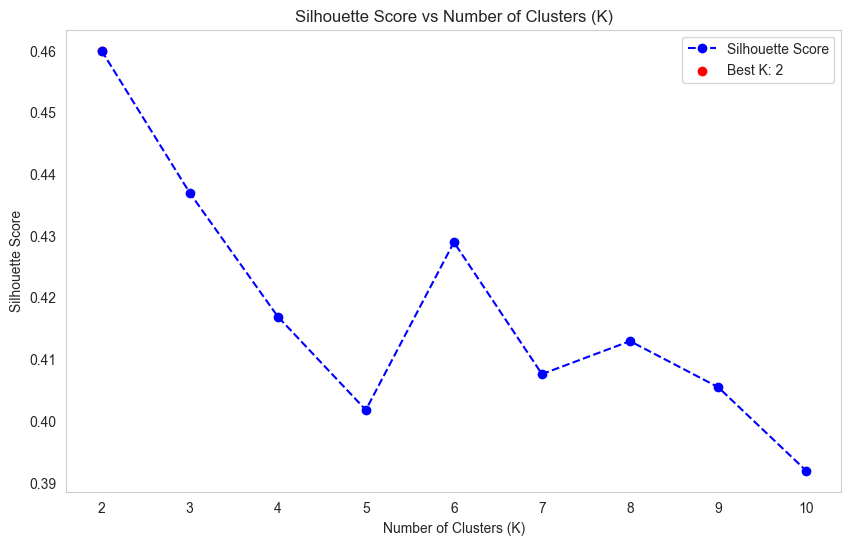

Best K based on Silhouette Score: 2


In [360]:
evaluate_kmeans_with_silhouette(X_train_pca_2d)

In [361]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_train_pca_2d)
clusters = kmeans.fit_predict(X_train_pca_2d)

centers = kmeans.cluster_centers_


In [362]:
# Evaluate clustering using Silhouette Score 
sil_score = silhouette_score(X_train_pca_2d, clusters)

print("Clustering Metrics:")
print(f"Silhouette Score: {sil_score:.2f}") 


Clustering Metrics:
Silhouette Score: 0.46


In [363]:
def plot_clusters_with_centroids(X, clusters, centers, n_clusters):
    plt.figure(figsize=(10, 6))

    colors = plt.colormaps.get_cmap('viridis')
    for cluster in range(n_clusters):
        plt.scatter(X[clusters == cluster, 0], X[clusters == cluster, 1], s=100, c=[colors(cluster / n_clusters)], label=f'Cluster {cluster + 1}', edgecolor='k', alpha=0.7)
    plt.scatter(centers[:, 0], centers[:, 1], s=300, c='green', edgecolor='k', marker='*', label='Centroids', alpha=1.0)

    plt.title('KMeans Clustering Visualization (2D PCA)', fontsize=16, fontweight='bold')
    plt.xlabel('Principal Component 1', fontsize=12)
    plt.ylabel('Principal Component 2', fontsize=12)
    plt.legend(fontsize=12, loc='upper right')
    plt.grid(True, linestyle='--', linewidth=0.7)
    plt.tight_layout()
    plt.show()
 




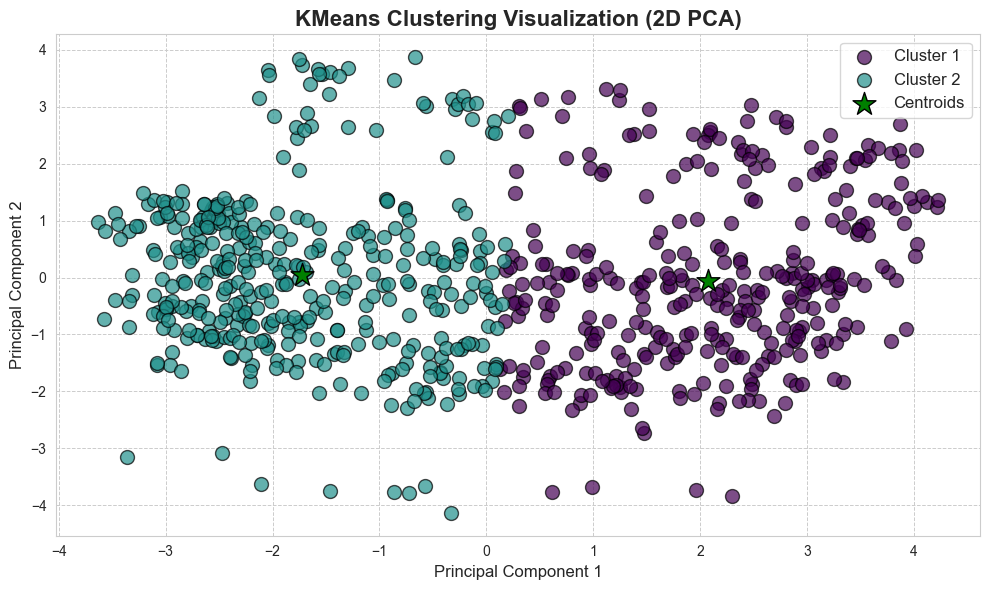

In [364]:
plot_clusters_with_centroids(X_train_pca_2d, clusters, centers, 2)


### 6.3 Hierarchical Clustering

#### 6.3.1 Using the dendrogram to find the optimal number of clusters

In [298]:
def evaluate_hierarchical_clustering(X, max_clusters=10, method='ward'):
    silhouette_scores = []
    davies_bouldin_scores = []
    dunn_indices = []

    # Step 1: Create Dendrogram for Visualization
    plt.figure(figsize=(10, 6))
    dendrogram = sch.dendrogram(sch.linkage(X, method=method))
    plt.title('Dendrogram with Cut-off Threshold', fontsize=14)
    plt.xlabel('Data Points (Cluster Indices)', fontsize=12)
    plt.ylabel('Euclidean Distance', fontsize=12)
    plt.axhline(y=40, color='red', linestyle='--', label='Cut-off Threshold')
    plt.legend()
    plt.grid()
    plt.show()

    for num_clusters in range(2, max_clusters + 1):
        hc_model = AgglomerativeClustering(n_clusters=num_clusters, linkage=method)
        labels = hc_model.fit_predict(X)

        # Calculate Silhouette Score
        sil_score = silhouette_score(X, labels)
        silhouette_scores.append(sil_score)

        # Calculate Davies-Bouldin Index
        db_score = davies_bouldin_score(X, labels)
        davies_bouldin_scores.append(db_score)

        # Calculate Dunn Index
        centers = np.array([X[labels == l].mean(axis=0) for l in np.unique(labels)])
        dunn_indices.append(dunn_index(X, labels, centers))

    # Step 3: Determine Best Number of Clusters
    best_k_silhouette = silhouette_scores.index(max(silhouette_scores)) + 2
    best_k_davies_bouldin = davies_bouldin_scores.index(min(davies_bouldin_scores)) + 2
    best_k_dunn = dunn_indices.index(max(dunn_indices)) + 2

    # Step 4: Visualize the Scores
    plt.figure(figsize=(10, 6))
    plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o', linestyle='--', label='Silhouette Score')
    plt.scatter(best_k_silhouette, max(silhouette_scores), color='red', label=f'Best K (Silhouette): {best_k_silhouette}')
    plt.title('Silhouette Score vs Number of Clusters', fontsize=14)
    plt.xlabel('Number of Clusters (K)', fontsize=12)
    plt.ylabel('Silhouette Score', fontsize=12)
    plt.legend()
    plt.grid()
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.plot(range(2, max_clusters + 1), davies_bouldin_scores, marker='o', linestyle='--', color='r', label='Davies-Bouldin Index')
    plt.scatter(best_k_davies_bouldin, min(davies_bouldin_scores), color='blue', label=f'Best K (DB): {best_k_davies_bouldin}')
    plt.title('Davies-Bouldin Index vs Number of Clusters', fontsize=14)
    plt.xlabel('Number of Clusters (K)', fontsize=12)
    plt.ylabel('Davies-Bouldin Index', fontsize=12)
    plt.legend()
    plt.grid()
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.plot(range(2, max_clusters + 1), dunn_indices, marker='o', linestyle='--', color='g', label='Dunn Index')
    plt.scatter(best_k_dunn, max(dunn_indices), color='red', label=f'Best K (Dunn): {best_k_dunn}')
    plt.title('Dunn Index vs Number of Clusters', fontsize=14)
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Dunn Index')
    plt.legend()
    plt.grid()
    plt.show()

    # Step 5: Print Results
    print(f"Best Number of Clusters Based on Silhouette Score: {best_k_silhouette}")
    print(f"Best Number of Clusters Based on Davies-Bouldin Index: {best_k_davies_bouldin}")
    print(f"Best Number of Clusters Based on Dunn Index: {best_k_dunn}")


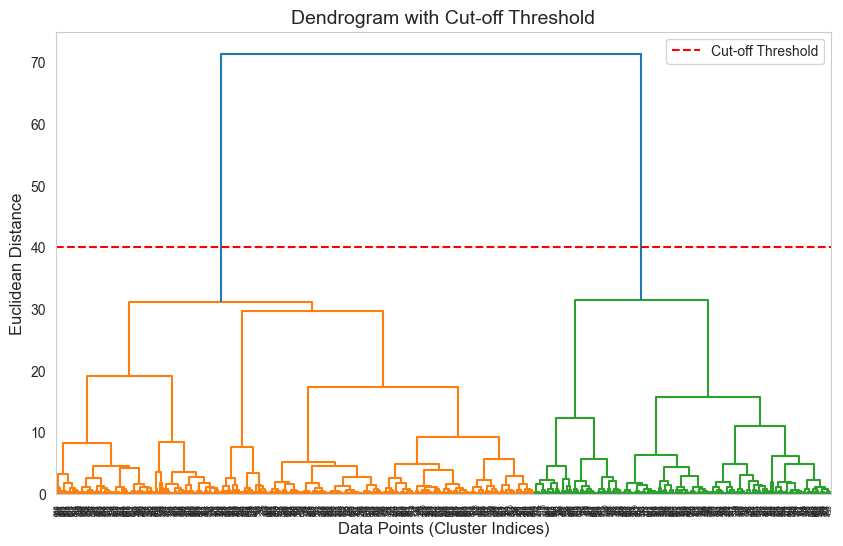

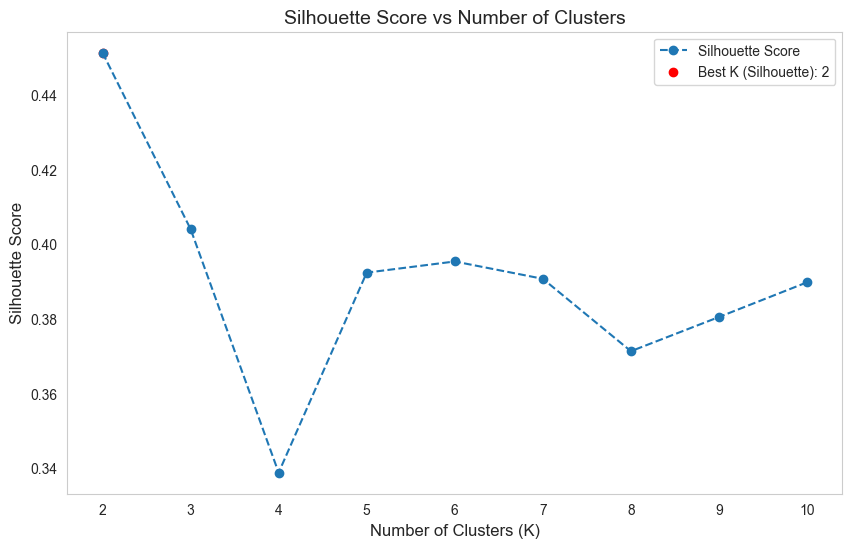

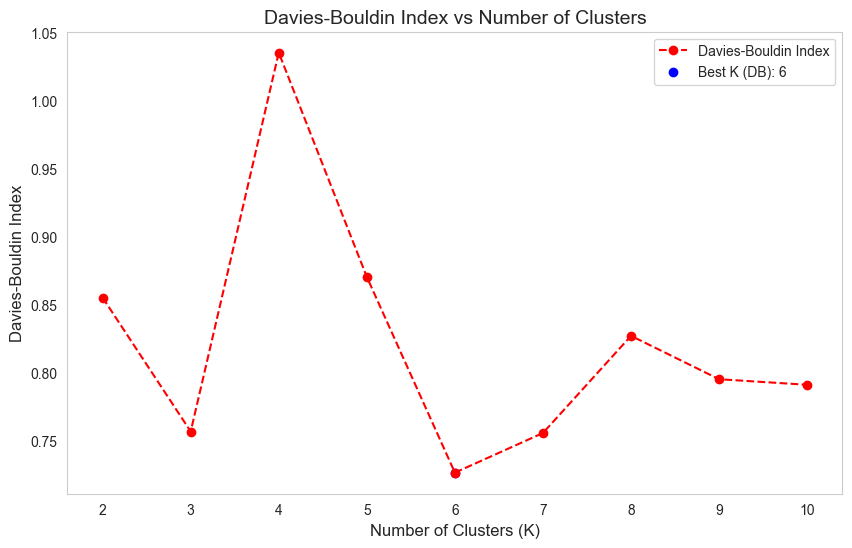

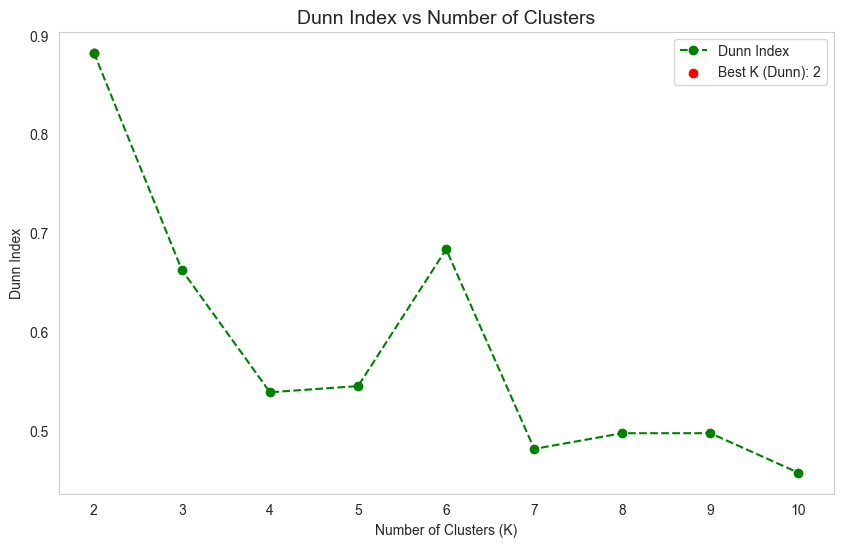

Best Number of Clusters Based on Silhouette Score: 2
Best Number of Clusters Based on Davies-Bouldin Index: 6
Best Number of Clusters Based on Dunn Index: 2


In [299]:
evaluate_hierarchical_clustering(X_train_pca_2d, max_clusters=10, method='ward')


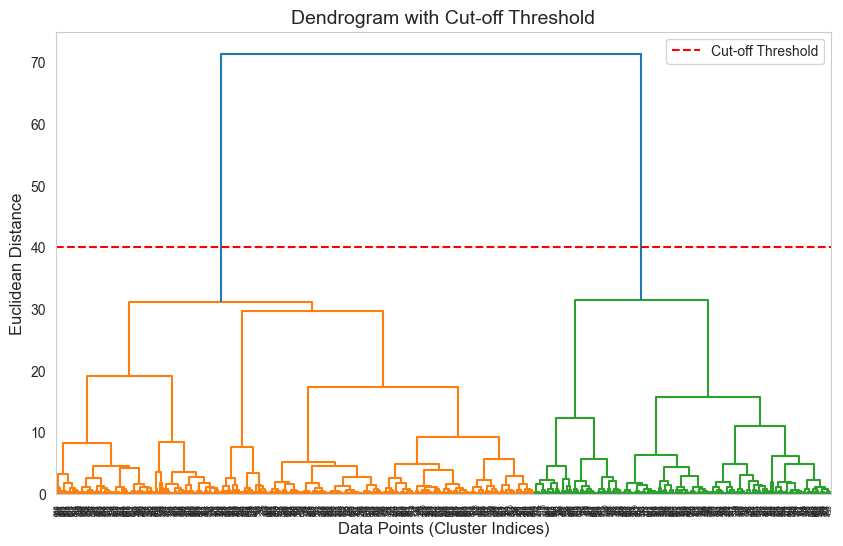

In [300]:
plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(sch.linkage(X_train_pca_2d, method="ward"))
plt.title('Dendrogram with Cut-off Threshold', fontsize=14)
plt.xlabel('Data Points (Cluster Indices)', fontsize=12)
plt.ylabel('Euclidean Distance', fontsize=12)
plt.axhline(y=40, color='red', linestyle='--', label='Cut-off Threshold')
plt.legend()
plt.grid()
plt.show()

In [301]:

num_clusters = 2
hc_model = AgglomerativeClustering(n_clusters = num_clusters, linkage = 'ward')
hc_clusters = hc_model.fit_predict(X_train_pca_2d)





Silhouette Score: 0.46


In [ ]:
sil_score = silhouette_score(X_train_pca_2d, clusters)

print(f"Silhouette Score: {sil_score:.2f}")

In [365]:
def plot_Hierarchical_clusters(data, clusters, num_clusters, title="Hierarchical Clustering Visualization"):
    plt.figure(figsize=(10, 7))
    colors = plt.cm.get_cmap('tab10', num_clusters)

    for cluster_id in range(num_clusters):
        cluster_points = data[clusters == cluster_id]
        plt.scatter(
            cluster_points[:, 0], cluster_points[:, 1],
            label=f"Cluster {cluster_id + 1}",
            alpha=0.7,
            s=50,
            color=colors(cluster_id)
        )

    plt.title(title, fontsize=16)
    plt.xlabel("Principal Component 1", fontsize=12)
    plt.ylabel("Principal Component 2", fontsize=12)
    plt.legend(title="Clusters", fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()




In [366]:
plot_Hierarchical_clusters(X_train_pca_2d, hc_clusters, num_clusters)


C:\Users\ALLAM\AppData\Local\Temp\ipykernel_17212\2118898501.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', num_clusters)


# 11. Applying Classification:


#### 11.1 Defining Function `evaluate_classification_model` to evaluate the Models based on :

1. Accuracy.
2. Precision.
3. Recall. 
4. F1-Score.
5. The Classification Report (All).
6. Confusion Matrix Heatmap.
7. ROC Curve

In [302]:


def evaluate_classification_model(model, X_test, y_test, model_name="Model"):

    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    cm = confusion_matrix(y_test, y_pred)
    
    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision_b = precision_score(y_test, y_pred, average="binary")
    recall_b = recall_score(y_test, y_pred, average="binary")
    f1_b = f1_score(y_test, y_pred, average="binary")

    precision = precision_score(y_test, y_pred, average="weighted")
    recall = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")
    
    metrics = {
        "Model": model_name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision (Binary)": precision_score(y_test, y_pred, average="binary"),
        "Recall (Binary)": recall_score(y_test, y_pred, average="binary"),
        "F1-Score (Binary)": f1_score(y_test, y_pred, average="binary"),
        "Precision (Weighted)": precision_score(y_test, y_pred, average="weighted"),
        "Recall (Weighted)": recall_score(y_test, y_pred, average="weighted"),
        "F1-Score (Weighted)": f1_score(y_test, y_pred, average="weighted")
    }
    print(f"Evaluation Report for {model_name}:")
    print(f"Accuracy : {accuracy:.2f}")
    print(f"Precision(Binary): {precision_b:.2f}")
    print(f"Recall(Binary): {recall_b:.2f}")
    print(f"F1-Score(Binary): {f1_b:.2f}")
    print(f"Precision(Weighted): {precision:.2f}")
    print(f"Recall(Weighted): {recall:.2f}")
    print(f"F1-Score(Weighted): {f1:.2f}")
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.title(f"{model_name} - Confusion Matrix", fontsize=16)
    plt.xlabel("Predicted Label", fontsize=12)
    plt.ylabel("True Label", fontsize=12)
    plt.show()
    
    report = classification_report(y_test, y_pred, output_dict=True)
    categories = list(report.keys())[:-3]  
    precision_scores = [report[cat]['precision'] for cat in categories]
    recall_scores = [report[cat]['recall'] for cat in categories]
    f1_scores = [report[cat]['f1-score'] for cat in categories]


    # Plot ROC Curve (Binary Classification Only)
    if len(np.unique(y_test)) == 2 and y_prob is not None:
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='blue', lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
        plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
        plt.title(f"{model_name} - ROC Curve", fontsize=16)
        plt.xlabel("False Positive Rate", fontsize=12)
        plt.ylabel("True Positive Rate", fontsize=12)
        plt.legend(loc="lower right")
        plt.grid()
        plt.show()
    return metrics




## 11.2 Logistic Regression


In [320]:
def logistic_regression_model(X,X_test,y_train,y_test):
    classifier = LogisticRegression(random_state=42)  
    classifier.fit(X, y_train)
    evaluate_classification_model(classifier, X_test, y_test, model_name="Logistic Regression")

### 11.2.1  Without PCA


Evaluation Report for Logistic Regression:
Accuracy : 0.90
Precision(Binary): 0.92
Recall(Binary): 0.89
F1-Score(Binary): 0.91
Precision(Weighted): 0.90
Recall(Weighted): 0.90
F1-Score(Weighted): 0.90

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.90      0.89        82
           1       0.92      0.89      0.91       102

    accuracy                           0.90       184
   macro avg       0.89      0.90      0.90       184
weighted avg       0.90      0.90      0.90       184



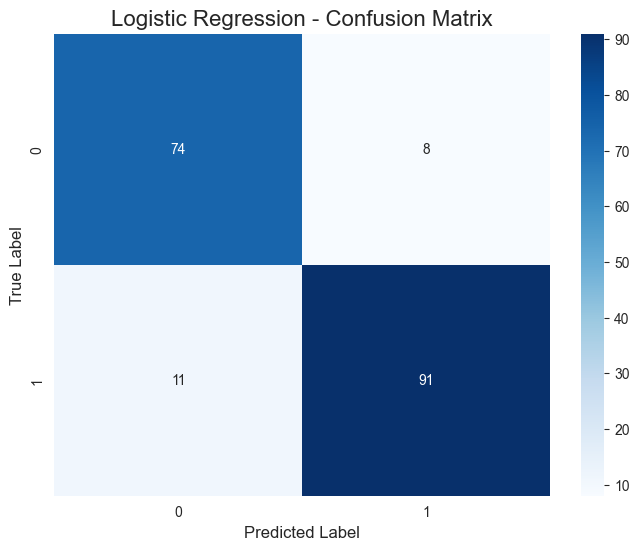

In [321]:

logistic_regression_model(X_train_scaled,X_test_scaled,y_train,y_test)



### 11.2.2 With PCA


Evaluation Report for Logistic Regression:
Accuracy : 0.90
Precision(Binary): 0.90
Recall(Binary): 0.91
F1-Score(Binary): 0.91
Precision(Weighted): 0.90
Recall(Weighted): 0.90
F1-Score(Weighted): 0.90

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.88      0.88        82
           1       0.90      0.91      0.91       102

    accuracy                           0.90       184
   macro avg       0.90      0.89      0.90       184
weighted avg       0.90      0.90      0.90       184



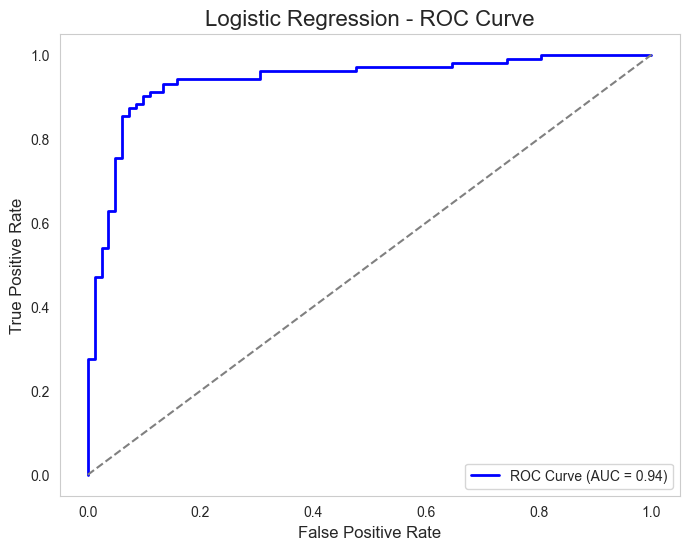

In [322]:
logistic_regression_model(X_train_pca_full,X_test_pca_full,y_train,y_test)


## 11.3 Random Forest Classifier


In [315]:
def Random_Forest_Model(X, X_test, y_train,y_test):
    classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
    classifier.fit(X, y_train)
    evaluate_classification_model(classifier, X_test, y_test, model_name="Random Forest Classifier")

### 11.3.1 Without PCA


Evaluation Report for Random Forest Classifier:
Accuracy : 0.84
Precision(Binary): 0.88
Recall(Binary): 0.83
F1-Score(Binary): 0.85
Precision(Weighted): 0.84
Recall(Weighted): 0.84
F1-Score(Weighted): 0.84

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.85      0.83        82
           1       0.88      0.83      0.85       102

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



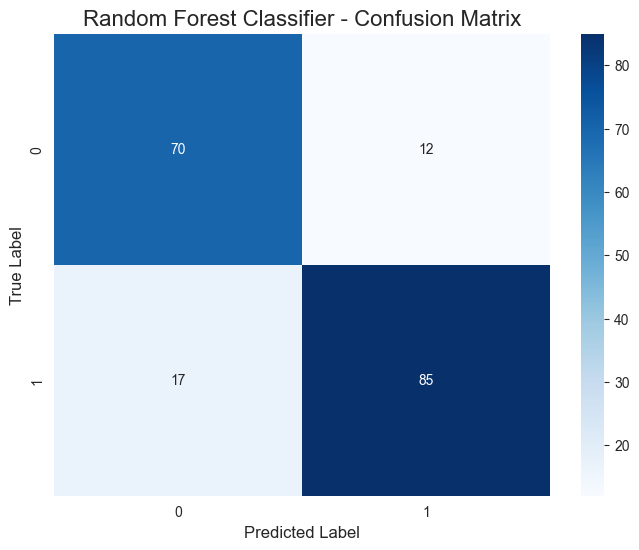

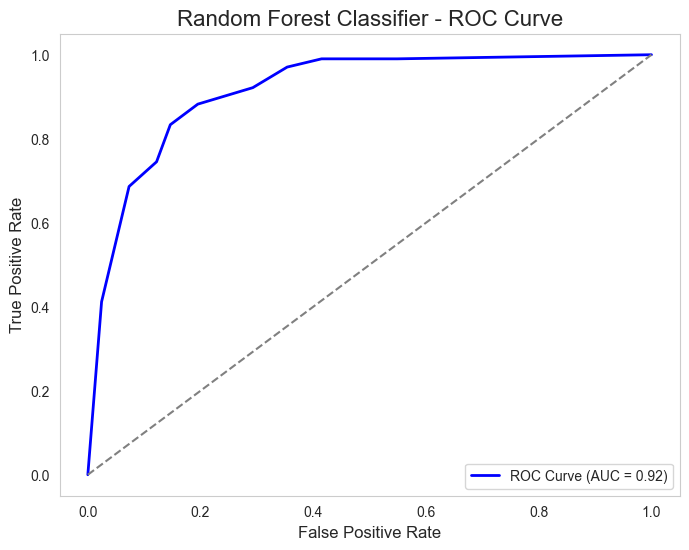

In [316]:
Random_Forest_Model(X_train_scaled,X_test_scaled,y_train,y_test)


### 11.3.2 With PCA


Evaluation Report for Random Forest Classifier:
Accuracy : 0.87
Precision(Binary): 0.87
Recall(Binary): 0.90
F1-Score(Binary): 0.88
Precision(Weighted): 0.87
Recall(Weighted): 0.87
F1-Score(Weighted): 0.87

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.83      0.85        82
           1       0.87      0.90      0.88       102

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



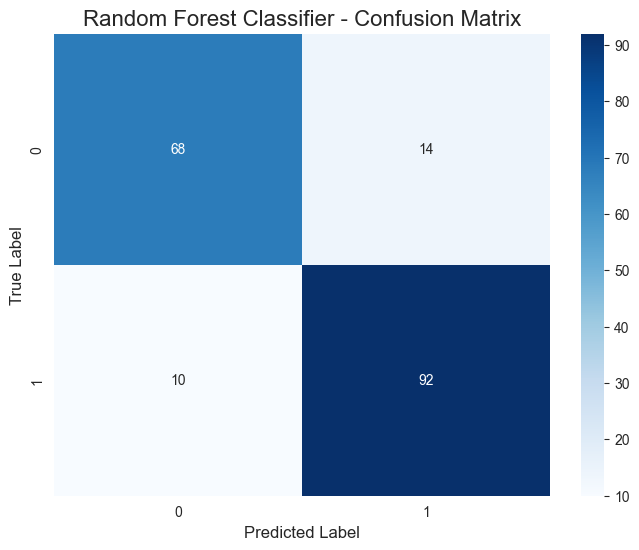

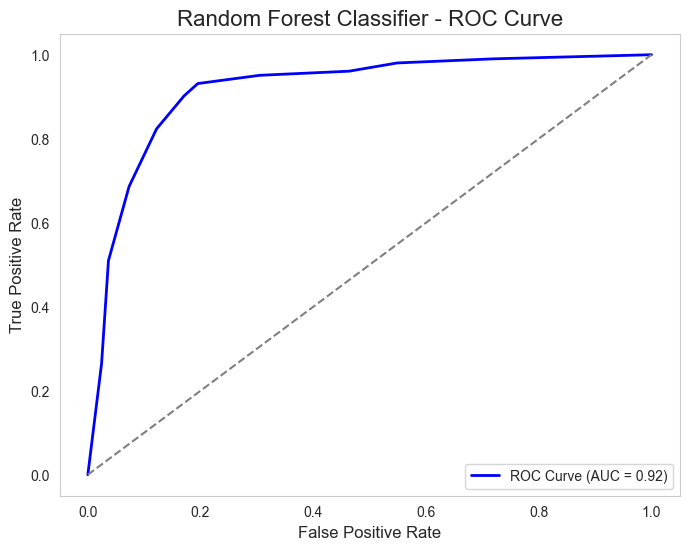

In [317]:
Random_Forest_Model(X_train_pca_full,X_test_pca_full,y_train,y_test)


## 11.4 Support Vector Machine


In [309]:
def svc_model(X, X_test, y_train,y_test):
    
    svc_model = SVC(kernel='linear', probability=True)
    svc_model.fit(X, y_train)

    evaluate_classification_model(svc_model, X_test, y_test, model_name="SVC")

### 11.4.1 Without PCA


Evaluation Report for SVC:
Accuracy : 0.90
Precision(Binary): 0.91
Recall(Binary): 0.90
F1-Score(Binary): 0.91
Precision(Weighted): 0.90
Recall(Weighted): 0.90
F1-Score(Weighted): 0.90

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.89      0.88        82
           1       0.91      0.90      0.91       102

    accuracy                           0.90       184
   macro avg       0.90      0.90      0.90       184
weighted avg       0.90      0.90      0.90       184



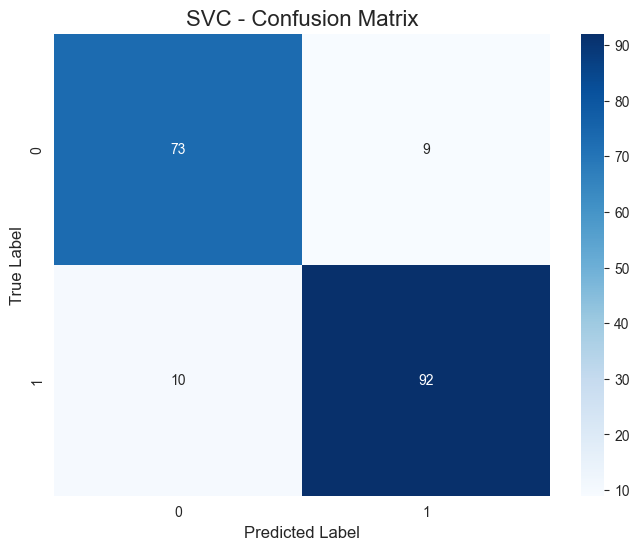

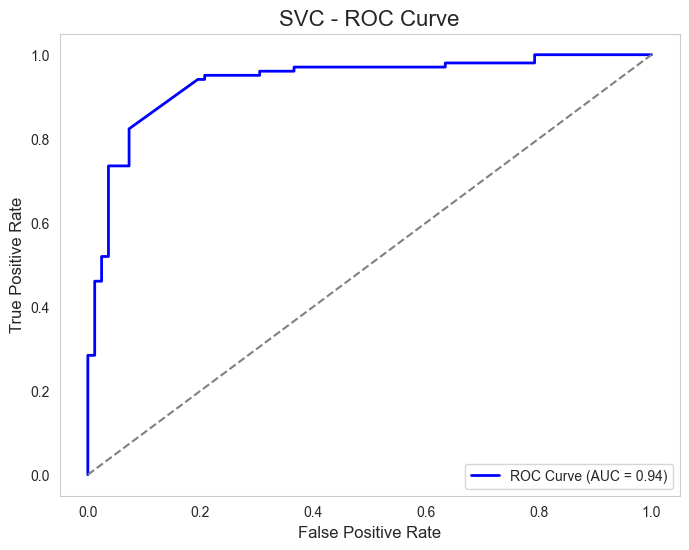

In [318]:
svc_model(X_train_scaled, X_test_scaled, y_train,y_test)

### 7.3.2 With PCA


Evaluation Report for SVC:
Accuracy : 0.90
Precision(Binary): 0.91
Recall(Binary): 0.91
F1-Score(Binary): 0.91
Precision(Weighted): 0.90
Recall(Weighted): 0.90
F1-Score(Weighted): 0.90

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89        82
           1       0.91      0.91      0.91       102

    accuracy                           0.90       184
   macro avg       0.90      0.90      0.90       184
weighted avg       0.90      0.90      0.90       184



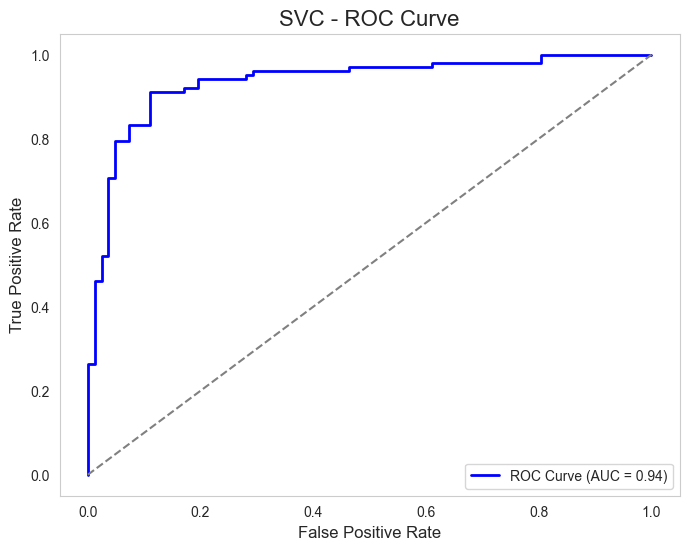

In [319]:
svc_model(X_train_pca_full, X_test_pca_full, y_train,y_test)

### Comparison between Models Functions Based on Accuracy , Recall , Precision , F1 Score and ROC Curve

In [341]:


def classification_metrics(model, X_test, y_test, model_name="Model"):

    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    cm = confusion_matrix(y_test, y_pred)
    
    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision_b = precision_score(y_test, y_pred, average="binary")
    recall_b = recall_score(y_test, y_pred, average="binary")
    f1_b = f1_score(y_test, y_pred, average="binary")

    precision = precision_score(y_test, y_pred, average="weighted")
    recall = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")
    
    metrics = {
        "Model": model_name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision (Binary)": precision_score(y_test, y_pred, average="binary"),
        "Recall (Binary)": recall_score(y_test, y_pred, average="binary"),
        "F1-Score (Binary)": f1_score(y_test, y_pred, average="binary"),
        "Precision (Weighted)": precision_score(y_test, y_pred, average="weighted"),
        "Recall (Weighted)": recall_score(y_test, y_pred, average="weighted"),
        "F1-Score (Weighted)": f1_score(y_test, y_pred, average="weighted")
    }

    if len(np.unique(y_test)) == 2 and y_prob is not None:
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)
        metrics["ROC Curve"] = (fpr, tpr, roc_auc)
    
    return metrics




In [342]:
def plot_combined_roc(models_metrics):
    plt.figure(figsize=(10, 7))

    for metrics in models_metrics:
        if "ROC Curve" in metrics:
            fpr, tpr, roc_auc = metrics["ROC Curve"]
            plt.plot(fpr, tpr, lw=2, label=f"{metrics['Model']} (AUC = {roc_auc:.2f})")
    
    plt.plot([0, 1], [0, 1], color="gray", linestyle="--", label="Chance (AUC = 0.50)")
    plt.title("ROC Curve Comparison for Models", fontsize=16)
    plt.xlabel("False Positive Rate", fontsize=12)
    plt.ylabel("True Positive Rate", fontsize=12)
    plt.legend(loc="lower right", fontsize=10)
    plt.grid()
    plt.show()

In [346]:


def compare_models(models, X_train, X_test, y_train, y_test):
    results = []
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        metrics = classification_metrics(model, X_test, y_test, model_name=model_name)
        results.append(metrics)

    results_df = pd.DataFrame(results).drop(columns=["ROC Curve"], errors="ignore")
    print("Comparison Table:")

    plot_combined_roc(results)

    return results_df





In [336]:
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=42),
    "SVC (Linear Kernel)": SVC(kernel='linear', probability=True)
}

### Comparsion between Models without PCA

Comparison Table:


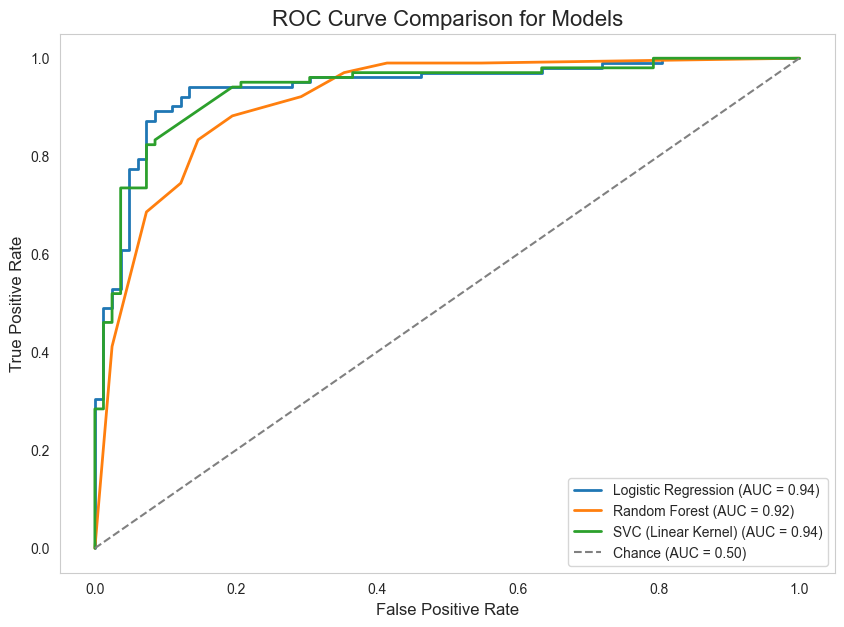

Model  Accuracy  Precision (Binary)  Recall (Binary)  \
0  Logistic Regression  0.896739            0.919192         0.892157   
1        Random Forest  0.842391            0.876289         0.833333   
2  SVC (Linear Kernel)  0.896739            0.910891         0.901961   

   F1-Score (Binary)  Precision (Weighted)  Recall (Weighted)  \
0           0.905473              0.897532           0.896739   
1           0.854271              0.844339           0.842391   
2           0.906404              0.896910           0.896739   

   F1-Score (Weighted)  
0             0.896896  
1             0.842743  
2             0.896798

In [347]:
compare_models(models, X_train_scaled, X_test_scaled, y_train, y_test)


### Comparsion between Models with PCA

Comparison Table:


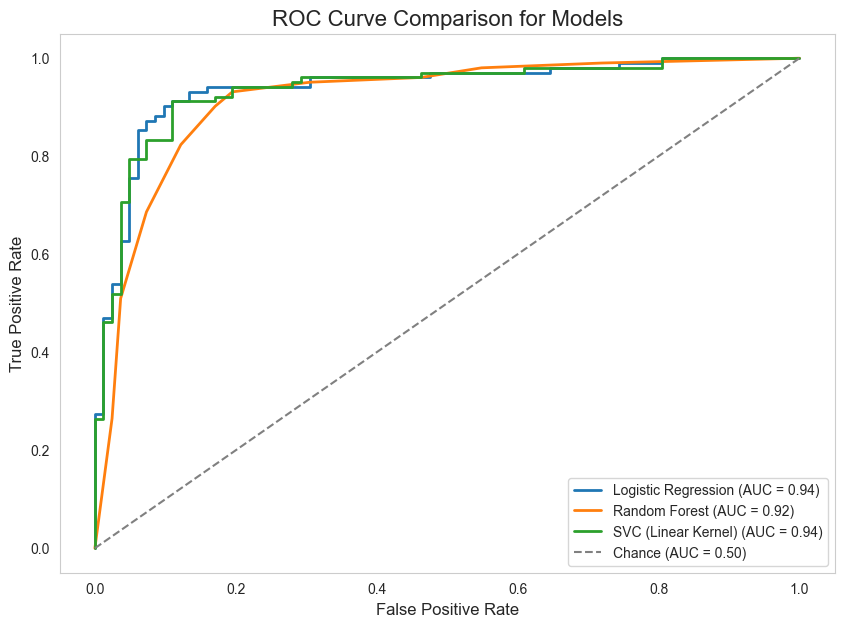

Model  Accuracy  Precision (Binary)  Recall (Binary)  \
0  Logistic Regression  0.896739            0.902913         0.911765   
1        Random Forest  0.869565            0.867925         0.901961   
2  SVC (Linear Kernel)  0.902174            0.911765         0.911765   

   F1-Score (Binary)  Precision (Weighted)  Recall (Weighted)  \
0           0.907317              0.896663           0.896739   
1           0.884615              0.869649           0.869565   
2           0.911765              0.902174           0.902174   

   F1-Score (Weighted)  
0             0.896674  
1             0.869189  
2             0.902174

In [348]:
compare_models(models, X_train_pca_full, X_test_pca_full, y_train, y_test)


In [367]:
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    
    handles, labels = scatter.legend_elements()
    plt.legend(handles, ['No HeartDisease (0)',  'HeartDisease (1)'], title="Class", fontsize=10, loc="upper right")
    
    plt.title(title, fontsize=16)
    plt.xlabel('Principal Component 1', fontsize=12)
    plt.ylabel('Principal Component 2', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


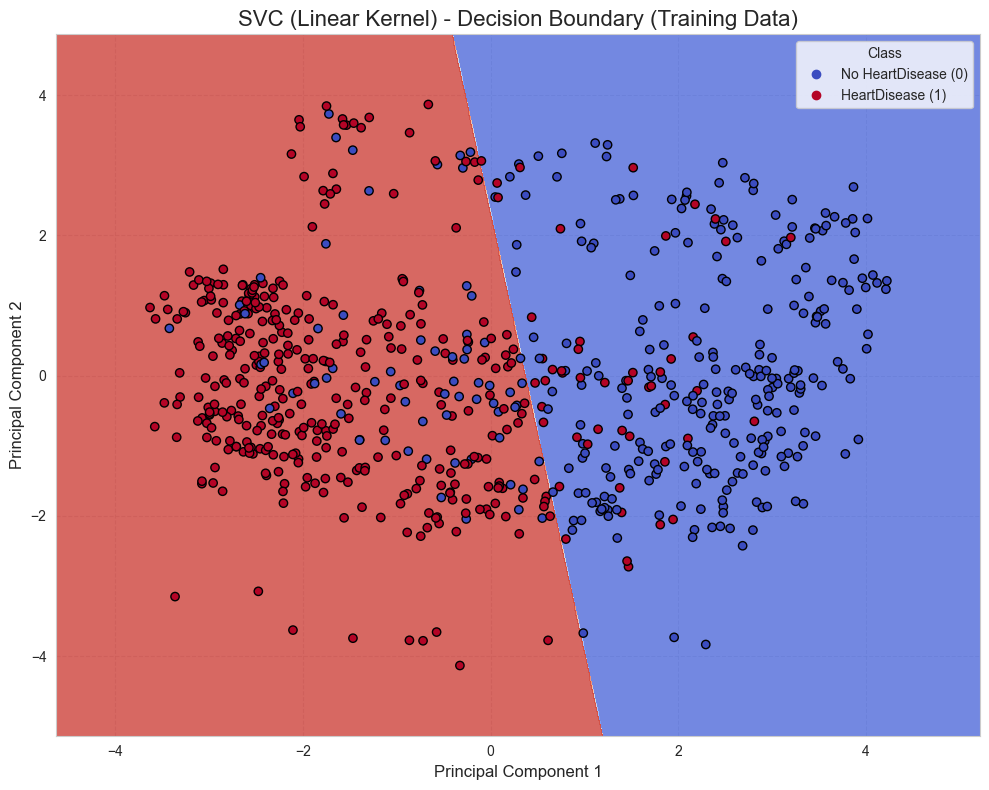

In [370]:
for model_name, model in models.items():
    model.fit(X_train_pca_2d, y_train)
    plot_decision_boundary(model, X_train_pca_2d, y_train, title=f"{model_name} - Decision Boundary (Training Data)")
    plot_decision_boundary(model, X_test_pca_2d, y_test, title=f"{model_name} - Decision Boundary (Test Data)")


